# **Proyecto Equipo 20.**
## **Integrantes del equipo:**
- César García Gutiérrez
- Juan Rosendo González Feria
- Emilio Linarez Meneses
- Set Jafet Renedo Ortega

# **Análisis de series de tiempo para activos financieros: predicciones de volatilidad en sectores de la Bolsa Mexicana de Valores.**
---

Este proyecto busca ser una herramienta de apoyo para aquellas personas interesadas en invertir en acciones locales. Se ha observado que en pocas ocasiones se usan criterios estadísticos en el análisis financiero el cual abre una oportunidad para un análisis de los datos un poco más refinado ya que este se sustenta en la teoría estadística, en particular del análisis de series de tiempo. 

Es así como este proyecto tiene como objetivo hacer predicciones acerca de series de tiempo de valores de las acciones de ciertas empresas que pertenecen a distintos sectores industriales según la Bolsa Mexicana de Valores. Los sectores a considerar fueron:

- Industriales
- Materiales
- Productos de consumo
- Salud
- Telecomunicaciones
- Financieros
- Productos de consumo no basicos

Así fue como de cada sector se seleccionó una empresa y se hicieron predicciones sobre el valor de los retornos de la misma. Dicha utilidad se encuentra relacionada con la volatilidad que presenta cada empresa.

Esto se hizo usando un modelo  que corresponde a una serie de tiempo univariada que se ajusta por medio de un modelo ARCH o GARCH, dado que estos modelos son los más comunes para analizar activos financieros.

Para ajustar un modelo se utilizó como punto de partida la información de los correlogramas (ACF, PACF) de la serie de retornos y de la serie de retornos al cuadrado. Una vez ajustados los modelos se verifica la significancia estadística de los coeficientes, en caso de no ser significativo algún coeficiente del modelo este es cambiado por otro. Posteriormente, para verificar el poder predictivo del modelo se compararon los úúltimos 365 datos reales con los ajustados por el modelo. Finalmente se hace una predicción para los siguientes 7 días.

---
## Modelos ARCH y GARCH.

Comenzamos con las series de tiempo correspondientes a cada empresa.

Empecemos importando las librerias necesarias:

- numpy
- pandas
- matplotlib.pyplot
- yfinance
- statmodels.api
- datetime.timedelta
- arch.arch_model

Las primeras tres librerias son para poder trabajar con los datos y poder visulizarlos. Por otro lado la librería yfinance es para poder acceder al API de Yahoo Finance y hacer solicitudes de las empresas que nos interesan. Adicionalmente la librería statmodels.api nos servirá para hacer los correlogramas de las series, la función datetime.timedelta nos ayudará a manejar mejor las fechas. Finalmente la función arch_model de la libreria arch será la que nos permita ajustar modelos GARCH y ARCH a las series.

In [ ]:
# Colab no tiene por defecto las librerias yfinance y arch, por lo que se tienen que instalar

!pip install yfinance
!pip install arch

     |████████████████████████████████| 5.5MB 11.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=626fa0ec85c622de5b6d52d58c84614a85b9e6929ede1930d49ed1bcf7774a3f
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 808kB 8.7MB/s 


In [ ]:
import yfinance as yf
import statsmodels.api as sm
from datetime import timedelta
from arch import arch_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---
### Grupo Aeroportuario del Pacífico.

Empecemos importando los datos de una empresa, en este caso usaremos los datos de la empresa **Grupo Aeroportuario del Pacífico**. Para importar los datos haremos una solicitud a la API.

In [ ]:
GAP = yf.Ticker("GAPB.MX")

Una vez pedida la información la convertimos en un dataframe:

In [ ]:
df = GAP.history(period = "max")

Veamos lo que contiene el dataframe.

In [ ]:
df

Open        High  ...  Dividends  Stock Splits
Date                                ...                         
2006-02-27   14.581499   15.060471  ...        0.0             0
2006-02-28   14.813574   15.011088  ...        0.0             0
2006-03-01   14.828386   15.653008  ...        0.0             0
2006-03-02   15.544375   15.702386  ...        0.0             0
2006-03-03   15.554250   15.707324  ...        0.0             0
...                ...         ...  ...        ...           ...
2021-03-02  213.169998  220.610001  ...        0.0             0
2021-03-03  220.000000  226.919998  ...        0.0             0
2021-03-04  227.350006  231.169998  ...        0.0             0
2021-03-05  225.649994  229.210007  ...        0.0             0
2021-03-08  229.460007  230.429993  ...        0.0             0

[3772 rows x 7 columns]

In [ ]:
df.describe()

Open         High  ...    Dividends  Stock Splits
count  3771.000000  3771.000000  ...  3772.000000        3772.0
mean     82.417691    83.506630  ...     0.018922           0.0
std      66.019075    66.911085  ...     0.226968           0.0
min      11.552737    11.974730  ...     0.000000           0.0
25%      26.280849    26.631930  ...     0.000000           0.0
50%      48.234708    48.945885  ...     0.000000           0.0
75%     150.635509   152.634734  ...     0.000000           0.0
max     251.889999   254.880005  ...     4.210000           0.0

[8 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3772 entries, 2006-02-27 to 2021-03-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3771 non-null   float64
 1   High          3771 non-null   float64
 2   Low           3771 non-null   float64
 3   Close         3771 non-null   float64
 4   Volume        3771 non-null   float64
 5   Dividends     3772 non-null   float64
 6   Stock Splits  3772 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 235.8 KB


Podemos observar que se tienen un poco más de 3700 observaciones de 7 variables además de que no hay ningún valor nulo y el tipo dato para cada columna es el adecuado.

Nosotros estamos interesados en las primeras cuatro columnas, las cuales hacen referencia al precio de las acciones de la empresa, por lo que es conveniente poder visualizarlas.

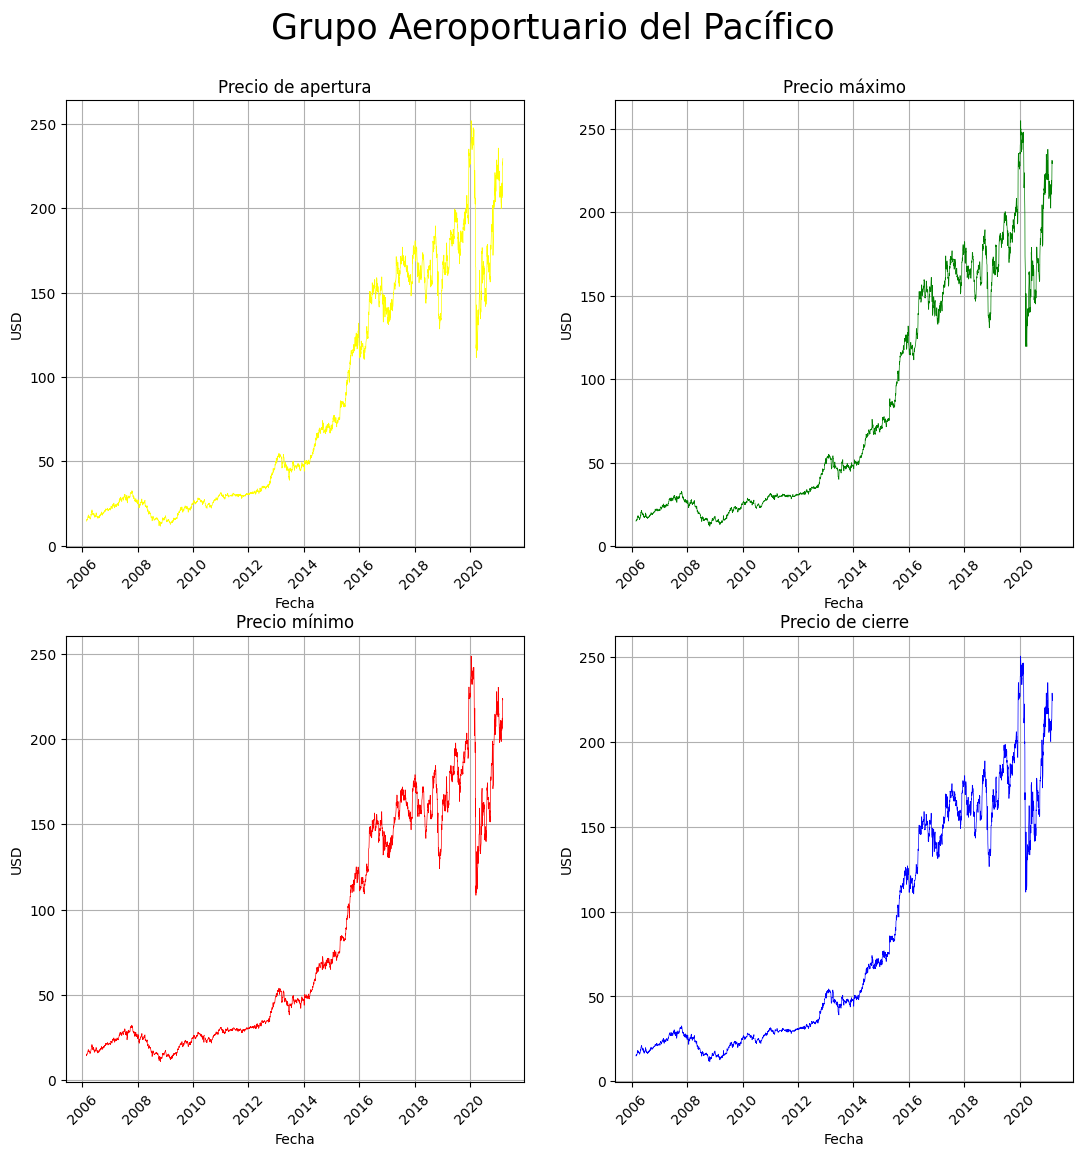

In [ ]:
plt.figure(figsize=(13, 13), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open, label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High, label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low, label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close, label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("Grupo Aeroportuario del Pacífico", fontsize = 25, y = 0.95)
plt.show()

Podemos observar que no hay variación apreciable entre los precios de apertura, máximo, mínimo y el precio de cierre, por lo que de ahora en adelante solamente usaremos los precios de cierre.

In [ ]:
ts = df.Close

Para este tipo de series de tiempo no son los precios directamente lo que se intenta explicar, sino que son los retornos o los log-retornos los que nos interesan. Los primeros se definen como el cambio porcentual de la serie con respecto al dia anterior, mientras que el segundo se define como la diferencia de los logaritmos de los precios. En este caso es indistinto usar uno u otro, sin embargo nosotros nos quedaremos con los retornos.

In [ ]:
pct_ret = ts.pct_change().dropna()
log_ret = np.log(ts).diff().dropna()

Ya con los retornos veamos ahora a nuestra serie y sus respectivos retornos

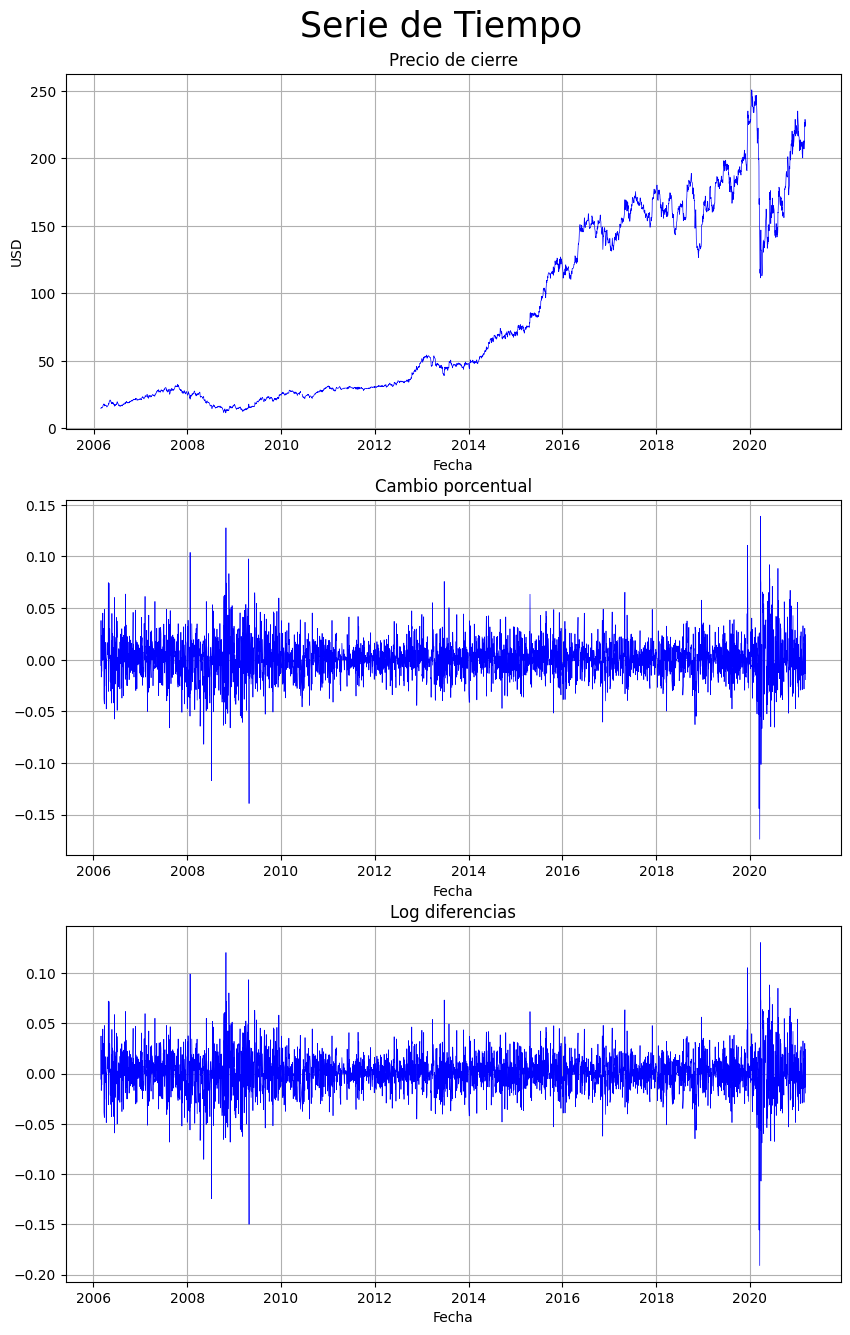

In [ ]:
plt.figure(figsize=(10, 16), dpi = 100)

plt.subplot(3, 1, 1)
plt.plot(ts, lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(pct_ret, lw = 0.5, color = "blue")
plt.title("Cambio porcentual")
plt.xlabel("Fecha")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(log_ret, lw = 0.5, color = "blue")
plt.title("Log diferencias")
plt.xlabel("Fecha")
plt.grid()

plt.suptitle("Serie de Tiempo", fontsize = 25, y = 0.92)
plt.show()

Se pueden observar en las gráficas de los retornos que hay periodos de alta volatilidad, estos se distinguen del resto por presentar valores bastante altos en los retornos. Así se puede apreciar un periodo de alta volatilidad entre 2008 y 2010 y otro a principios del 2020.

Al ver la serie de retornos pareciera que esto corresponde a ruido blanco, por lo que en teoría ya no tendriamos que ajustar ningún modelo. Para verificar esto nos apoyamos de los correlogramas. Primero veamos la autocorrelación de los retornos:

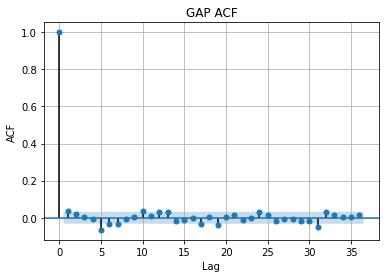

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret)
plt.title("GAP ACF")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

Ahora la autocorrelación parcial:

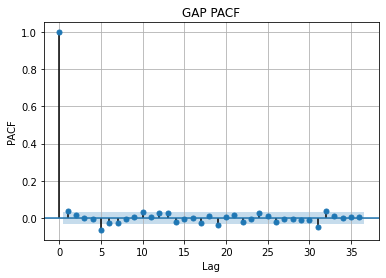

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret)
plt.title("GAP PACF")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

A primera vista pareciera ser que los retornos se tratan de variables aleatorias independientes e identicamente distribuidas, o sea ruido blanco. Este fenómeno es bastante común en estas series de tiempo, por lo que para desvelar las correlaciones existentes se suelen graficar los correlogramas de la serie de retornos elevados al cuadrado. Veamos ahora la autocorrelación:

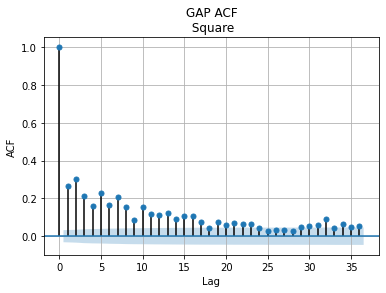

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret**2)
plt.title("GAP ACF\n Square")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

Ahora la autocorrelación parcial:

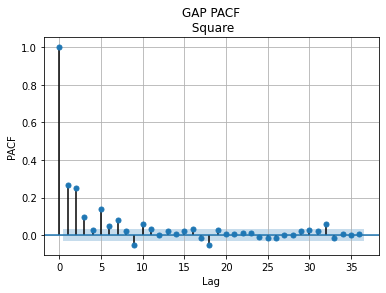

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret**2)
plt.title("GAP PACF\n Square")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

Estos nuevos correlogramas nos permiten darnos cuenta de que los retornos no son ruido blanco. La gráfica de la autocorrelación parcial sirve de punto de partida para ajustar un modelo GARCH. En este caso vemos que los primeros dos lags son los que presentan el valor de PACF más alto, por lo que es razonable ajustar un modelo GARCH(2,2). Lo que se hace primero es reescalar los retornos, esto para evitar problemas de convergencia de los métodos.

In [ ]:
log_ret = 100 * log_ret
pct_ret = 100 * pct_ret

Luego declaramos las características del modelo que se quiere ajustar, en este caso usaremos un modelo GARCH(2,2).

In [ ]:
mod_1 = arch_model(pct_ret, mean = "constant", vol = "GARCH", p = 2, q = 2, dist = "t")

Ya declaradas las características del modelo estamos listos para ajustarlo a nuestra serie de tiempo

In [ ]:
fit_1 = mod_1.fit(disp= "off")

Veamos los resultados

In [ ]:
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7377.84
Distribution:      Standardized Student's t   AIC:                           14769.7
Method:                  Maximum Likelihood   BIC:                           14813.3
                                              No. Observations:                 3771
Date:                      Tue, Mar 09 2021   Df Residuals:                     3770
Time:                              02:37:15   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0918  2.331e-02      3.940  8.135e-05 [4.616e-02,  0.138]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1033  4.102e-02      2.518  1.179e-02    [2.291e-02,  0.184]
alpha[1]       0.1312  3.812e-02      3.440  5.811e-04    [5.644e-02,  0.206]
alpha[2]   4.8512e-12  2.997e-02  1.619e-10      1.000 [-5.874e-02,5.874e-02]
beta[1]        0.4764      0.257      1.851  6.418e-02   [-2.807e-02,  0.981]
beta[2]        0.3726      0.258      1.446      0.148      [ -0.133,  0.878]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.3263      0.468     11.380  5.235e-30 [  4.409,  6.244]
========================================================================

Covariance estimator: robust
"""

Veamos los p-values.

In [ ]:
fit_1.pvalues < 0.05

mu           True
omega        True
alpha[1]     True
alpha[2]    False
beta[1]     False
beta[2]     False
nu           True
Name: pvalues, dtype: bool

Se puede observar que los coeficientes asociados a los betas y a alpha_2 NO son estadísticamente significativos lo cual nos sugiere probar con un modelo más sencillo, en este caso un modelo ARCH(1).

In [ ]:
mod_2 = arch_model(pct_ret, mean = "constant", vol = "GARCH", p = 1, q = 0, dist = "t")
fit_2 = mod_2.fit(disp= "off")
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - ARCH Model Results                         
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -7505.16
Distribution:      Standardized Student's t   AIC:                           15018.3
Method:                  Maximum Likelihood   BIC:                           15043.3
                                              No. Observations:                 3771
Date:                      Tue, Mar 09 2021   Df Residuals:                     3770
Time:                              02:37:15   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0890  2.435e-02      3.655  2.574e-04 [4.127e-02,  0.137]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.6385      0.142     18.610  2.689e-77 [  2.361,  2.916]
alpha[1]       0.4009  4.833e-02      8.296  1.074e-16 [  0.306,  0.496]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.2273      0.310     13.646  2.127e-42 [  3.620,  4.834]
========================================================================

Covariance estimator: robust
"""

Revisemos nuevamente los p-values.

In [ ]:
fit_2.pvalues < 0.05

mu          True
omega       True
alpha[1]    True
nu          True
Name: pvalues, dtype: bool

En este caso todos son menores a 0.05 por lo que podemos rechazar $H_0$ en todos los casos. En este modelo, al igual que los modelos de regresión, la hipótesis nula es que el coeficiente de interes es igual a 0 mientras que la hipótesis auxiliar es que los coeficientes no son nulos. Por lo tanto, podemos afirmar con un nivel de confianza del 95% que los coeficientes del modelo ARCH(1) son significativos.

Una vez escogido el modelo vale la pena ver que tan bueno es prediciendo. Para ello vamos a usar el método de *rolling window* el cual consiste en dar un tamaño de "ventana" el cual se mantendrá fijo y ajustar el modelo para ese subconjunto de los datos, luego a partir de ahí hacer la predicción al valor siguiente. Finalmente se toma un nuevo subconjunto que contenga el valor real que se intentó predecir y se repite todo nuevamente.

En este caso usaremos como tamaño de ventana 365 días.

In [ ]:
roll_preds = []
test_size = 365

for i in range(test_size):
    train = pct_ret[:-(test_size - i)]
    mod = arch_model(train, mean = "constant", p = 1, q = 0, dist = "t")
    fit = mod.fit(disp = "off")
    pred = fit.forecast(horizon = 1)
    roll_preds.append(np.sqrt(pred.variance.values[-1:][0]))

A partir de los datos obtenidos de la predicción podemos hacer una serie de tiempo con los valores predichos.

In [ ]:
roll_preds = pd.Series(roll_preds, index = pct_ret.index[-365:])

Con esto ya estamos listos para comparar los datos estimados con los reales.

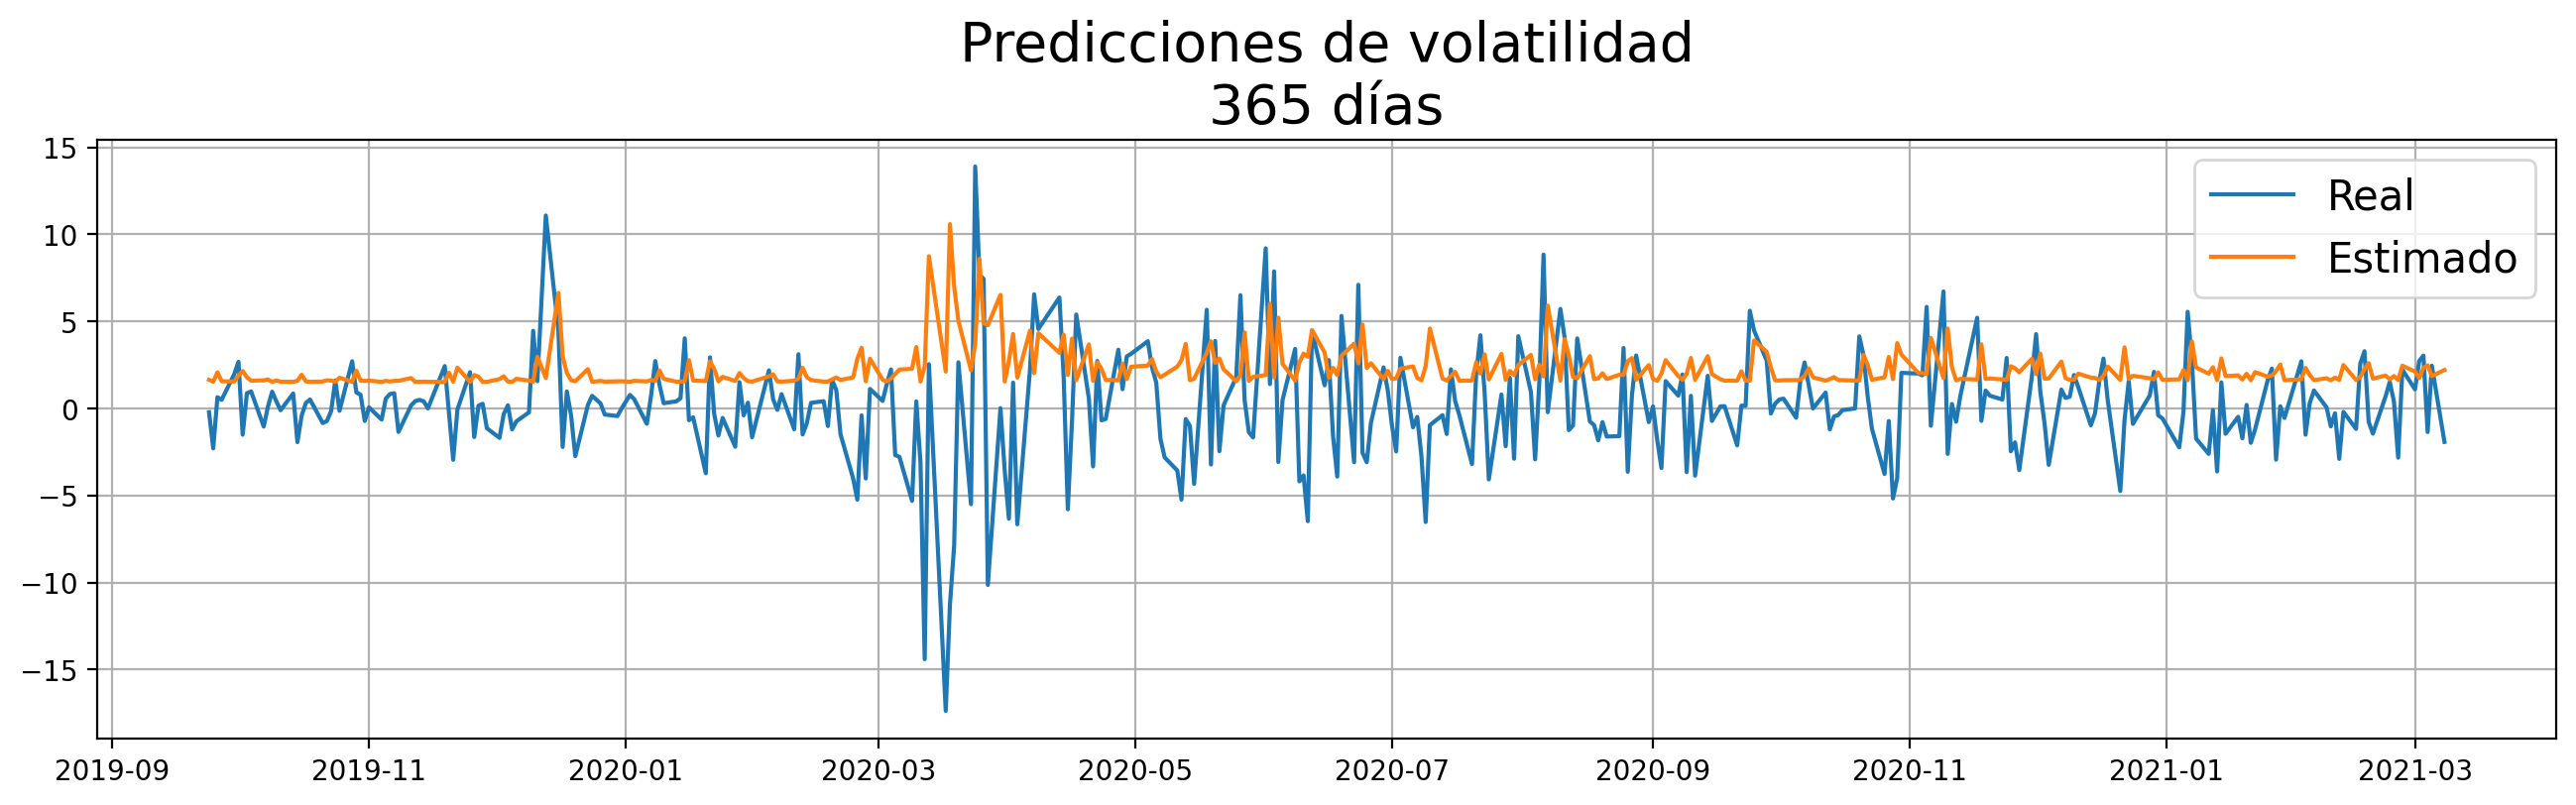

In [ ]:
plt.figure(figsize = (16, 4), dpi = 200)
real, = plt.plot(pct_ret[-365:])
preds, = plt.plot(roll_preds)
plt.title("Predicciones de volatilidad\n365 días", fontsize = 20)
plt.legend(["Real", "Estimado"], fontsize = 15)
plt.grid()

Podemos observar que el modelo logra capturar bien los momentos de alta volatilidad, mientras que los de baja volatilidad pareciera que son constantes. En este tipo de modelos se está interesado en capturar los momentos de alta volatilidad, por lo que este modelo lo hace muy bien.

Ya que hemos observado que el modelo es bueno al contrastarlo con los datos hagamos una predicción a futuro. Vale la pena mencionar que, dada la naturaleza de estas series de tiempo, no es conveniente hacer predicciones muy largas por lo que nos conformaremos solamente con 7 valores a futuro.

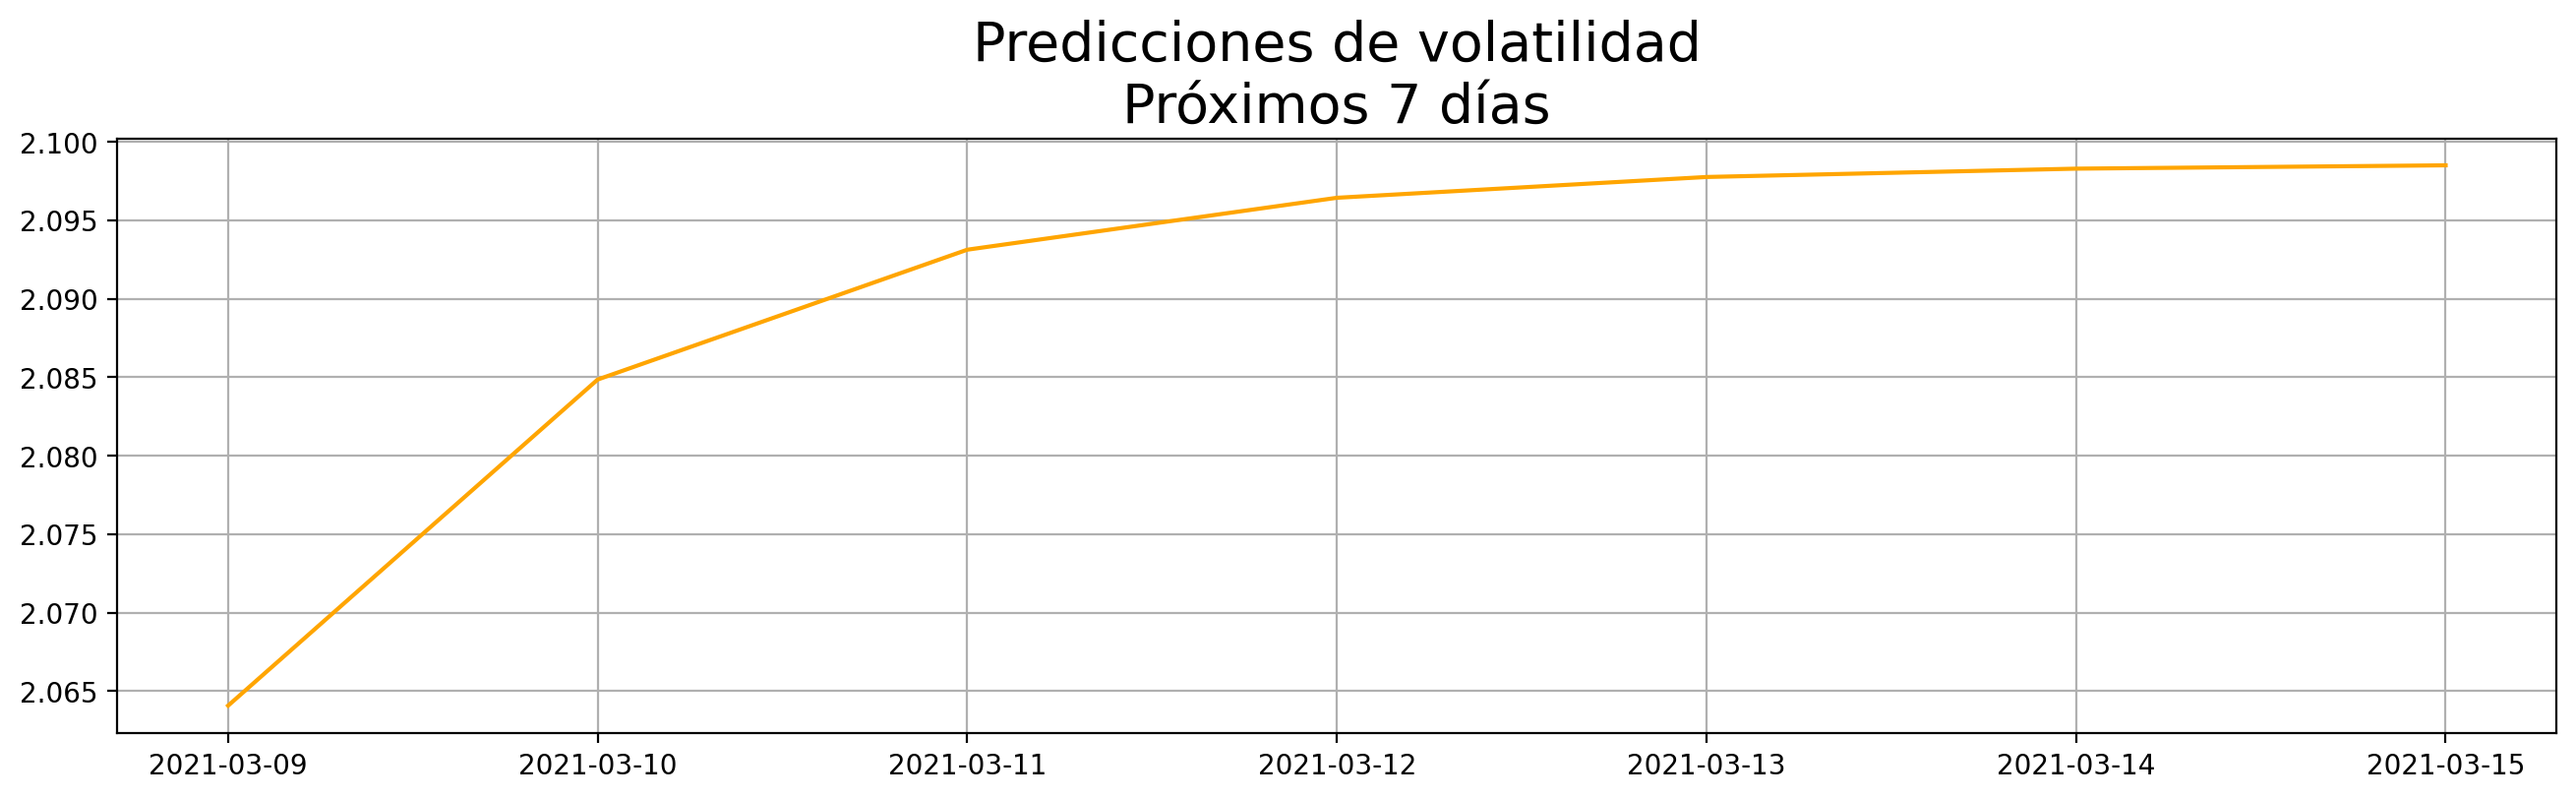

In [ ]:
train = pct_ret
model = arch_model(train, mean = "constant", p = 1, q = 0, dist = "t")
fit = model.fit(disp = "off")

pred = fit.forecast(horizon = 7)
futuro = [pct_ret.index[-1] + timedelta(days = i) for i in range(1,8)]
pred1 = pd.Series(np.sqrt(pred.variance.values[-1,:]), index = futuro)

plt.figure(figsize = (16, 4), dpi = 200)
plt.plot(pred1, color = "orange")
plt.title("Predicciones de volatilidad\nPróximos 7 días", fontsize = 20)
plt.grid()

El modelo predice una baja volatilidad para los siguiente 7 días, lo cual se traduce en que los valores de esta empresa sufrirán poca fluctuación.

Este procedimiento es similar para el resto de empresas que vamos a estudiar.

---
### Cemex

La siguiente empresa seleccionada fue **Cemex**. Empecemos obteniendo los datos de esta empresa, nuevamente hacemos la petición a la API.

In [ ]:
cemex = yf.Ticker("CEMEXCPO.MX")

A partir de aquí obtenemos el histórico de precios.

In [ ]:
df = cemex.history(period = "max")

Veamos parte del dataframe e información sobre este

In [ ]:
df

Open       High        Low  ...    Volume  Dividends  Stock Splits
Date                                         ...                                   
2000-01-03   6.600320   6.687330   6.401440  ...   8140433        0.0           0.0
2000-01-04   6.214989   6.239849   6.016109  ...  24190575        0.0           0.0
2000-01-05   6.022324   6.090689   5.891809  ...  36945498        0.0           0.0
2000-01-06   6.053399   6.096904   5.879380  ...  13890797        0.0           0.0
2000-01-07   5.966389   6.003679   5.916670  ...  43027159        0.0           0.0
...               ...        ...        ...  ...       ...        ...           ...
2021-03-02  14.090000  14.550000  14.090000  ...  37887827        0.0           0.0
2021-03-03  14.530000  15.390000  14.480000  ...  62519631        0.0           0.0
2021-03-04  15.160000  15.380000  14.060000  ...  41749665        0.0           0.0
2021-03-05  14.460000  14.660000  13.680000  ...  43809921        0.0           0.0
2021-03-08  14.690000  15.100000  14.540000  ...  36908909        0.0           0.0

[5342 rows x 7 columns]

In [ ]:
df.describe()

Open         High  ...    Dividends  Stock Splits
count  5342.000000  5342.000000  ...  5342.000000   5342.000000
mean     11.346988    11.501362  ...     0.000658      0.002696
std       5.313101     5.362773  ...     0.016584      0.059293
min       2.865740     3.066033  ...     0.000000      0.000000
25%       7.218582     7.331370  ...     0.000000      0.000000
50%       9.989107    10.144376  ...     0.000000      0.000000
75%      14.248088    14.423333  ...     0.000000      0.000000
max      71.543291    71.543291  ...     0.609687      2.000000

[8 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5342 entries, 2000-01-03 to 2021-03-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5342 non-null   float64
 1   High          5342 non-null   float64
 2   Low           5342 non-null   float64
 3   Close         5342 non-null   float64
 4   Volume        5342 non-null   int64  
 5   Dividends     5342 non-null   float64
 6   Stock Splits  5342 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 333.9 KB


En este caso contamos con un poco más de 5300 observaciones y con 7 columnas, nuevamente no hay datos nulos y los tipos de datos son los adecuados para nuestros propósitos.

Veamos los precios de la empresa: 

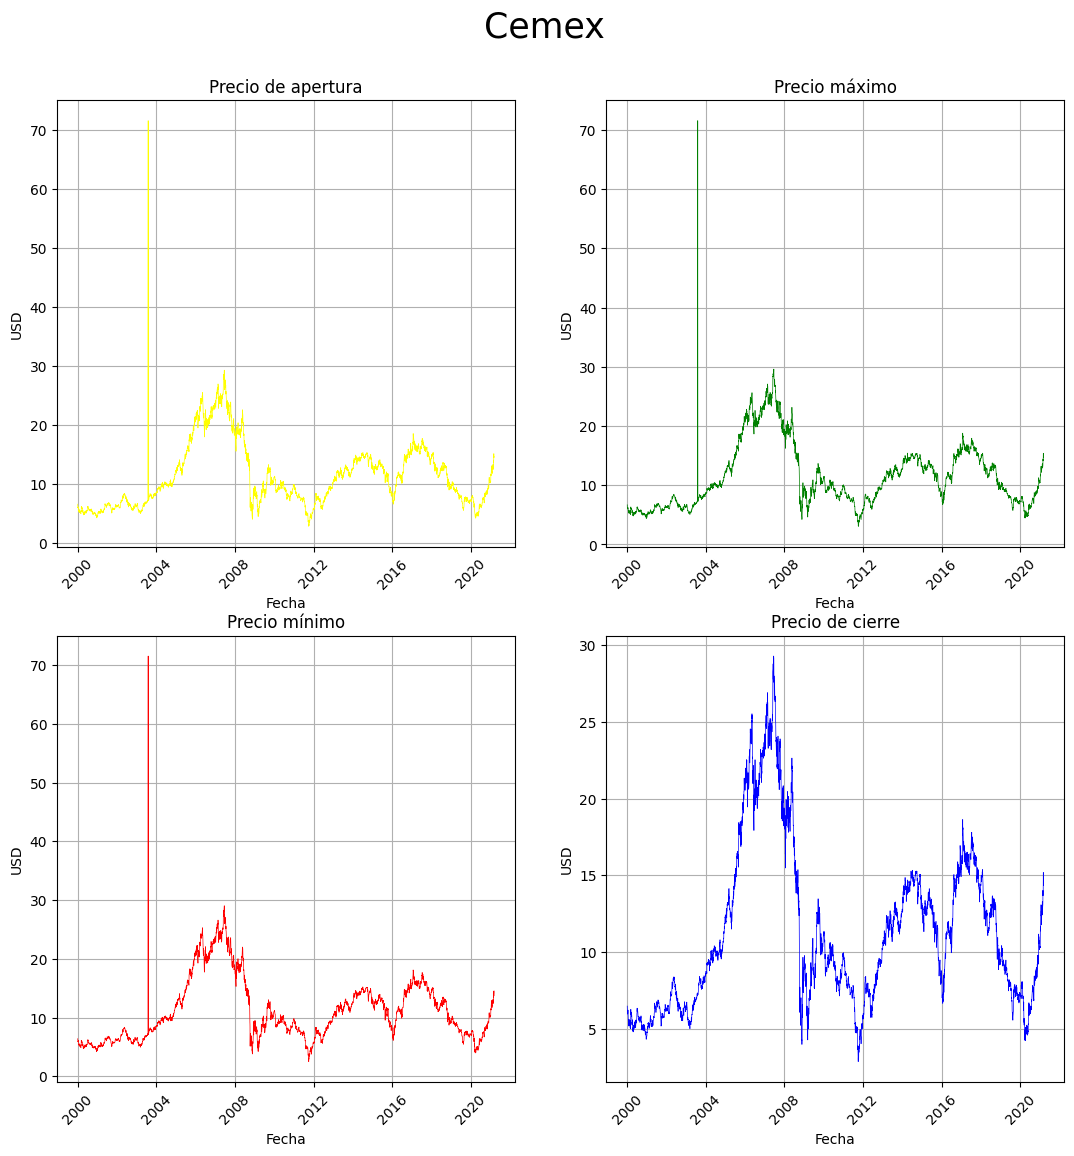

In [ ]:
plt.figure(figsize=(13, 13), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open, label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High, label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low, label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close, label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("Cemex", fontsize = 25, y = 0.95)
plt.show()

En este caso se puede observar que hay un punto en los precios de mínimo, máximo y de apertura que no aparece en el precio de cierre y que excede el valor de los 70 dolares. Investiguemos un poco más.

In [ ]:
df[df.Open == df.Open.max()]

Open       High        Low  ...   Volume  Dividends  Stock Splits
Date                                         ...                                  
2003-08-04  71.543291  71.543291  71.543291  ...  1760605        0.0           0.0

[1 rows x 7 columns]

Se puede ver que este dato anómalo se presenta en el mismo dia: el 4 de agosto del 2003 y es el mismo valor, lo cual nos hace pensar que se trata de un error al subir la información a la API, pues se puede observar que si dividimos dichos precios por 10 se obtiene un valor cercano al reportado en el precio de cierre. Supondremos que ese es el caso, sin embargo vale la pena mencionar que ese mismo día tuvo lugar un evento curioso en esa empresa, el cual se recabó en la siguiente nota periodística:

<http://www.cronica.com.mx/notas/2004/110116.html>

Con esta anomalía aclarada podemos continuar con el análisis de la serie de tiempo. Nuevamente solo nos fijaremos en los precios de cierre.

In [ ]:
ts = df.Close

Calculamos los retornos

In [ ]:
pct_ret = ts.pct_change().dropna()
log_ret = np.log(ts).diff().dropna()

Veamos los gráficos de los retornos

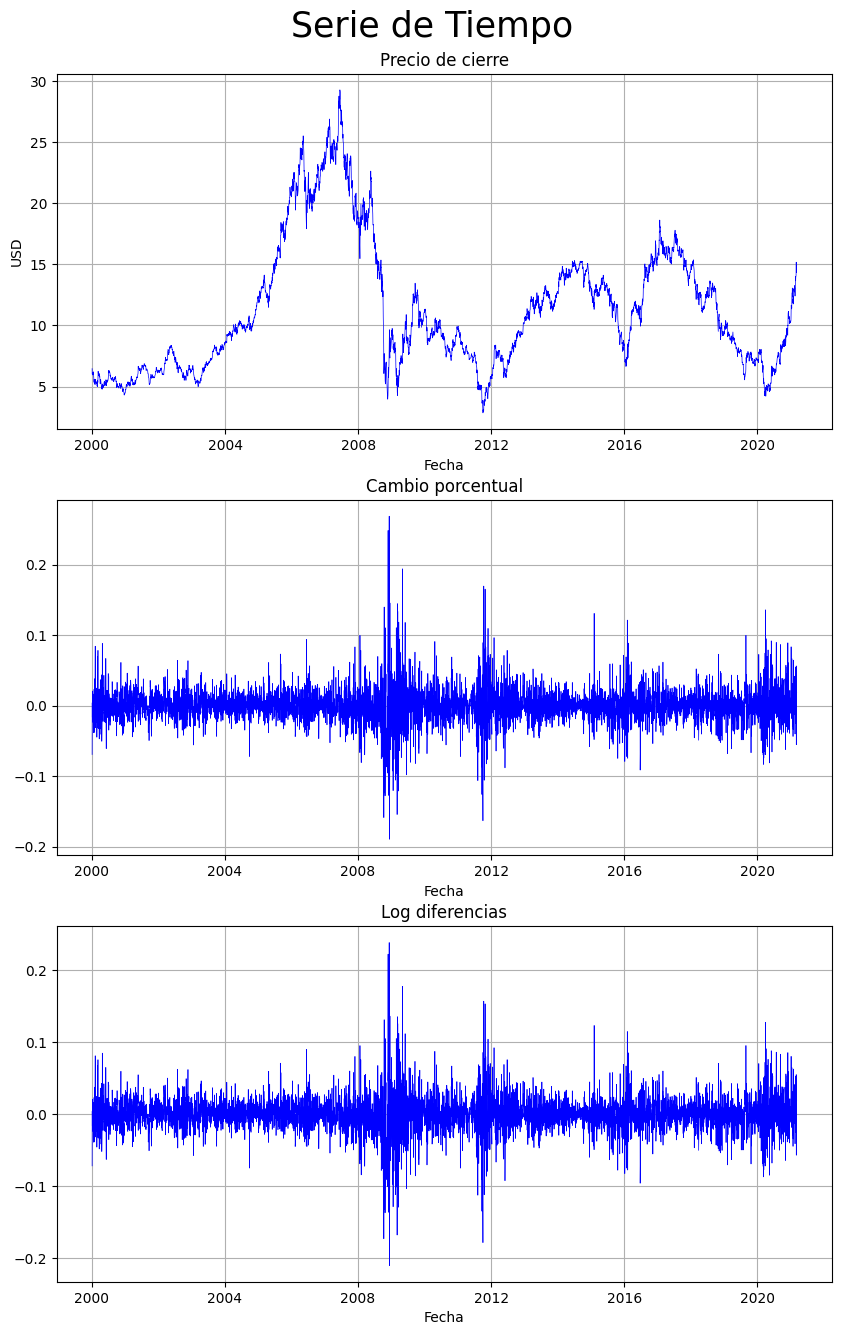

In [ ]:
plt.figure(figsize=(10, 16), dpi = 100)

plt.subplot(3, 1, 1)
plt.plot(ts, lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(pct_ret, lw = 0.5, color = "blue")
plt.title("Cambio porcentual")
plt.xlabel("Fecha")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(log_ret, lw = 0.5, color = "blue")
plt.title("Log diferencias")
plt.xlabel("Fecha")
plt.grid()

plt.suptitle("Serie de Tiempo", fontsize = 25, y = 0.92)
plt.show()

Para esta empresa se puede observar un periodo de alta volatilidad en el año 2008, otro a finales del 2011, otro a principios del 2016 y uno a principios del 2020. En este punto vale la pena aclarar algunas de las razones por las cuales aparecen estos periodos de volatilidad alta: en el 2008 se vivió una crisis económica que afectó a todo el mundo (esto explica la alta volatilidad cercana al año 2008). Por otro lado, en el 2020 se desató la pandemia por COVID-19 la cual afectó (y sigue afectando) la economia nacional.

A partir de los valores de los retornos se pueden obtener los correlogramas de estos. Empecemos viendo los valores de ACF:

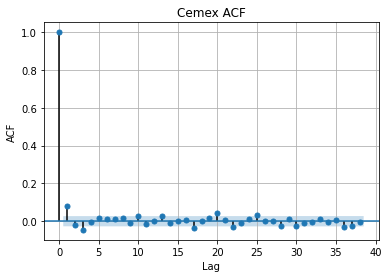

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret)
plt.title("Cemex ACF")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

Y ahora los valores de PACF:

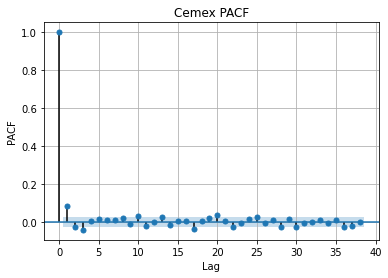

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret)
plt.title("Cemex PACF")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

Se puede obsevar que los correlogramas sugieren que la serie es ruido blanco, sin embargo este comportamiento es común en estas serie, por lo que necesitamos hacer los correlogramas de los retornos elevados al cuadrado. 

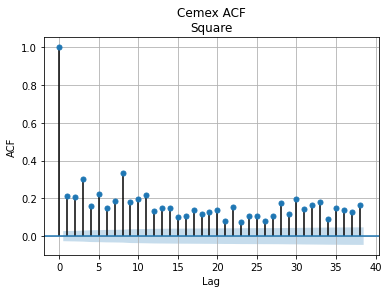

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret**2)
plt.title("Cemex ACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

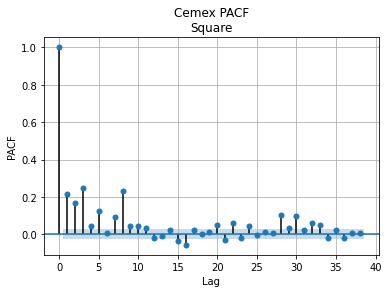

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret**2)
plt.title("Cemex PACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

Es el lag más significativo en el PACF el que nos da una idea de cómo empezar a ajustar un modelo GARCH, en este caso el lag 8 es el más significativo por lo que empezaremos ajustando un modelo GARCH(8,8). Nuevamente se tienen que reescalar los retornos

In [ ]:
log_ret = 100 * log_ret
pct_ret = 100 * pct_ret

Definimos los parámetros del modelo y ajustamos la serie:

In [ ]:
mod_1 = arch_model(pct_ret, mean = "constant", vol = "GARCH", p = 8, q = 8, dist = "skewt")
fit_1 = mod_1.fit(disp= "off")
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -11352.6
Distribution:      Standardized Skew Student's t   AIC:                           22745.2
Method:                       Maximum Likelihood   BIC:                           22876.9
                                                   No. Observations:                 5341
Date:                           Tue, Mar 09 2021   Df Residuals:                     5340
Time:                                   02:37:40   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0608  2.540e-02      2.393  1.670e-02 [1.101e-02,  0.111]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1540  8.509e-02      1.810  7.026e-02   [-1.274e-02,  0.321]
alpha[1]       0.1418  2.923e-02      4.852  1.223e-06    [8.452e-02,  0.199]
alpha[2]   6.7597e-03  8.321e-02  8.124e-02      0.935      [ -0.156,  0.170]
alpha[3]       0.0110      0.161  6.836e-02      0.946      [ -0.305,  0.327]
alpha[4]       0.0156      0.119      0.130      0.896      [ -0.219,  0.250]
alpha[5]       0.0000      0.104      0.000      1.000      [ -0.205,  0.205]
alpha[6]       0.0194      0.137      0.142      0.887      [ -0.249,  0.288]
alpha[7]       0.0154  3.420e-02      0.451      0.652 [-5.162e-02,8.243e-02]
alpha[8]   6.6128e-03      0.115  5.738e-02      0.954      [ -0.219,  0.232]
beta[1]        0.5176      0.357      1.448      0.148      [ -0.183,  1.218]
beta[2]    1.2591e-09      0.985  1.278e-09      1.000      [ -1.931,  1.931]
beta[3]    1.2319e-09      1.219  1.011e-09      1.000      [ -2.389,  2.389]
beta[4]    1.3158e-09      0.414  3.179e-09      1.000      [ -0.811,  0.811]
beta[5]        0.0000      1.227      0.000      1.000      [ -2.404,  2.404]
beta[6]    1.2482e-09      0.585  2.134e-09      1.000      [ -1.146,  1.146]
beta[7]        0.0000      0.748      0.000      1.000      [ -1.466,  1.466]
beta[8]        0.2459      0.583      0.422      0.673      [ -0.897,  1.389]
                                Distribution                                
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
nu             5.9634      0.448     13.310  2.024e-40     [  5.085,  6.842]
lambda         0.0483  1.806e-02      2.673  7.524e-03 [1.287e-02,8.365e-02]
============================================================================

Covariance estimator: robust
"""

Veamos los p-values:

In [ ]:
fit_1.pvalues < 0.05

mu           True
omega       False
alpha[1]     True
alpha[2]    False
alpha[3]    False
alpha[4]    False
alpha[5]    False
alpha[6]    False
alpha[7]    False
alpha[8]    False
beta[1]     False
beta[2]     False
beta[3]     False
beta[4]     False
beta[5]     False
beta[6]     False
beta[7]     False
beta[8]     False
nu           True
lambda       True
Name: pvalues, dtype: bool

En este caso vemos que ninguna de las betas es estadísticamente significativa, mientras que alpha_1 es la única significativa, por lo que esto nos sugiere ajustar un modelo ARCH. Probemos con un ARCH(2)

In [ ]:
mod_2 = arch_model(pct_ret, mean = "constant", vol = "GARCH", p = 2, q = 0, dist = "skewt")
fit_2 = mod_2.fit(disp= "off")
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Constant Mean - ARCH Model Results                           
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                  ARCH   Log-Likelihood:               -11566.6
Distribution:      Standardized Skew Student's t   AIC:                           23145.3
Method:                       Maximum Likelihood   BIC:                           23184.8
                                                   No. Observations:                 5341
Date:                           Tue, Mar 09 2021   Df Residuals:                     5340
Time:                                   02:37:41   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0583  2.782e-02      2.096  3.607e-02 [3.788e-03,  0.113]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.0720      0.162     19.001  1.686e-80 [  2.755,  3.389]
alpha[1]       0.3093  3.539e-02      8.740  2.329e-18 [  0.240,  0.379]
alpha[2]       0.2647  3.210e-02      8.246  1.644e-16 [  0.202,  0.328]
                                Distribution                                
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
nu             4.1451      0.241     17.235  1.460e-66     [  3.674,  4.616]
lambda         0.0436  1.723e-02      2.529  1.143e-02 [9.808e-03,7.735e-02]
============================================================================

Covariance estimator: robust
"""

Veamos los p-values:

In [ ]:
fit_2.pvalues < 0.05

mu          True
omega       True
alpha[1]    True
alpha[2]    True
nu          True
lambda      True
Name: pvalues, dtype: bool

En este caso todos los parámetros son estadísticamente significativos.

Ahora veamos como predice el modelo la volatilidad de los últimos 365 días:

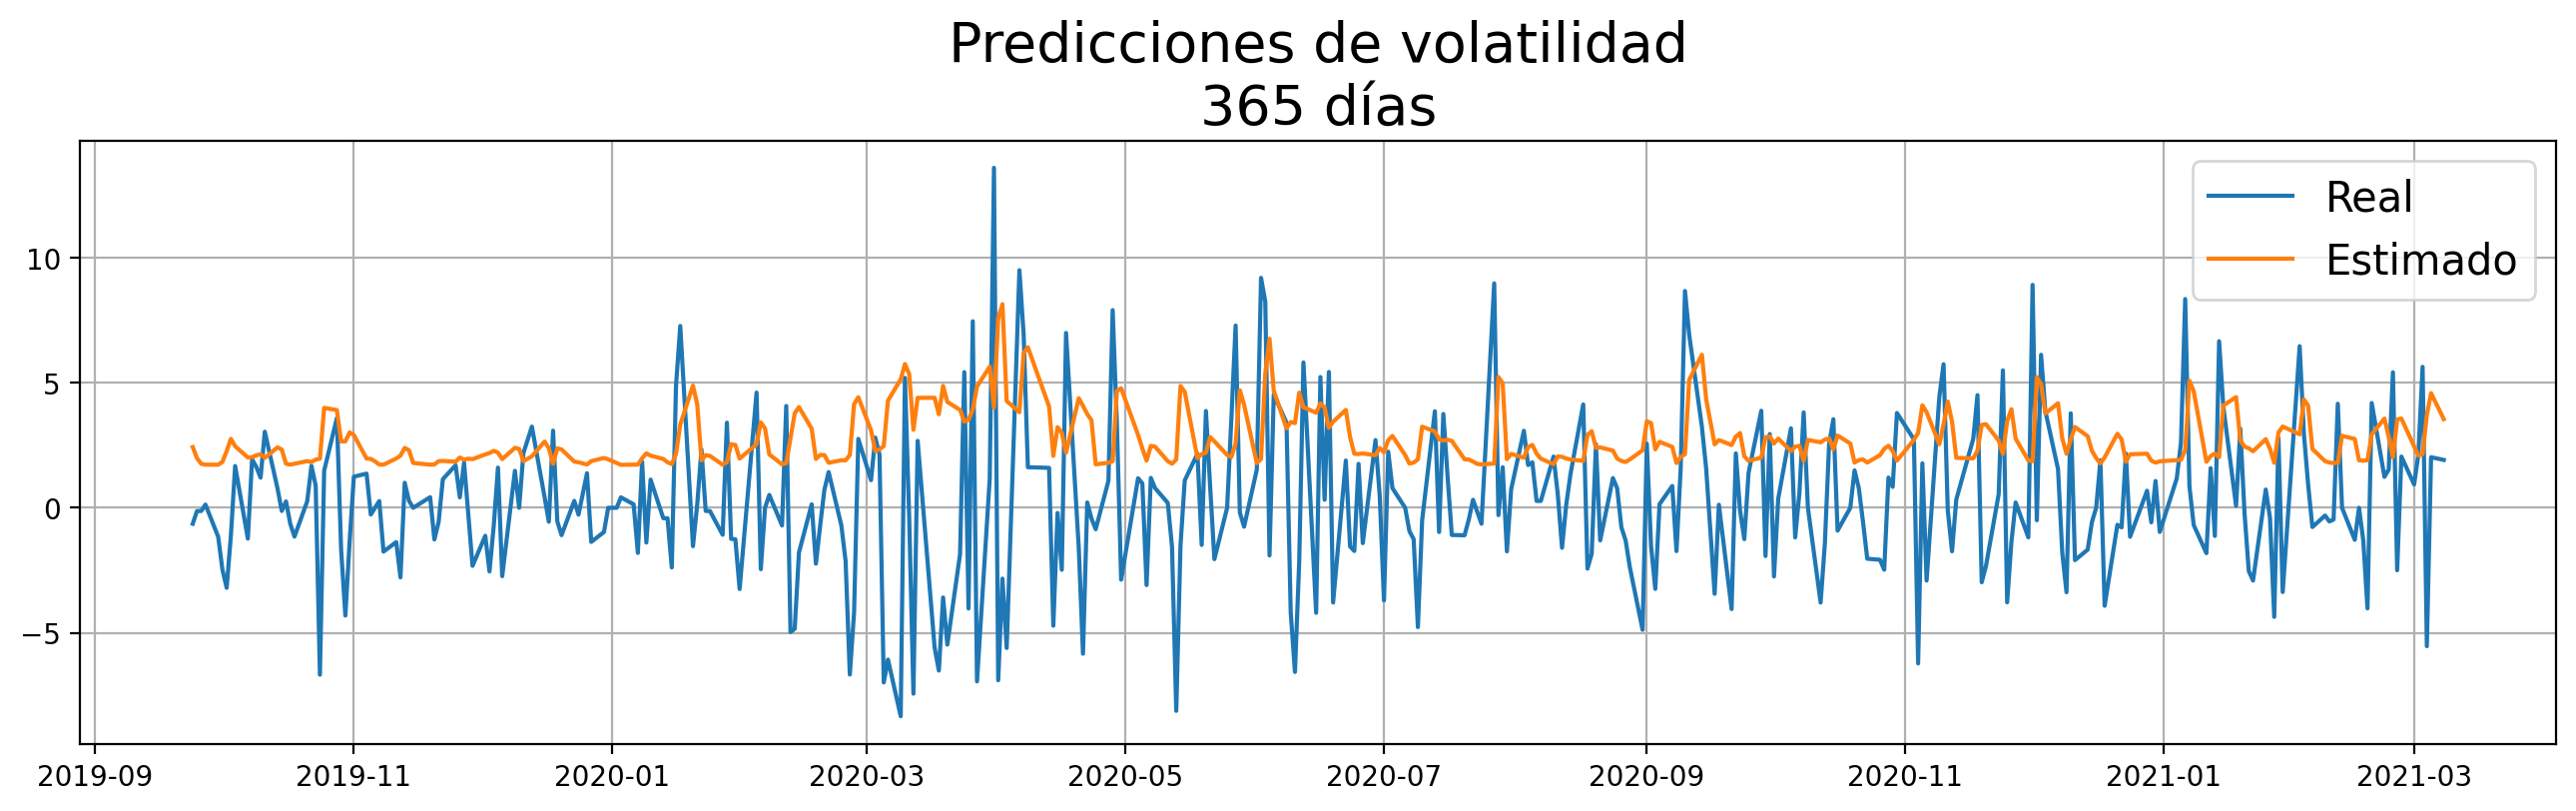

In [ ]:
roll_preds = []
test_size = 365

for i in range(test_size):
    train = pct_ret[:-(test_size - i)]
    mod = arch_model(train, mean = "constant", p = 2, q = 0, dist = "skewt")
    fit = mod.fit(disp = "off")
    pred = fit.forecast(horizon = 1)
    roll_preds.append(np.sqrt(pred.variance.values[-1:][0]))
    
roll_preds = pd.Series(roll_preds, index = pct_ret.index[-365:])

plt.figure(figsize = (16, 4), dpi = 200)
real, = plt.plot(pct_ret[-365:])
preds, = plt.plot(roll_preds)
plt.title("Predicciones de volatilidad\n365 días", fontsize = 20)
plt.legend(["Real", "Estimado"], fontsize = 15)
plt.grid()

En este caso podemos ver que las predicciones de volatilidad capturan muy bien los periodos de alta volatilidad.

Finalmente hagamos una predicción de los siguientes 7 días:

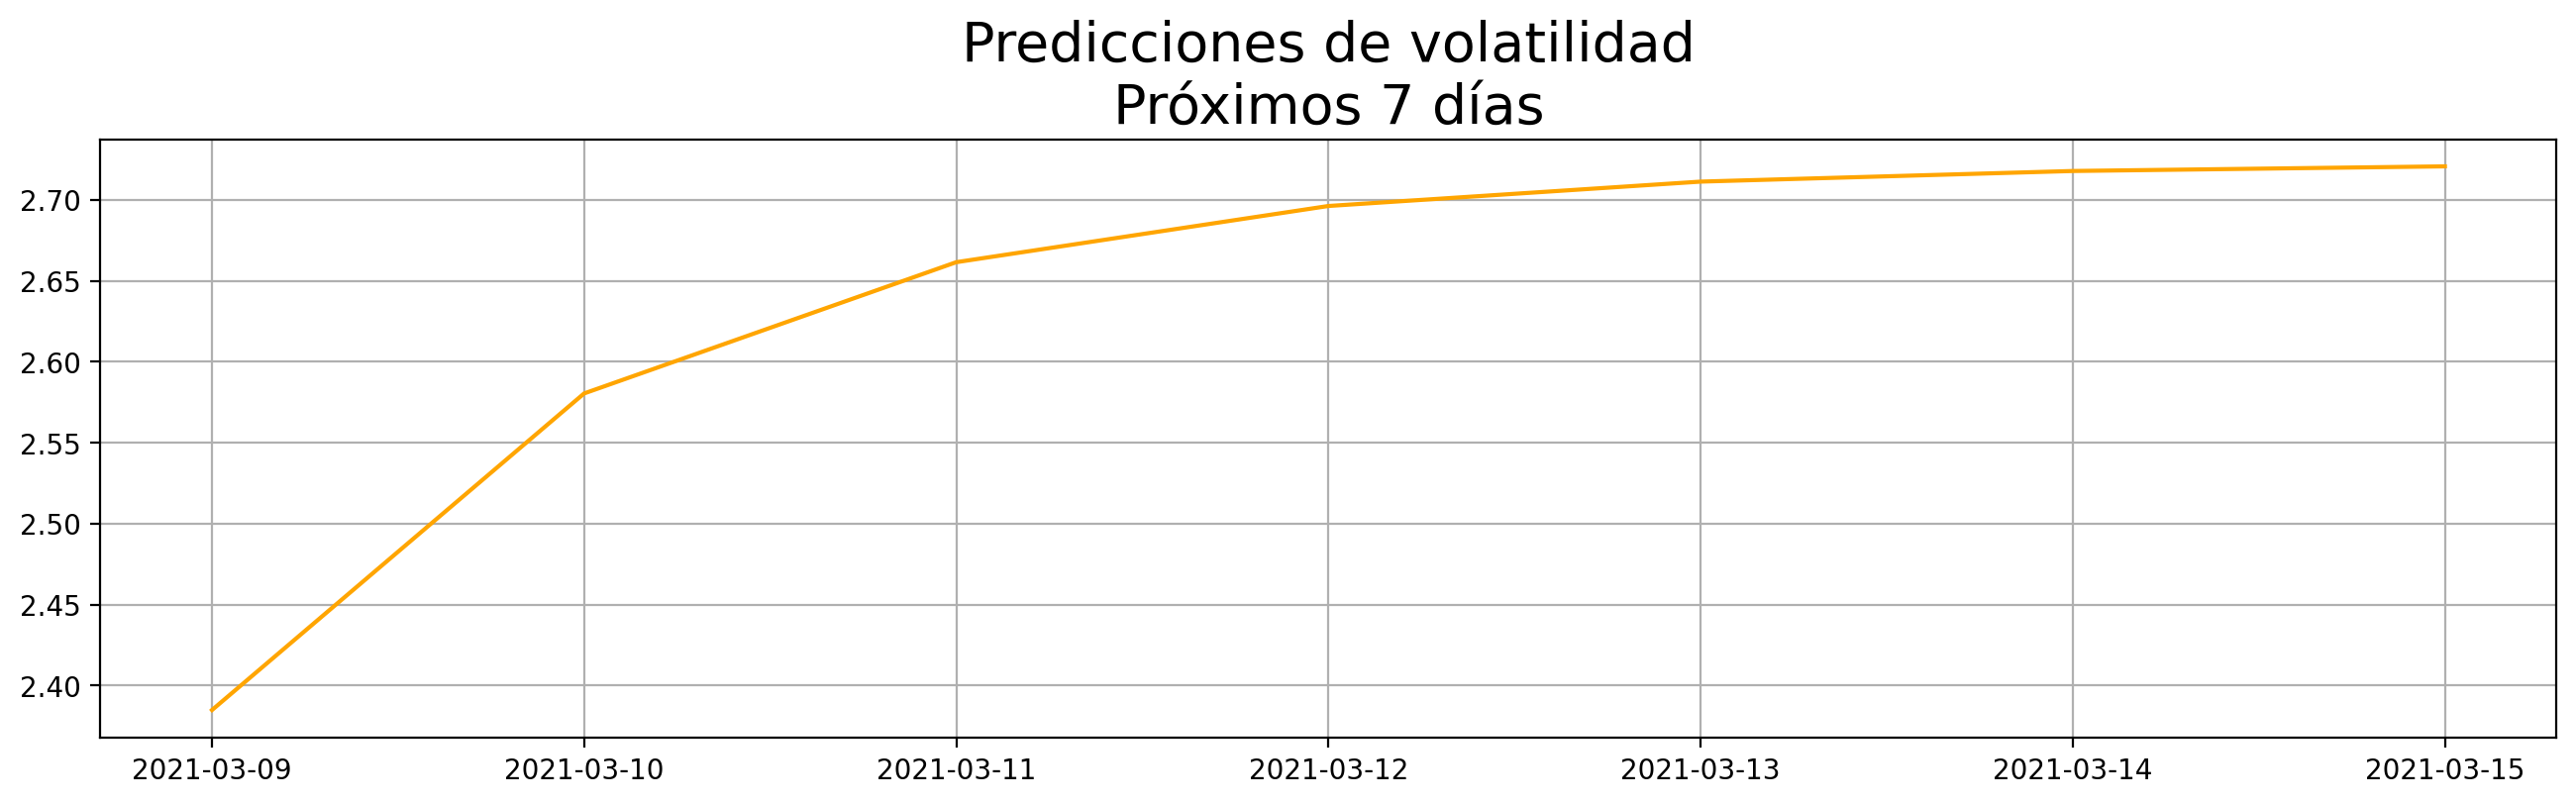

In [ ]:
train = pct_ret
model = arch_model(train, p = 1, q = 0, dist = "skewt")
fit = model.fit(disp = "off")

pred = fit.forecast(horizon = 7)
futuro = [pct_ret.index[-1] + timedelta(days = i) for i in range(1,8)]
pred2 = pd.Series(np.sqrt(pred.variance.values[-1,:]), index = futuro)

plt.figure(figsize = (16, 4), dpi = 200)
plt.plot(pred2, color = "orange")
plt.title("Predicciones de volatilidad\nPróximos 7 días", fontsize = 20)
plt.grid()

---
### Walmart.

La siguiente empresa a analizar es **Walmart**. Empecemos obteniendo los datos y el dataframe de los precios:

In [ ]:
walmart = yf.Ticker("WMT.MX")
df = walmart.history(period = "max")
df

Open         High  ...  Dividends  Stock Splits
Date                                  ...                         
2003-05-29   528.245432   529.604911  ...        0.0             0
2003-05-30   526.303040   526.303040  ...        0.0             0
2003-06-02   527.186707   527.186707  ...        0.0             0
2003-06-03   522.807495   522.807495  ...        0.0             0
2003-06-04   542.519536   546.665833  ...        0.0             0
...                 ...          ...  ...        ...           ...
2021-03-02  2734.959961  2744.989990  ...        0.0             0
2021-03-03  2699.429932  2699.989990  ...        0.0             0
2021-03-04  2679.989990  2700.000000  ...        0.0             0
2021-03-05  2700.000000  2777.500000  ...        0.0             0
2021-03-08  2766.020020  2797.080078  ...        0.0             0

[4447 rows x 7 columns]

In [ ]:
df.describe()

Open         High  ...    Dividends  Stock Splits
count  4445.000000  4445.000000  ...  4447.000000        4447.0
mean   1068.902911  1071.980855  ...     0.006315           0.0
std     654.724232   659.768158  ...     0.050752           0.0
min     448.325679   451.606203  ...     0.000000           0.0
25%     609.920354   610.793945  ...     0.000000           0.0
50%     788.347778   788.347778  ...     0.000000           0.0
75%    1333.889504  1343.237427  ...     0.000000           0.0
max    3252.405331  3275.891031  ...     0.840000           0.0

[8 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4447 entries, 2003-05-29 to 2021-03-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4445 non-null   float64
 1   High          4445 non-null   float64
 2   Low           4445 non-null   float64
 3   Close         4445 non-null   float64
 4   Volume        4445 non-null   float64
 5   Dividends     4447 non-null   float64
 6   Stock Splits  4447 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 277.9 KB


Para esta empresa se tienen un poco más de 4400 observaciones y 7 columnas, nuevamente no hay datos nulos y los tipos de datos son adecuados.

Veamos las gráficas de los precios.

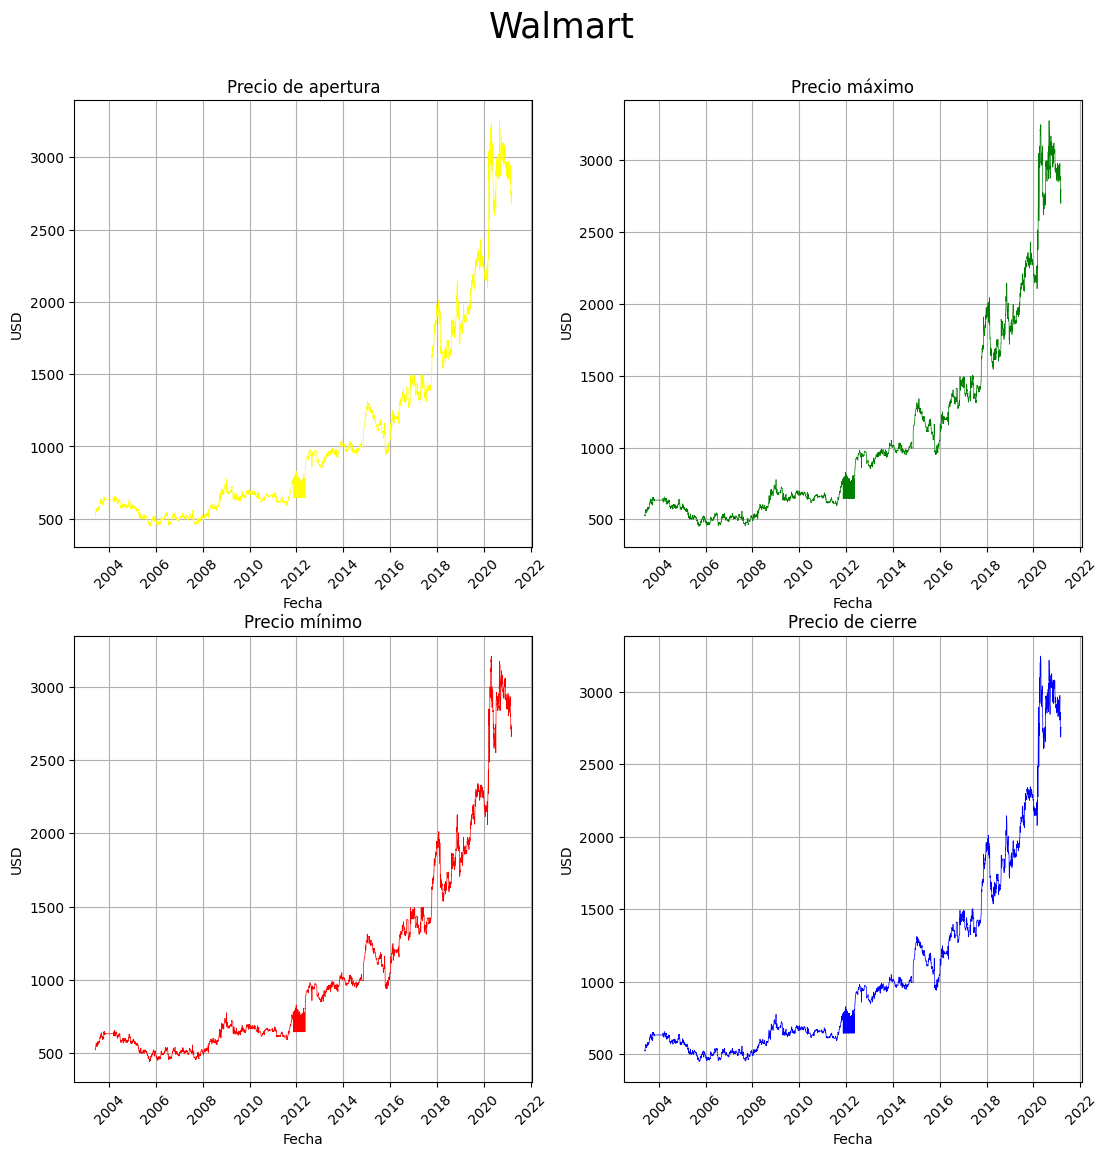

In [ ]:
plt.figure(figsize=(13, 13), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open, label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High, label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low, label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close, label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("Walmart", fontsize = 25, y = 0.95)
plt.show()

Podemos observar en los precios que hay una región extraña por el 2012, veamos que ocurre ahí.

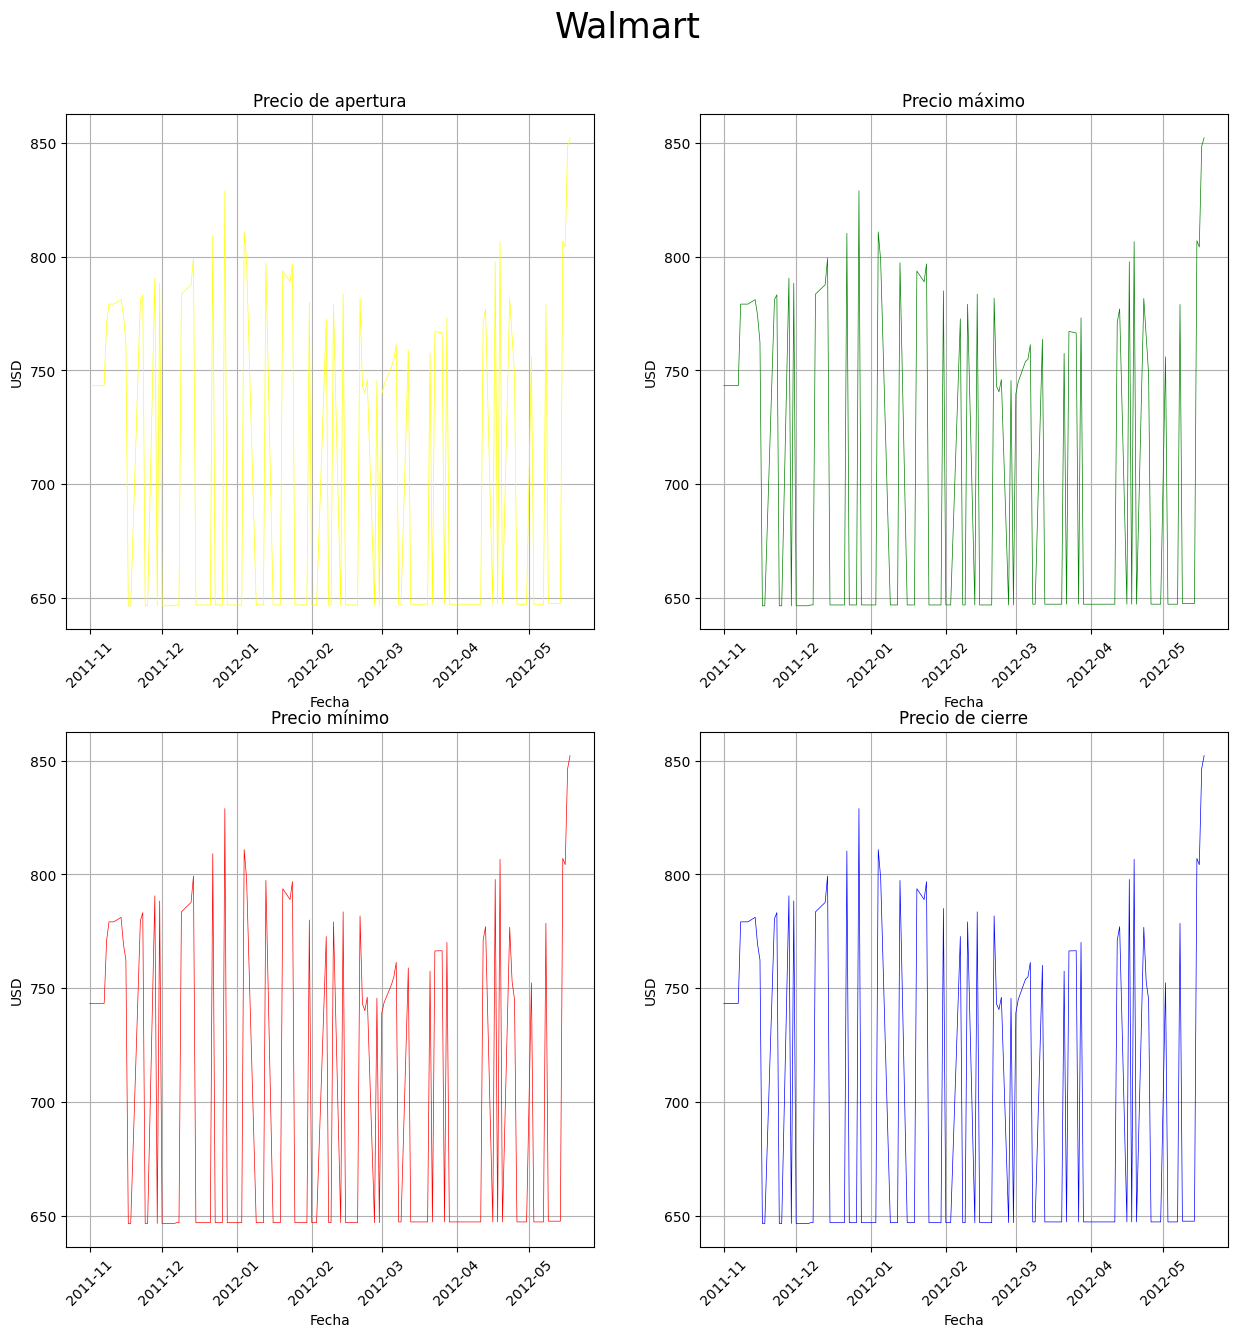

In [ ]:
plt.figure(figsize=(15, 15), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open.loc['2011-11-01': '2012-05-20'], label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High.loc['2011-11-01': '2012-05-20'], label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low.loc['2011-11-01': '2012-05-20'], label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close.loc['2011-11-01': '2012-05-20'], label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("Walmart", fontsize = 25, y = 0.95)
plt.show()

Se puede ver que el error es que la información no está bien dada en este periodo, pues la API nos regresa demasiadas fechas en las que el valor no se actuaizó lo cual causa que los datos no sean adecuados.

Para eliminar esto tomaremos un subconjunto de nuestros datos, los cuales corresponde a las observaciones registradas desde el 1 de junio de 2012 en adelante.

In [ ]:
df = df.loc['2012-06-01' :]
df

Open         High  ...  Dividends  Stock Splits
Date                                  ...                         
2012-06-01   923.840881   923.840881  ...        0.0             0
2012-06-04   926.113037   926.113037  ...        0.0             0
2012-06-05   926.103271   926.103271  ...        0.0             0
2012-06-06   926.103271   926.103271  ...        0.0             0
2012-06-07   926.103271   926.103271  ...        0.0             0
...                 ...          ...  ...        ...           ...
2021-03-02  2734.959961  2744.989990  ...        0.0             0
2021-03-03  2699.429932  2699.989990  ...        0.0             0
2021-03-04  2679.989990  2700.000000  ...        0.0             0
2021-03-05  2700.000000  2777.500000  ...        0.0             0
2021-03-08  2766.020020  2797.080078  ...        0.0             0

[2197 rows x 7 columns]

Ya con esto podemos volver a hacer las gráficas:

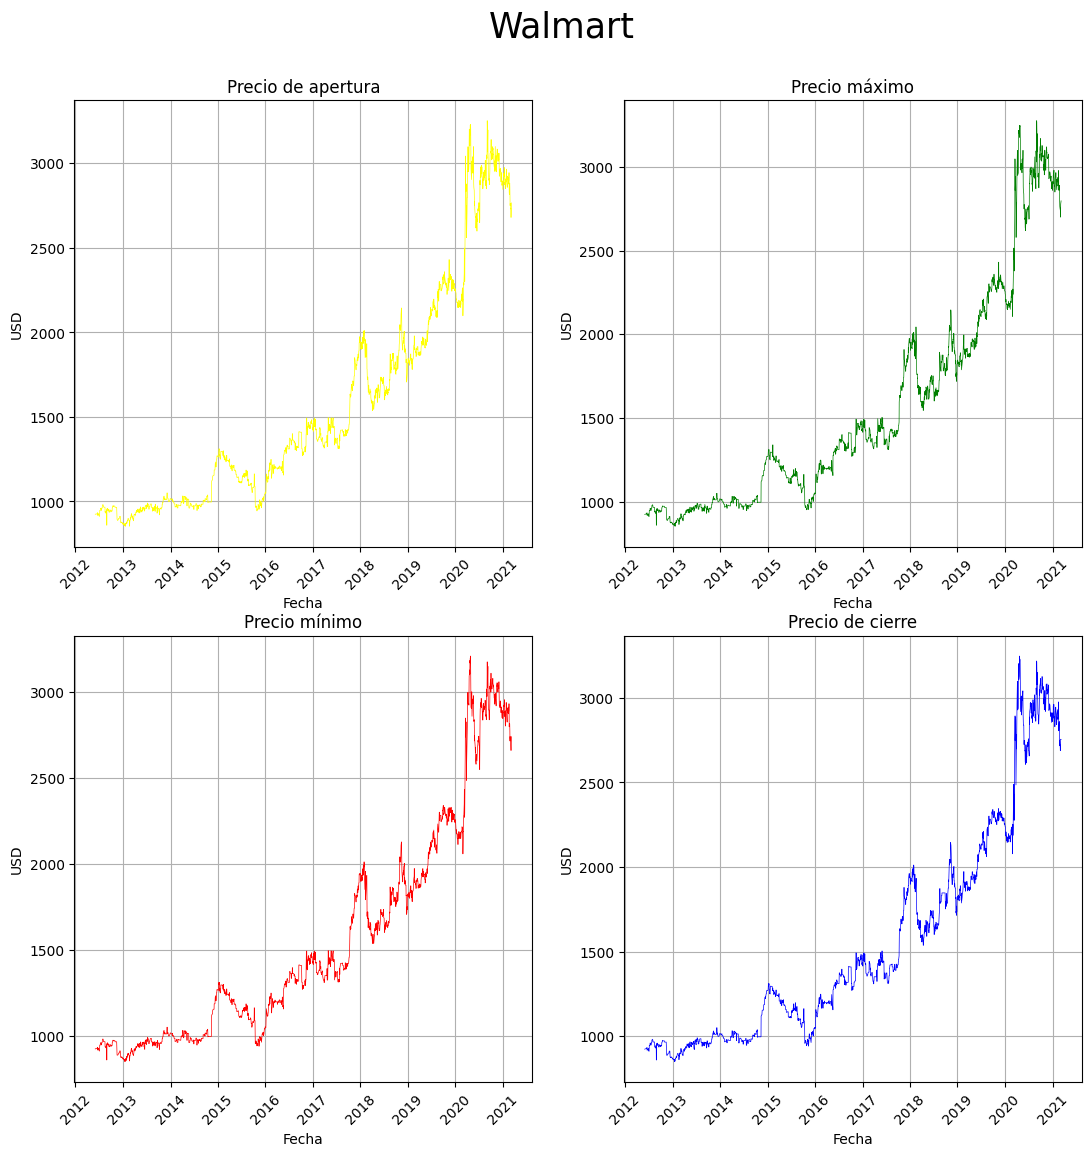

In [ ]:
plt.figure(figsize=(13, 13), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open, label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High, label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low, label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close, label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("Walmart", fontsize = 25, y = 0.95)
plt.show()

¡Mucho mejor!

Como en las empresas anteriores nos quedaremos solamente con los precios de cierre y a partir de ahí calcularemos los retornos:

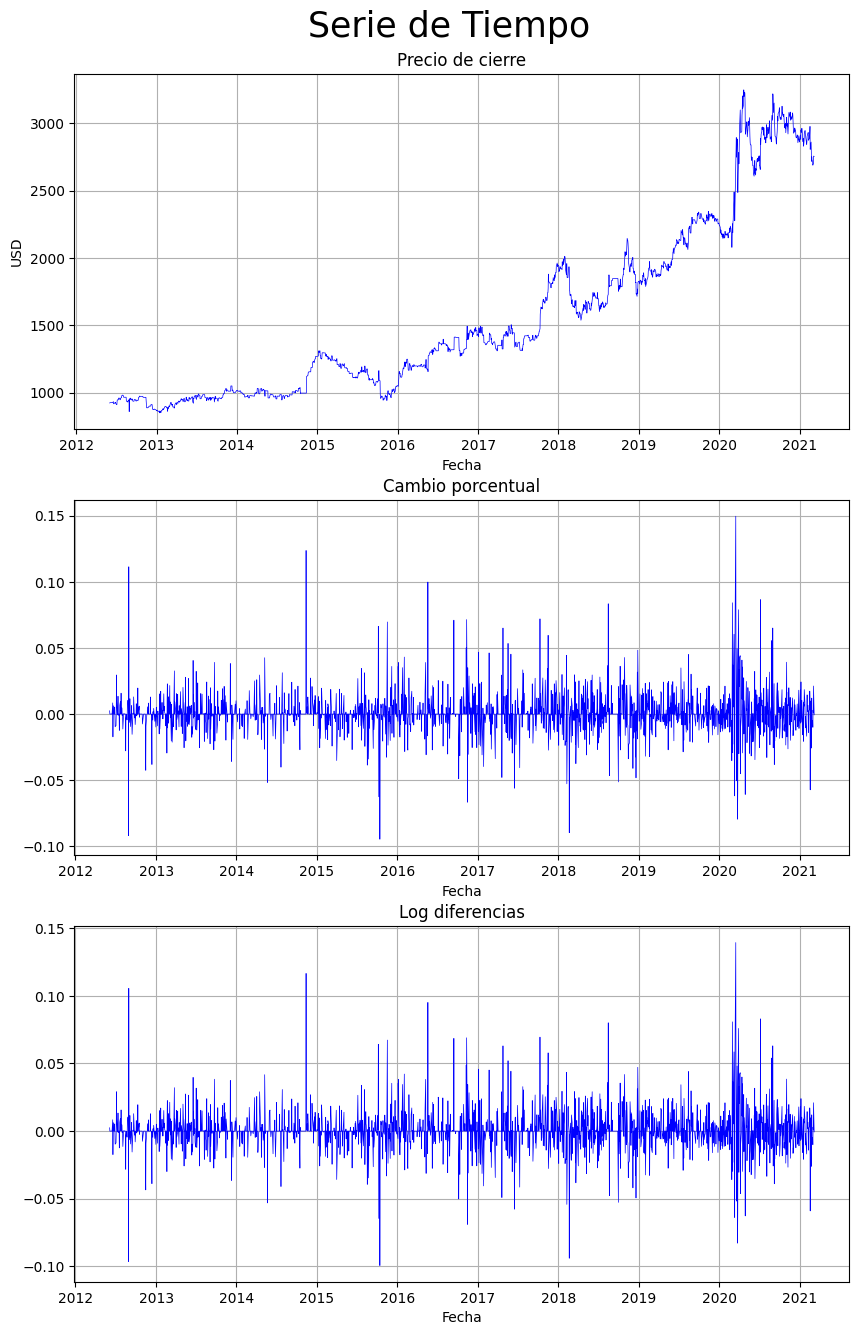

In [ ]:
ts = df.Close

pct_ret = ts.pct_change().dropna()
log_ret = np.log(ts).diff().dropna()

plt.figure(figsize=(10, 16), dpi = 100)

plt.subplot(3, 1, 1)
plt.plot(ts, lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(pct_ret, lw = 0.5, color = "blue")
plt.title("Cambio porcentual")
plt.xlabel("Fecha")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(log_ret, lw = 0.5, color = "blue")
plt.title("Log diferencias")
plt.xlabel("Fecha")
plt.grid()

plt.suptitle("Serie de Tiempo", fontsize = 25, y = 0.92)
plt.show()

Se pueden observar regiones de alta volatilidad, siendo la del año 2020 la más grande y considerable.

Veamos ahora los correlogramas de los retornos porcentuales y los retornos porcentuales al cuadrado. Empecemos con el ACF:

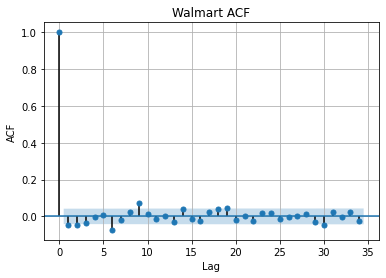

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret)
plt.title("Walmart ACF")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

Ahora el PACF:

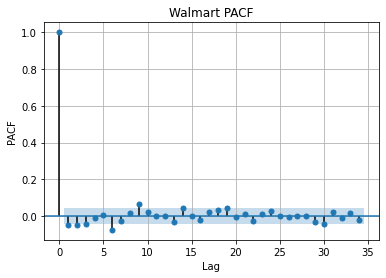

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret)
plt.title("Walmart PACF")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

Veamos ahora los correlogramas de los retornos al cuadrado. Primero el ACF:

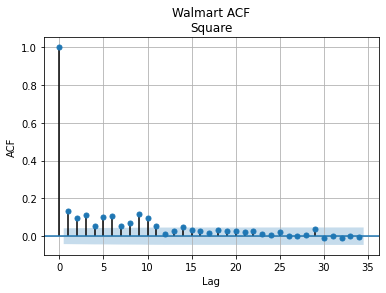

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret**2)
plt.title("Walmart ACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

Veamos finalmente el PACF:

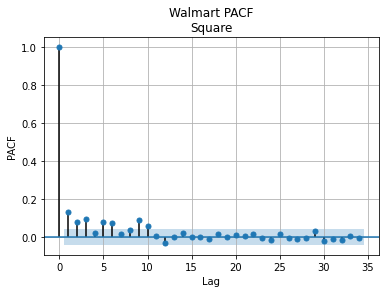

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret**2)
plt.title("Walmart PACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

Este último correlograma nos da indicios de que modelo GARCH podríamos ajustar, en este caso el primer lag es el más grande de todos los lags, por lo que es razonable empezar ajustando un modelo GARCH(1,1), pero primero hay que reescalar la serie:

In [ ]:
log_ret = 100 * log_ret
pct_ret = 100 * pct_ret

Ahora sí ya podemos ajustar un modelo GARCH(1,1).

In [ ]:
mod_1 = arch_model(pct_ret, mean = "zero", vol = "GARCH", p = 1, q = 1, dist = "t")
fit_1 = mod_1.fit(disp= "off")
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3295.97
Distribution:      Standardized Student's t   AIC:                           6599.95
Method:                  Maximum Likelihood   BIC:                           6622.72
                                              No. Observations:                 2196
Date:                      Tue, Mar 09 2021   Df Residuals:                     2196
Time:                              02:38:28   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1302      0.123      1.061      0.289   [ -0.110,  0.371]
alpha[1]       0.1297  4.260e-02      3.045  2.328e-03 [4.621e-02,  0.213]
beta[1]        0.8703  8.906e-02      9.772  1.480e-22   [  0.696,  1.045]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             2.2662  7.949e-02     28.509 9.064e-179 [  2.110,  2.422]
========================================================================

Covariance estimator: robust
"""

Veamos los p-values de los coeficientes:

In [ ]:
fit_1.pvalues < 0.05

omega       False
alpha[1]     True
beta[1]      True
nu           True
Name: pvalues, dtype: bool

En este caso resulta ser que el término omega NO es estadísticamente significativo por lo que es conveniente buscar otro modelo en el que este coeficiente sea significativo. En las empresas anteriores vimos que los modelos ARCH son un buen modelo para la volatilidad, entonces propongamos un ARCH(2).

In [ ]:
mod_2 = arch_model(pct_ret, mean = "zero", vol = "GARCH", p = 2, q = 0, dist = "t")
fit_2 = mod_2.fit(disp= "off")
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Zero Mean - ARCH Model Results                           
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -3323.85
Distribution:      Standardized Student's t   AIC:                           6655.69
Method:                  Maximum Likelihood   BIC:                           6678.47
                                              No. Observations:                 2196
Date:                      Tue, Mar 09 2021   Df Residuals:                     2196
Time:                              02:38:29   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.3437      0.779      4.291  1.775e-05   [  1.817,  4.871]
alpha[1]       0.6335      0.177      3.589  3.318e-04   [  0.288,  0.979]
alpha[2]       0.3665      0.161      2.282  2.248e-02 [5.174e-02,  0.681]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             2.1450  2.202e-02     97.434      0.000 [  2.102,  2.188]
========================================================================

Covariance estimator: robust
"""

Veamos los p-values de este modelo:

In [ ]:
fit_2.pvalues < 0.05

omega       True
alpha[1]    True
alpha[2]    True
nu          True
Name: pvalues, dtype: bool

Todos los términos son estadísticamente significativos, por lo que conservaremos el modelo.

Ya con un modelo ajustado podemos ver que tan bueno es prediciendo la volatilidad, nuevamente usaremos los últimos 365 días para comparar.

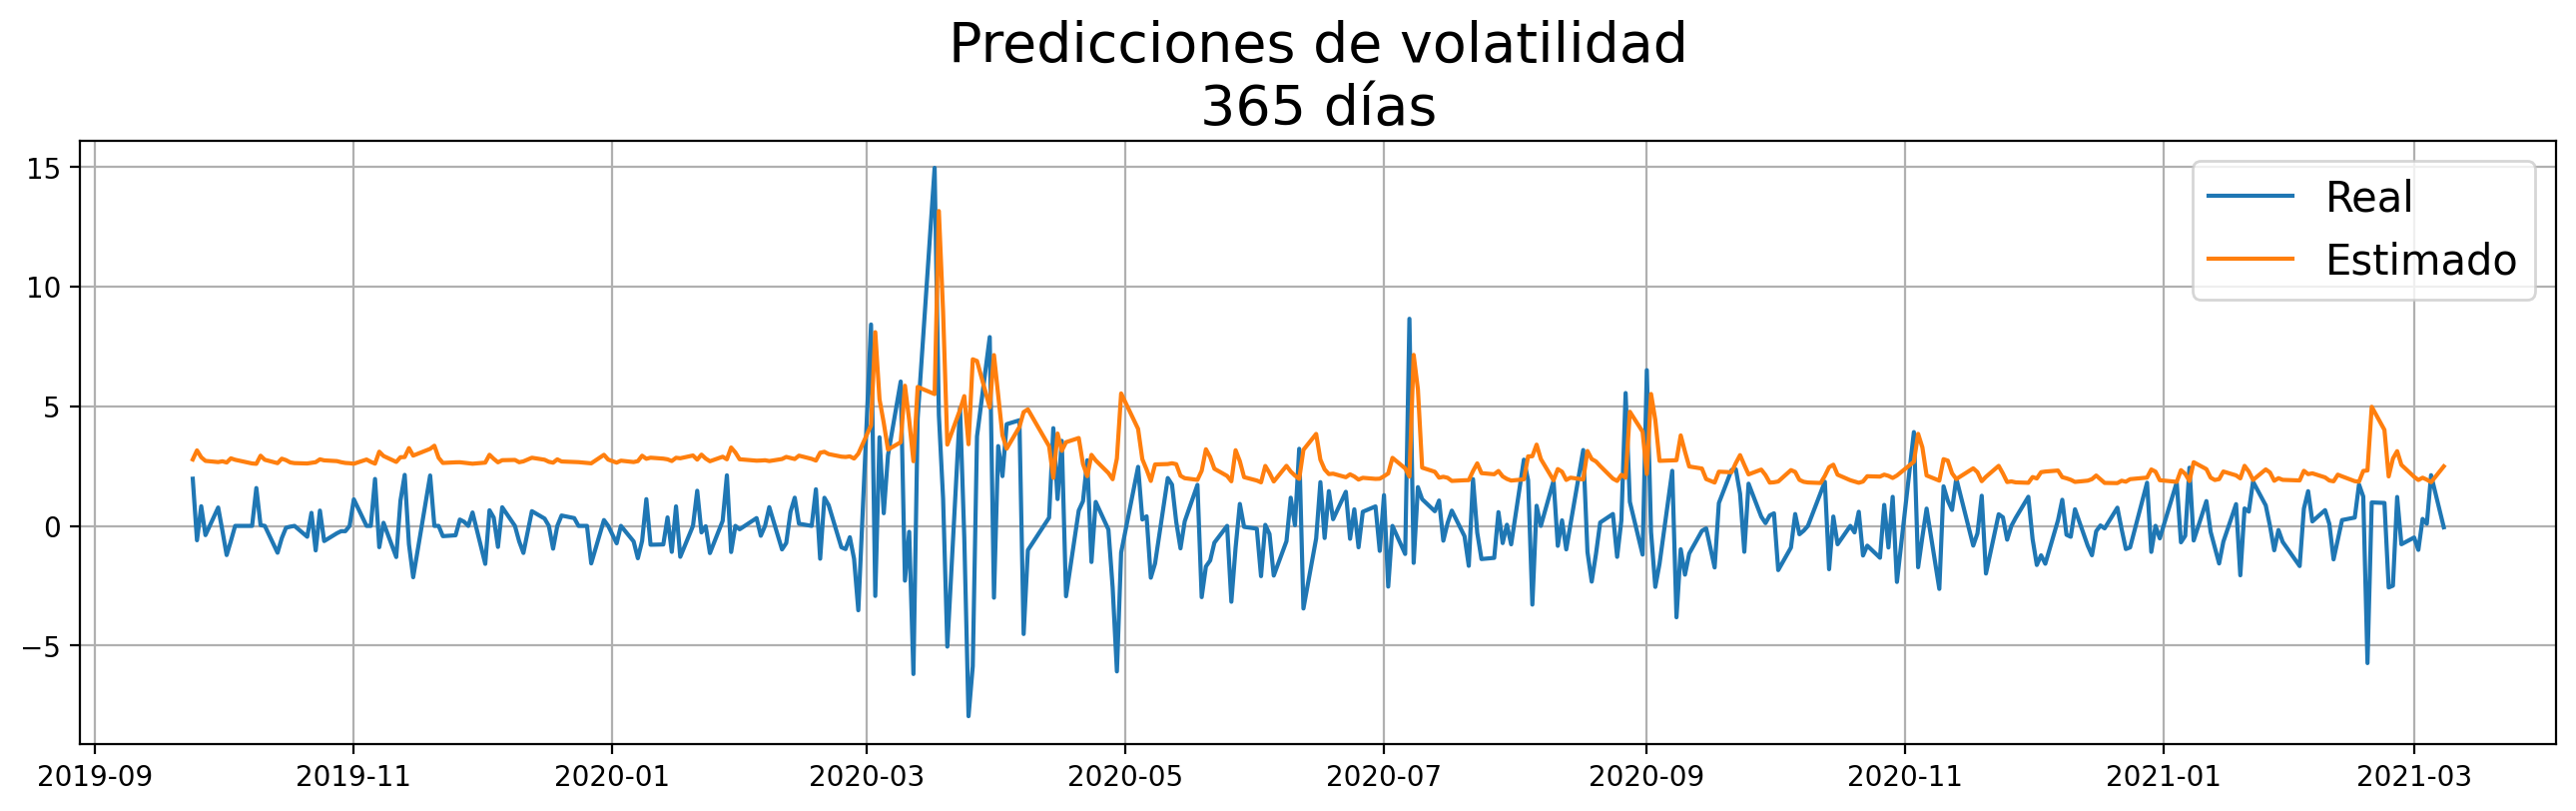

In [ ]:
roll_preds = []
test_size = 365

for i in range(test_size):
    train = pct_ret[:-(test_size - i)]
    mod = arch_model(train, vol = "GARCH", p = 2, q = 0, dist = "t")
    fit = mod.fit(disp = "off")
    pred = fit.forecast(horizon = 1)
    roll_preds.append(np.sqrt(pred.variance.values[-1:][0]))
    
roll_preds = pd.Series(roll_preds, index = pct_ret.index[-365:])

plt.figure(figsize = (16, 4), dpi = 200)
real, = plt.plot(pct_ret[-365:])
preds, = plt.plot(roll_preds)
plt.title("Predicciones de volatilidad\n365 días", fontsize = 20)
plt.legend(["Real", "Estimado"], fontsize = 15)
plt.grid()

El modelo predice bastante bien la subida de volatilidad que se encuentra entre marzo y mayo del 2020 y los repuntes de julio y septiembre.

Finalmente hagamos una predicción a 7 días:

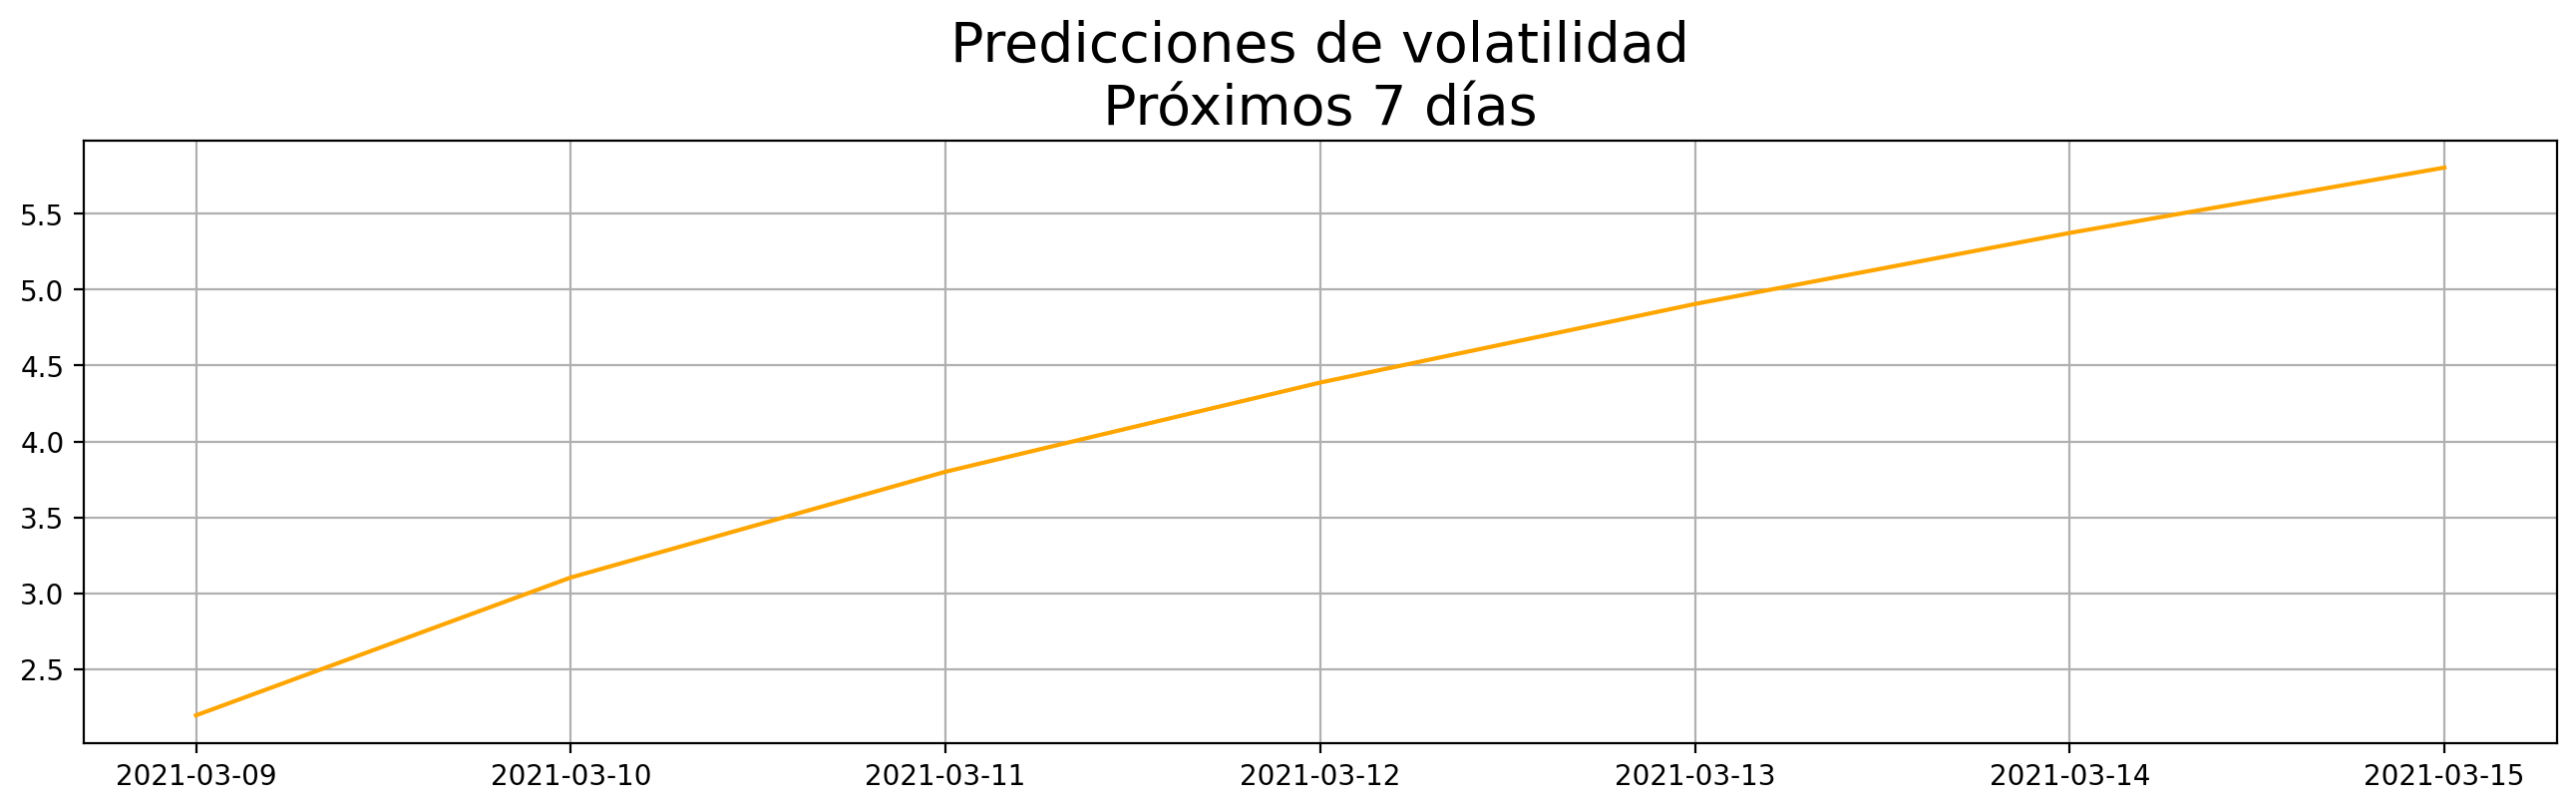

In [ ]:
train = pct_ret
model = arch_model(train, p = 1, q = 0, dist = "skewt")
fit = model.fit(disp = "off")

pred = fit.forecast(horizon = 7)
futuro = [pct_ret.index[-1] + timedelta(days = i) for i in range(1,8)]
pred3 = pd.Series(np.sqrt(pred.variance.values[-1,:]), index = futuro)

plt.figure(figsize = (16, 4), dpi = 200)
plt.plot(pred3, color = "orange")
plt.title("Predicciones de volatilidad\nPróximos 7 días", fontsize = 20)
plt.grid()

---
### Corporativo Fragua.

Nuestra siguiente empresa a analizar corresponde al **Corporativo Fragua**.

Empecemos haciendo la petición a la API y posteriormente conviertiendo los datos a un datframe.

In [ ]:
cfragua = yf.Ticker("FRAGUAB.MX")
df = cfragua.history(period = "max")

Veamos un resumen de la información contenida en el dataframe:

In [ ]:
df

Open        High         Low  ...  Volume  Dividends  Stock Splits
Date                                            ...                                 
2000-01-07   10.458428   10.458428   10.097793  ...       0        0.0             0
2000-01-10   10.097793   10.097793   10.097793  ...       0        0.0             0
2000-01-11   10.097793   10.097793   10.097793  ...       0        0.0             0
2000-01-12   10.169920   10.169920   10.097793  ...       0        0.0             0
2000-01-13   10.097793   10.097793   10.097793  ...       0        0.0             0
...                ...         ...         ...  ...     ...        ...           ...
2021-03-02  280.000000  280.000000  280.000000  ...   90472        0.0             0
2021-03-03  280.000000  280.000000  250.009995  ...   15192        0.0             0
2021-03-04  268.079987  268.079987  263.000000  ...      48        0.0             0
2021-03-05  264.000000  264.000000  264.000000  ...       0        0.0             0
2021-03-08  267.750000  267.750000  267.500000  ...     128        0.0             0

[5375 rows x 7 columns]

In [ ]:
df.describe()

Open         High  ...    Dividends  Stock Splits
count  5375.000000  5375.000000  ...  5375.000000        5375.0
mean    125.784573   126.170983  ...     0.004037           0.0
std      93.313436    93.701782  ...     0.079812           0.0
min       8.799504     8.799504  ...     0.000000           0.0
25%      13.549850    13.549850  ...     0.000000           0.0
50%     120.287483   120.287483  ...     0.000000           0.0
75%     217.601955   218.557253  ...     0.000000           0.0
max     299.989990   299.989990  ...     3.100000           0.0

[8 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5375 entries, 2000-01-07 to 2021-03-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5375 non-null   float64
 1   High          5375 non-null   float64
 2   Low           5375 non-null   float64
 3   Close         5375 non-null   float64
 4   Volume        5375 non-null   int64  
 5   Dividends     5375 non-null   float64
 6   Stock Splits  5375 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 335.9 KB


Podemos observar que el dataframe consta de un poco más de 5300 observaciones de 7 columnas y no hay datos nulos, además de que el tipo de dato es correcto.

Veamos las gráficas de los precios:

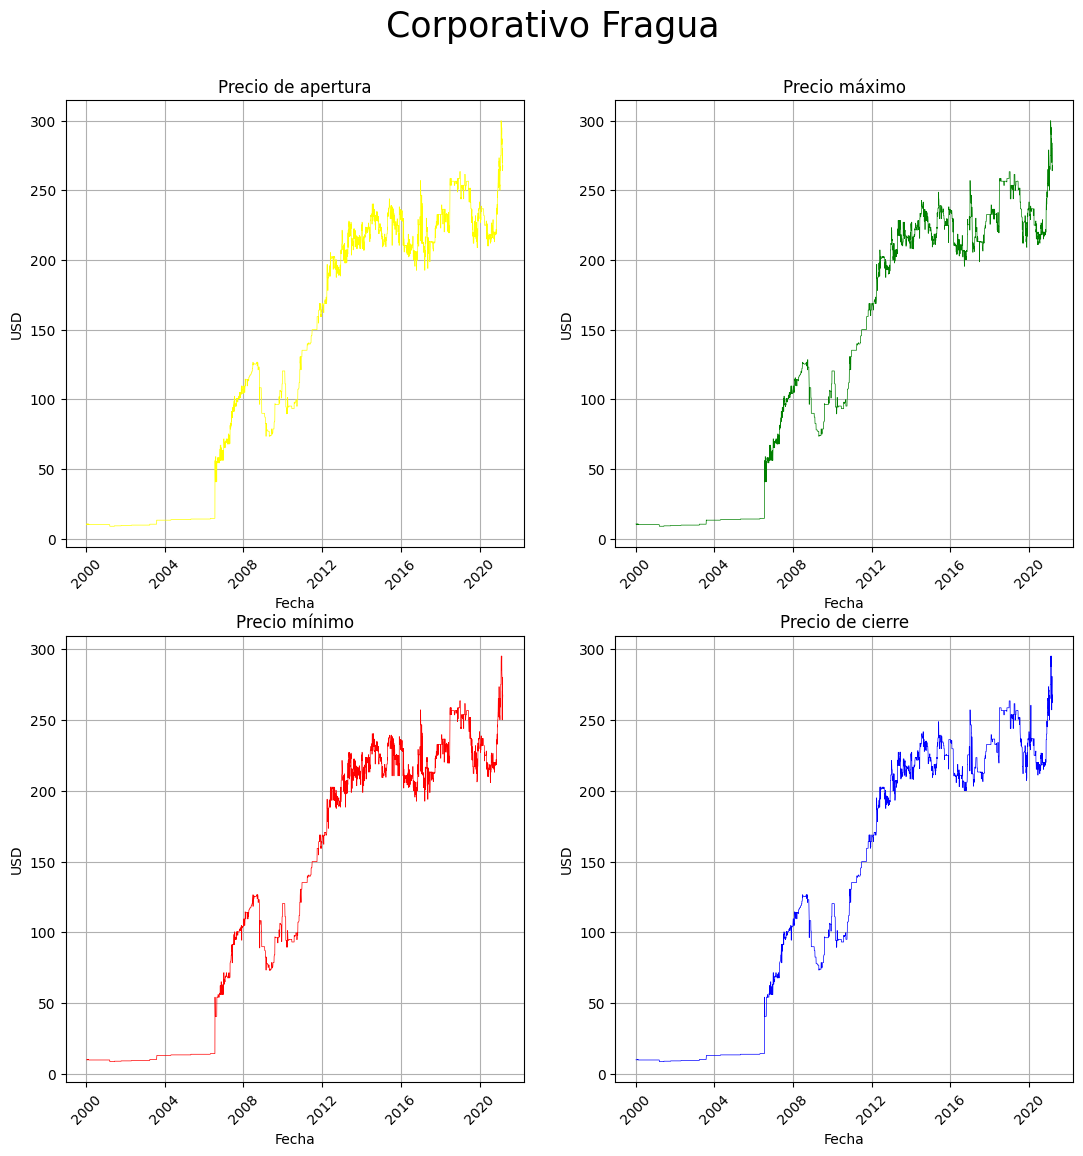

In [ ]:
plt.figure(figsize=(13, 13), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open, label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High, label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low, label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close, label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("Corporativo Fragua", fontsize = 25, y = 0.95)
plt.show()

Podemos observar que entre 2000 y 2008 los precios de esta empresa se mantuvieron iguales, cosa que es bantante raro en este tipo de series. Sin embargo no se encontró información histórica que permitiera probar que hay un error.

Trabajaremos con los precios de cierre y a partir de ahí calcularemos los retornos.

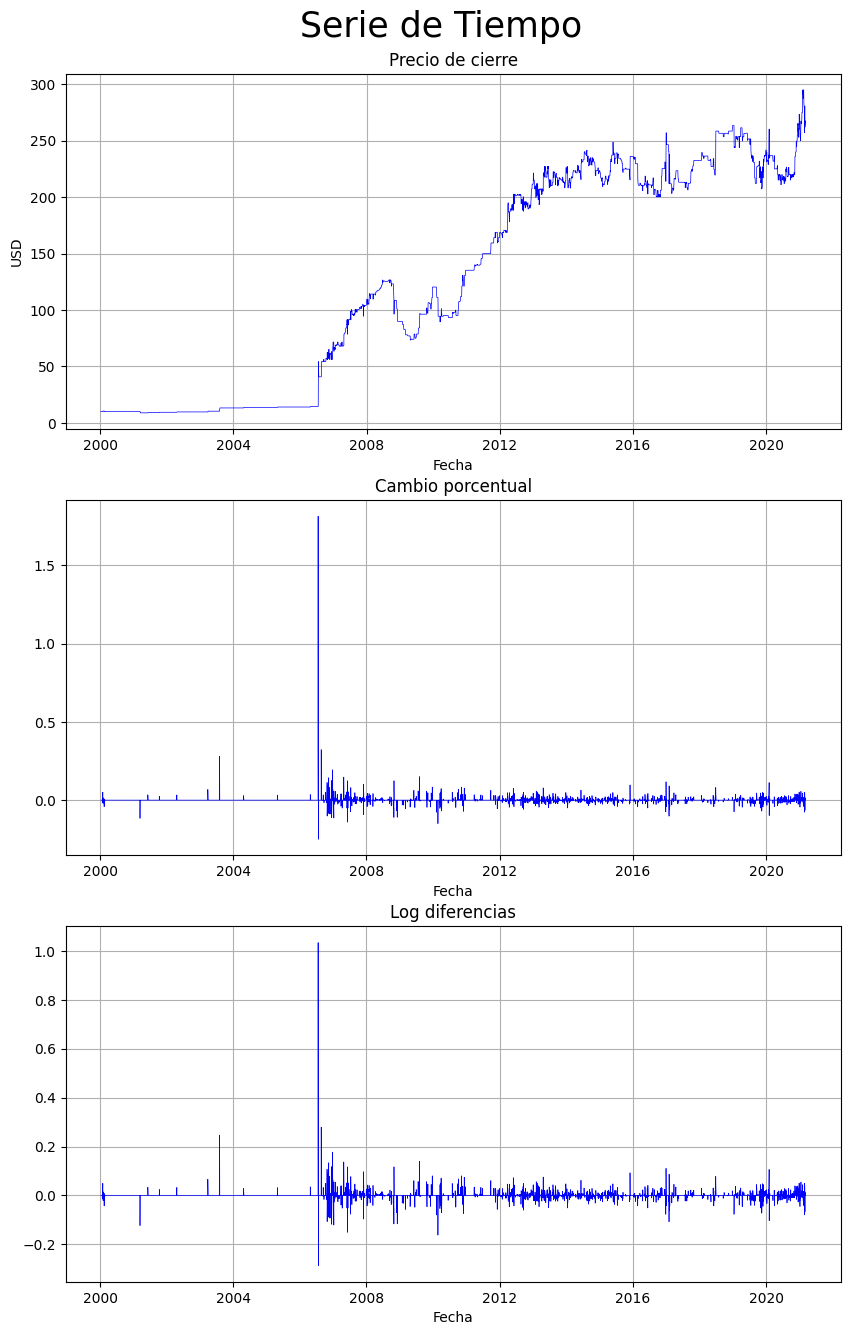

In [ ]:
ts = df.Close

pct_ret = ts.pct_change().dropna()
log_ret = np.log(ts).diff().dropna()

plt.figure(figsize=(10, 16), dpi = 100)

plt.subplot(3, 1, 1)
plt.plot(ts, lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(pct_ret, lw = 0.5, color = "blue")
plt.title("Cambio porcentual")
plt.xlabel("Fecha")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(log_ret, lw = 0.5, color = "blue")
plt.title("Log diferencias")
plt.xlabel("Fecha")
plt.grid()

plt.suptitle("Serie de Tiempo", fontsize = 25, y = 0.92)
plt.show()

Podemos observar que esa parte constante entre 2000 y 2008 hace que la serie de tiempo de los retornos presente comportamientos raros, por lo que es necesario quitarlos para hacer un buen análisis de los retornos. Vamos a por la fecha del salto abrupto en los retornos.

In [ ]:
pct_ret[ pct_ret == pct_ret.max()]

Date
2006-07-20    1.8125
Name: Close, dtype: float64

Resulta ser que el 20 de julio de 2006 los precios de la empresa aumentaron de forma tan abrupta, ese es el escalón que se ve en la gráfica de los precios y es el valor extremo que se ven en los retornos. Para poder trabajar de una manera adecuada con la serie es necesario quitar estos valores, por eso nos quedaremos con la serie desde agosto del 2006 en adelante. Vemos la serie de tiempo y sus retornos para este periodo:

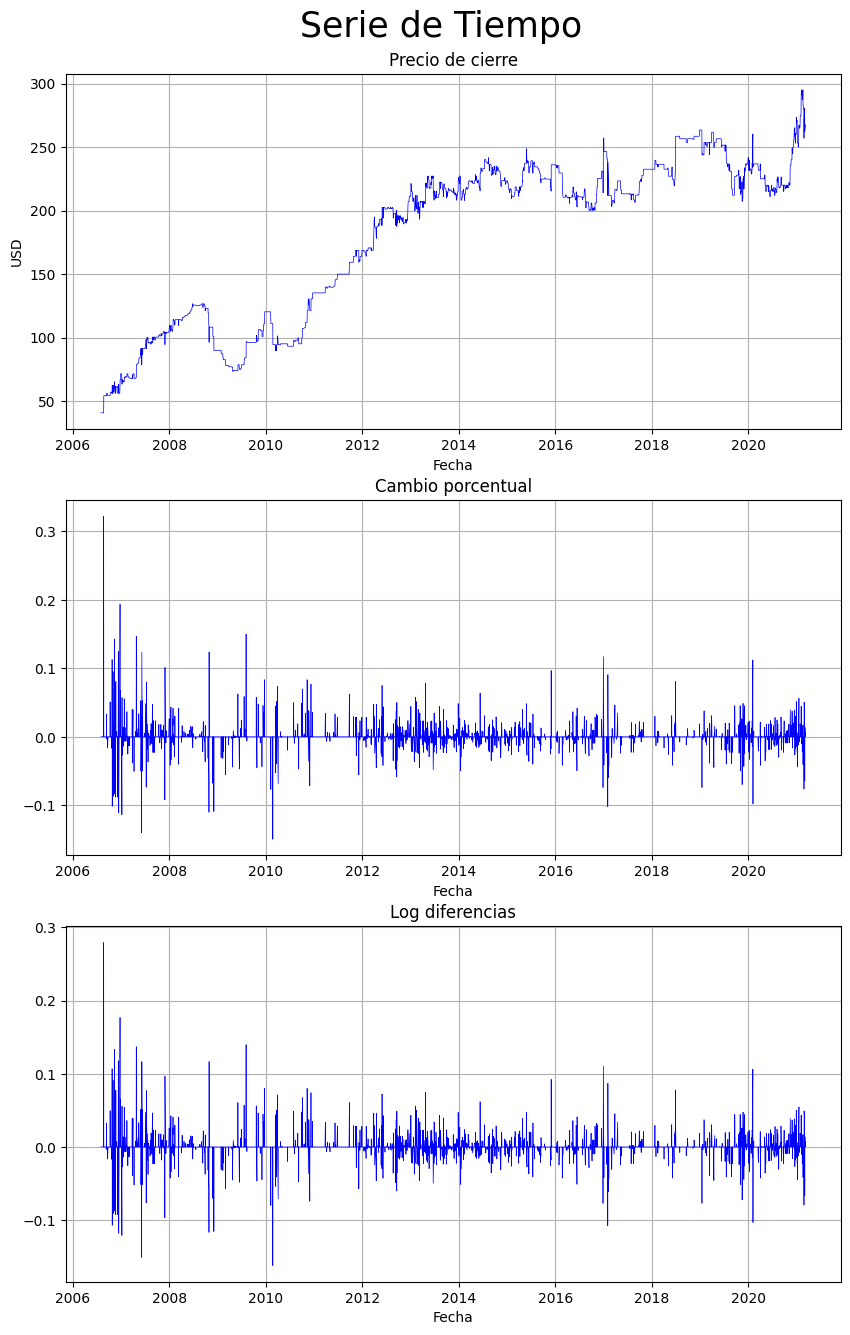

In [ ]:
ts = df.Close.loc['2006-08-01' :]

pct_ret = ts.pct_change().dropna()
log_ret = np.log(ts).diff().dropna()

plt.figure(figsize=(10, 16), dpi = 100)

plt.subplot(3, 1, 1)
plt.plot(ts, lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(pct_ret, lw = 0.5, color = "blue")
plt.title("Cambio porcentual")
plt.xlabel("Fecha")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(log_ret, lw = 0.5, color = "blue")
plt.title("Log diferencias")
plt.xlabel("Fecha")
plt.grid()

plt.suptitle("Serie de Tiempo", fontsize = 25, y = 0.92)
plt.show()

¡Mucho mejor!

Podemos observar en los retornos que esta empresa no presentan periodos prolongados de volatilidad alta, siendo la más notable la que se encuentra entre 2006 y 2008, cuya volatilidad alta puede explicarse por el hecho del rápido aumento del valor de las acciones de la empresa.

Veamos los correlogramas de los retornos y de los retornos al cuadrado.

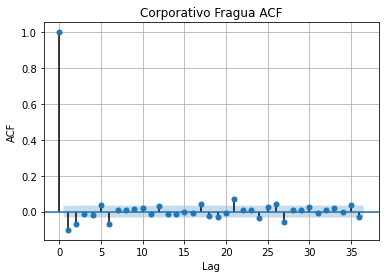

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret)
plt.title("Corporativo Fragua ACF")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

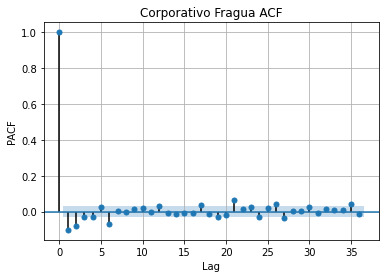

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret)
plt.title("Corporativo Fragua ACF")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

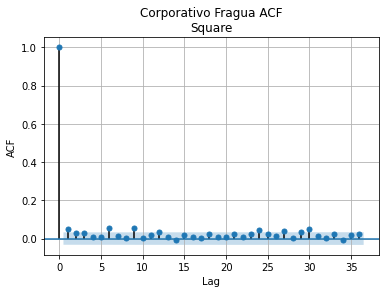

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret**2)
plt.title("Corporativo Fragua ACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

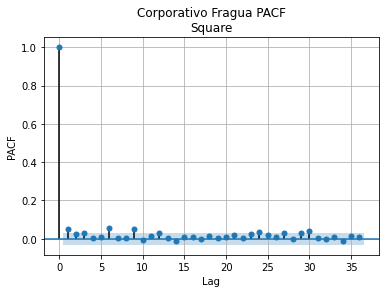

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret**2)
plt.title("Corporativo Fragua PACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

Desgraciadamente el PACF de los retornos al cuadrado no arroja información que sugiera un modelo en específico, por lo que usaremos nuestra experiencia en los modelos anteriores y empezaremos proponiendo un modelo ARCH(1). Empecemos reescalando la serie

In [ ]:
log_ret = 100 * log_ret
pct_ret = 100 * pct_ret

 Posteriormente ajustemos el modelo

In [ ]:
mod_1 = arch_model(pct_ret, mean = "constant", vol = "GARCH", p = 1, q = 0, dist = "normal")
fit_1 = mod_1.fit(disp= "off")
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6903.27
Distribution:                  Normal   AIC:                           13812.5
Method:            Maximum Likelihood   BIC:                           13831.2
                                        No. Observations:                 3662
Date:                Tue, Mar 09 2021   Df Residuals:                     3661
Time:                        02:39:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0625  2.646e-02      2.362  1.817e-02 [1.064e-02,  0.114]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.2986      0.397      5.785  7.246e-09   [  1.520,  3.077]
alpha[1]       0.2156  8.392e-02      2.569  1.019e-02 [5.114e-02,  0.380]
==========================================================================

Covariance estimator: robust
"""

Veamos los pvalues:

In [ ]:
fit_1.pvalues < 0.05

mu          True
omega       True
alpha[1]    True
Name: pvalues, dtype: bool

En este caso todos los coeficientes resultan ser estadísticamente significativos. Comparemos los valores arrojados por el modelo con los valores reales para las últimas 365 observaciones.

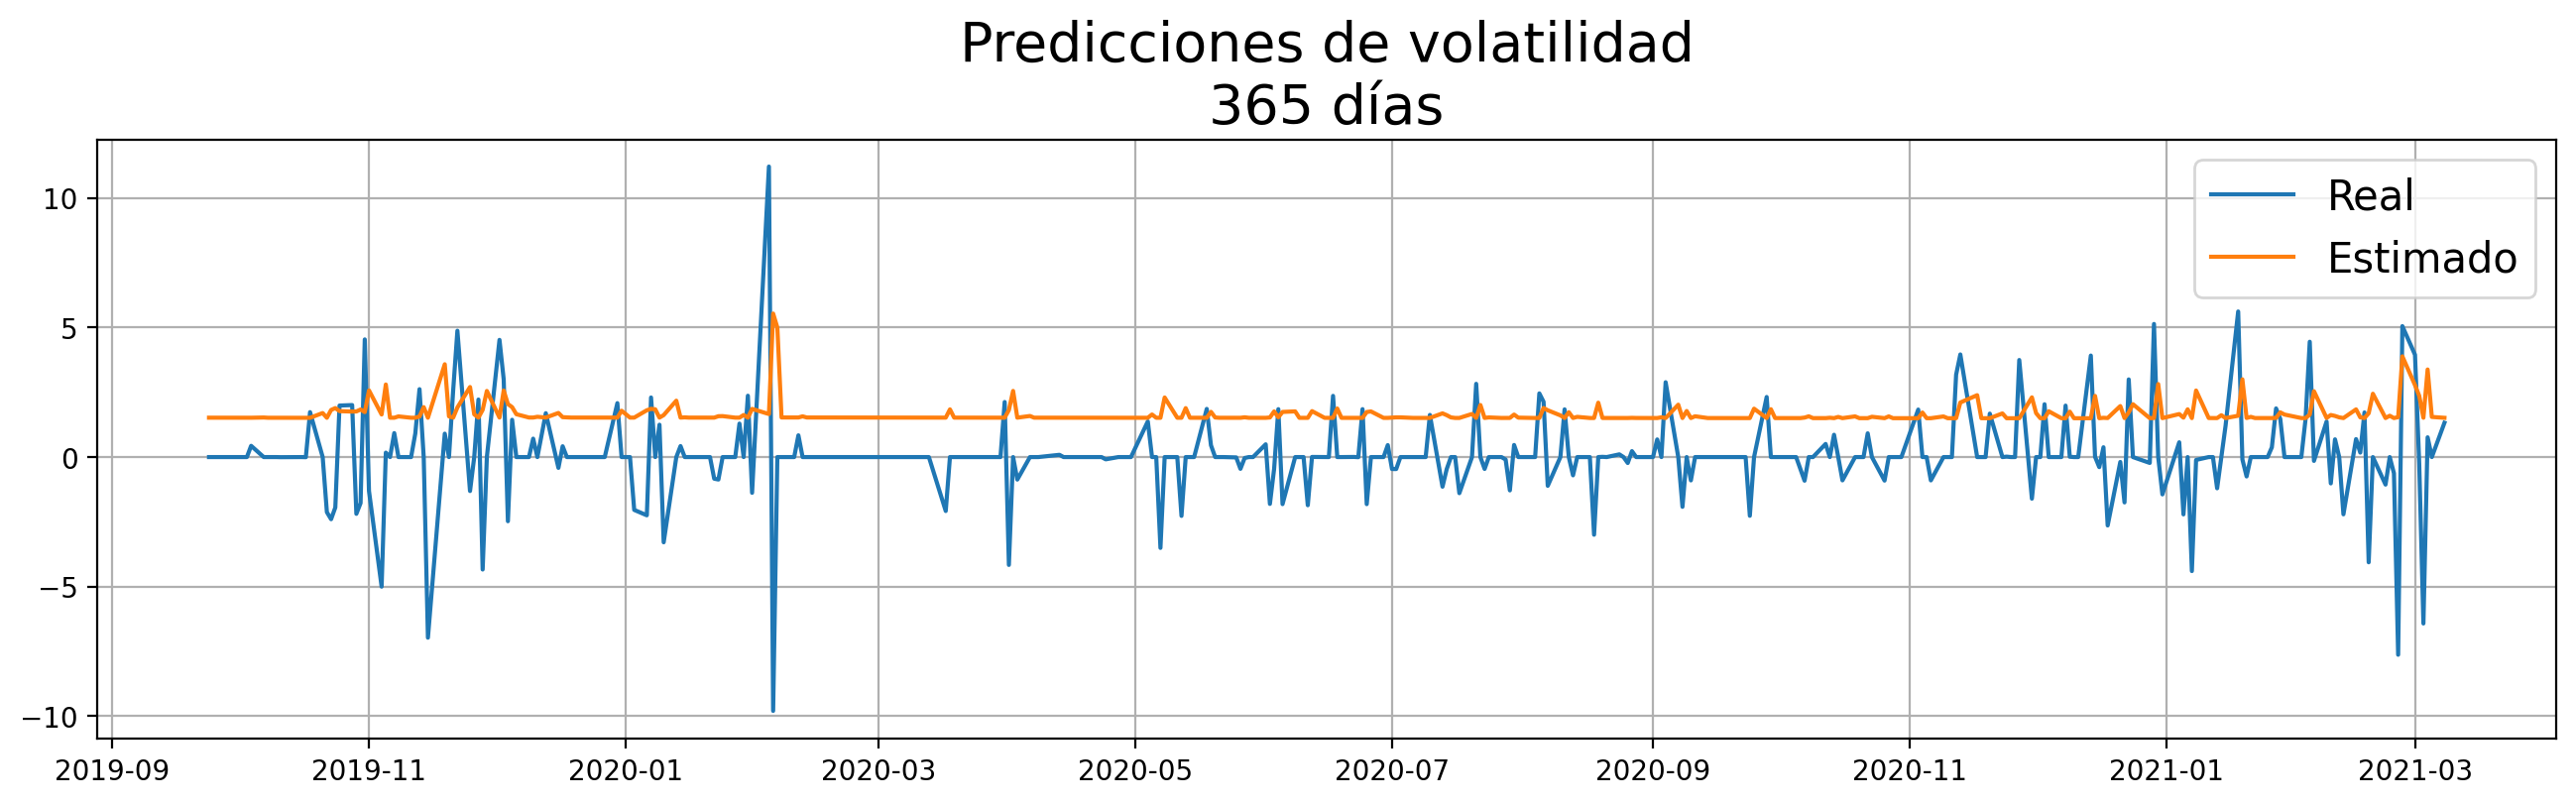

In [ ]:
roll_preds = []
test_size = 365

for i in range(test_size):
    train = pct_ret[:-(test_size - i)]
    mod = arch_model(train, vol = "GARCH", p = 1, q = 0, dist = "normal")
    fit = mod.fit(disp = "off")
    pred = fit.forecast(horizon = 1)
    roll_preds.append(np.sqrt(pred.variance.values[-1:][0]))
    
roll_preds = pd.Series(roll_preds, index = pct_ret.index[-365:])

plt.figure(figsize = (16, 4), dpi = 200)
real, = plt.plot(pct_ret[-365:])
preds, = plt.plot(roll_preds)
plt.title("Predicciones de volatilidad\n365 días", fontsize = 20)
plt.legend(["Real", "Estimado"], fontsize = 15)
plt.grid()

Se puede ver que el modelo predice bien la subida de volatilidad entre enero y marzo de 2020, mientras que el resto de subidas ya no las predice del todo bien.

Finalmente veamos una predicción a 7 días en el futuro.

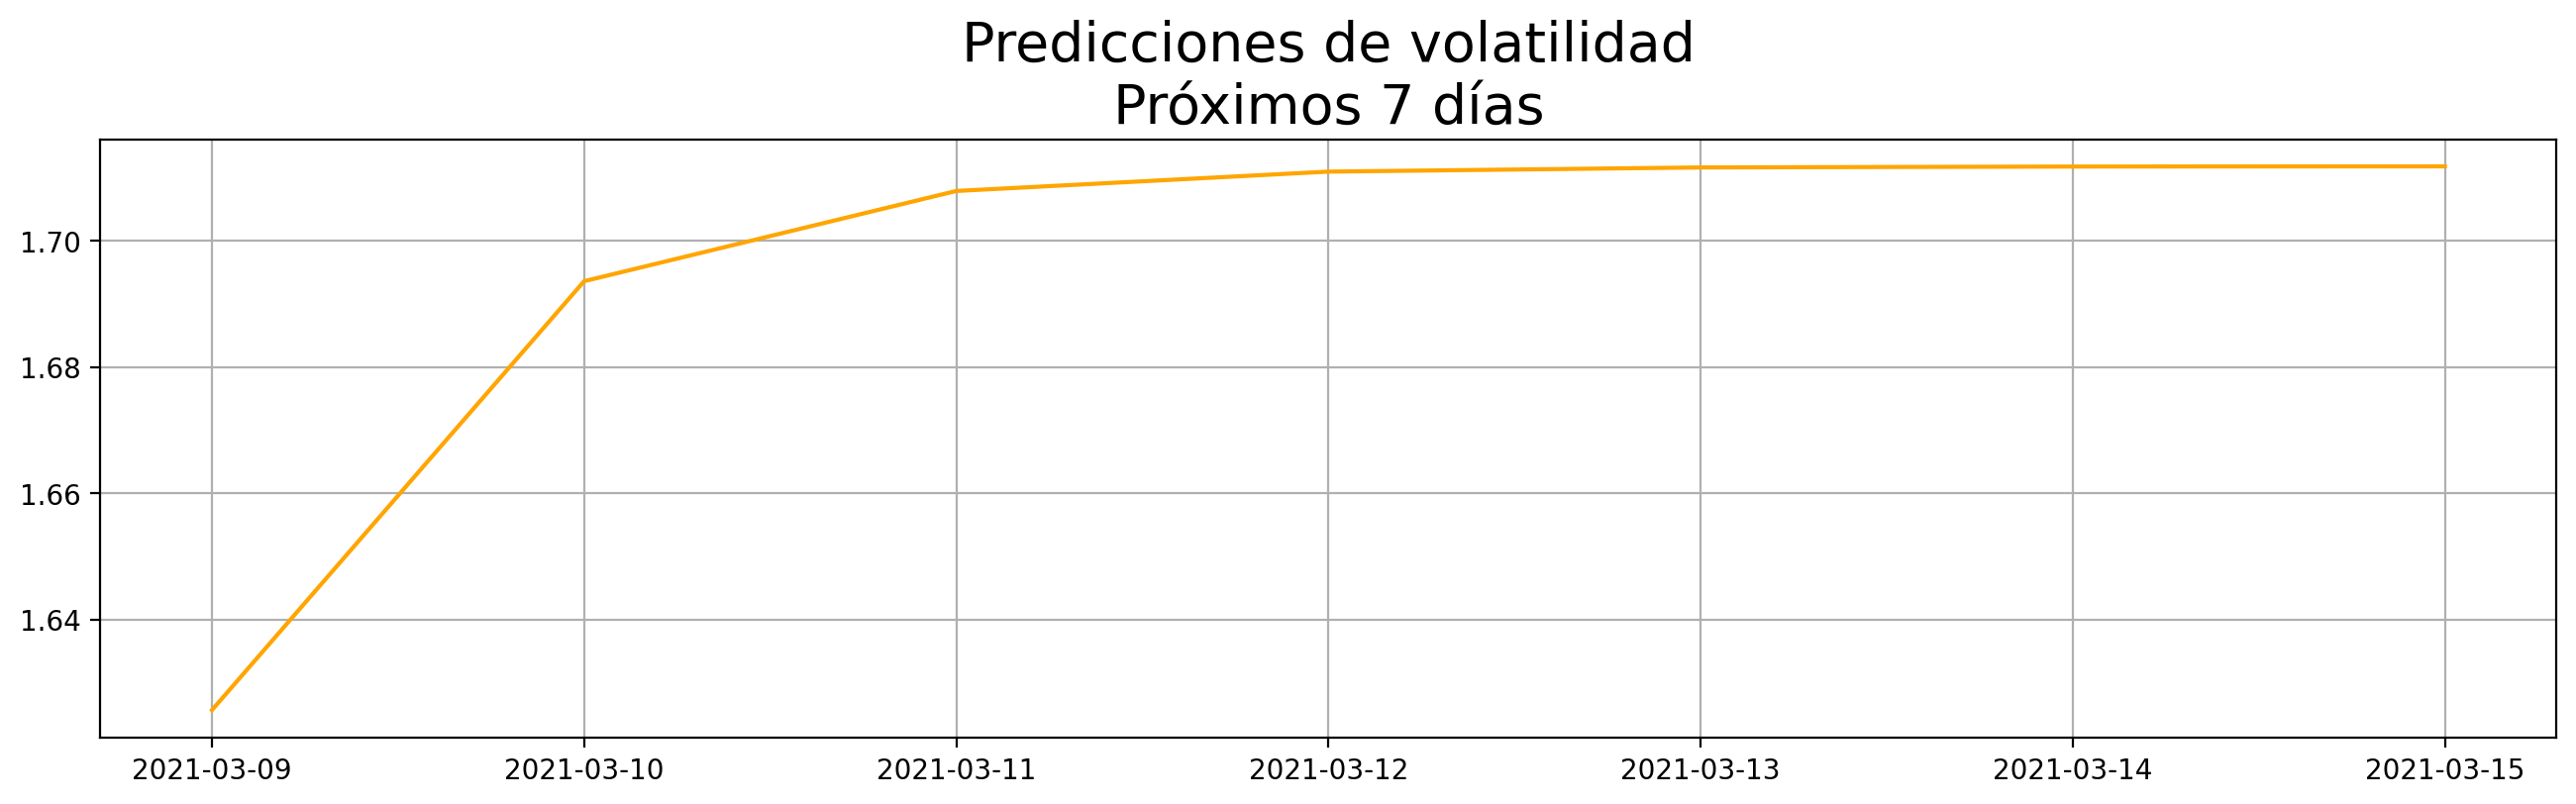

In [ ]:
train = pct_ret
model = arch_model(train, p = 1, q = 0, dist = "normal")
fit = model.fit(disp = "off")

pred = fit.forecast(horizon = 7)
futuro = [pct_ret.index[-1] + timedelta(days = i) for i in range(1,8)]
pred4 = pd.Series(np.sqrt(pred.variance.values[-1,:]), index = futuro)

plt.figure(figsize = (16, 4), dpi = 200)
plt.plot(pred4, color = "orange")
plt.title("Predicciones de volatilidad\nPróximos 7 días", fontsize = 20)
plt.grid()

---
### Grupo Financiero Banorte.

Nuestra siguiente empresa a analizar es **Grupo Financiero Banorte**. Empecemos pidiendo la información a la API y conviertiendo esta información en dataframe.

In [ ]:
banorte = yf.Ticker("GFNORTEO.MX")
df = banorte.history(period = "max")

Veamos la información del dataframe y algunas estadísticas sobre este

In [ ]:
df

Open        High  ...  Dividends  Stock Splits
Date                                ...                         
2000-01-03    2.586332    2.607590  ...        0.0           0.0
2000-01-04    2.462331    2.462331  ...        0.0           0.0
2000-01-05    2.249754    2.384385  ...        0.0           0.0
2000-01-06    2.320613    2.356042  ...        0.0           0.0
2000-01-07    2.359585    2.437529  ...        0.0           0.0
...                ...         ...  ...        ...           ...
2021-03-02  104.699997  109.989998  ...        0.0           0.0
2021-03-03  108.489998  113.800003  ...        0.0           0.0
2021-03-04  112.989998  114.989998  ...        0.0           0.0
2021-03-05  108.379997  109.589996  ...        0.0           0.0
2021-03-08  105.889999  112.589996  ...        0.0           0.0

[5311 rows x 7 columns]

In [ ]:
df.describe()

Open         High  ...    Dividends  Stock Splits
count  5311.000000  5311.000000  ...  5311.000000   5311.000000
mean     48.539345    49.182011  ...     0.004045      0.000753
std      36.676593    37.115591  ...     0.097905      0.054887
min       1.789174     1.813976  ...     0.000000      0.000000
25%      13.785707    13.887940  ...     0.000000      0.000000
50%      40.164051    40.654023  ...     0.000000      0.000000
75%      78.461275    79.431713  ...     0.000000      0.000000
max     129.424837   131.568021  ...     5.541570      4.000000

[8 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5311 entries, 2000-01-03 to 2021-03-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5311 non-null   float64
 1   High          5311 non-null   float64
 2   Low           5311 non-null   float64
 3   Close         5311 non-null   float64
 4   Volume        5311 non-null   int64  
 5   Dividends     5311 non-null   float64
 6   Stock Splits  5311 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 331.9 KB


Se tiene que el dataframe consta de un poco más de 5300 observaciones en 7 columnas, no hay datos nulo y los tipos de datos son adecuados.

Veamos las gráficas de los precios de la empresa.

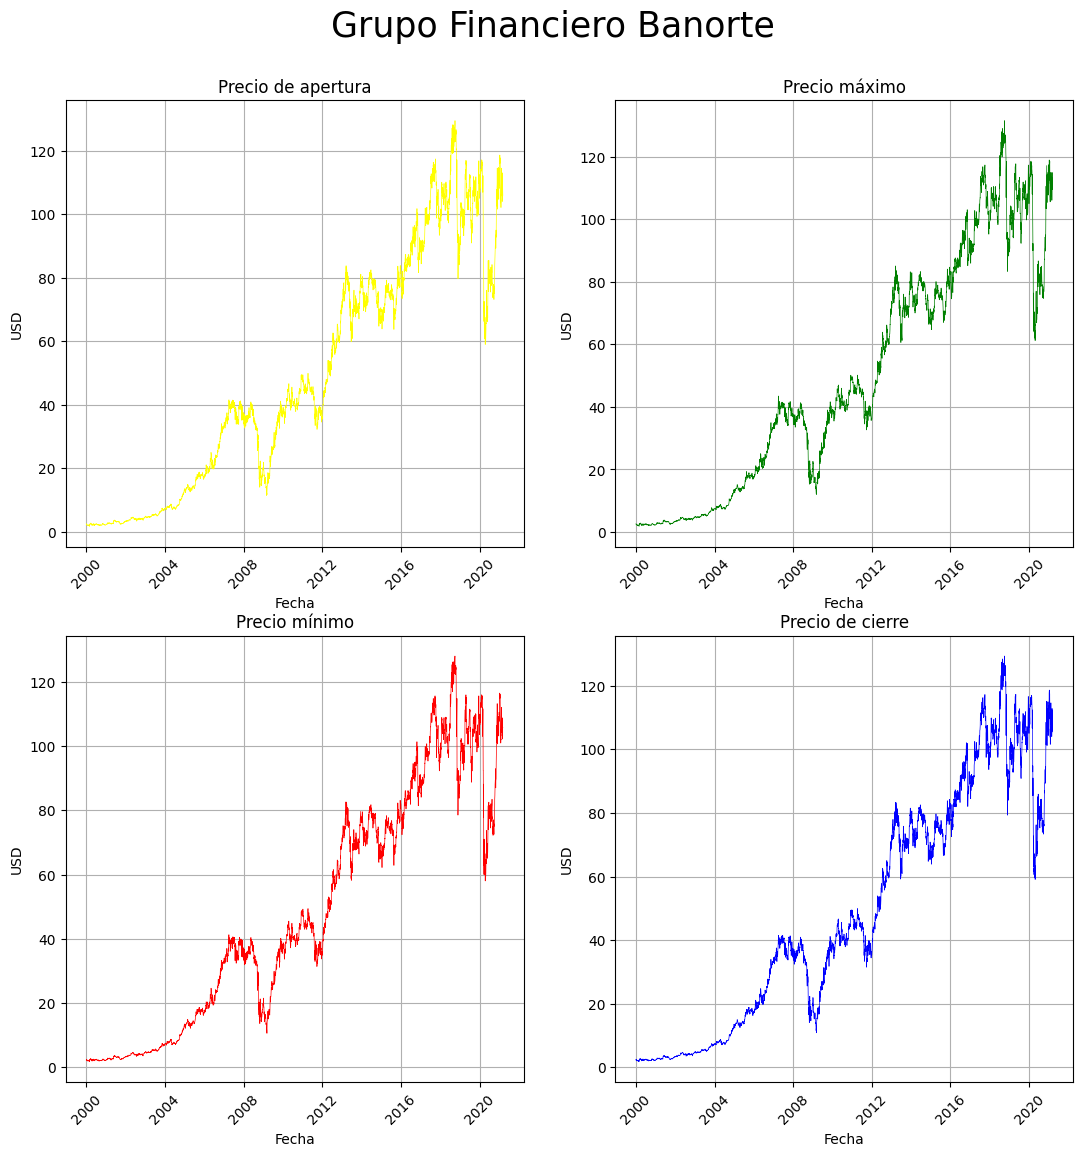

In [ ]:
plt.figure(figsize=(13, 13), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open, label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High, label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low, label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close, label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("Grupo Financiero Banorte", fontsize = 25, y = 0.95)
plt.show()

En comparación a las empresas anteriores, se puede ver que esta serie de tiempo no presenta datos anómalos o zonas extrañas que tengan que ser analizadas con cuidado, por lo que podemos empezar directamente el análisis.

Comencemos quedandonos con los precios de cierre y a partir de estos calculamos los retornos.

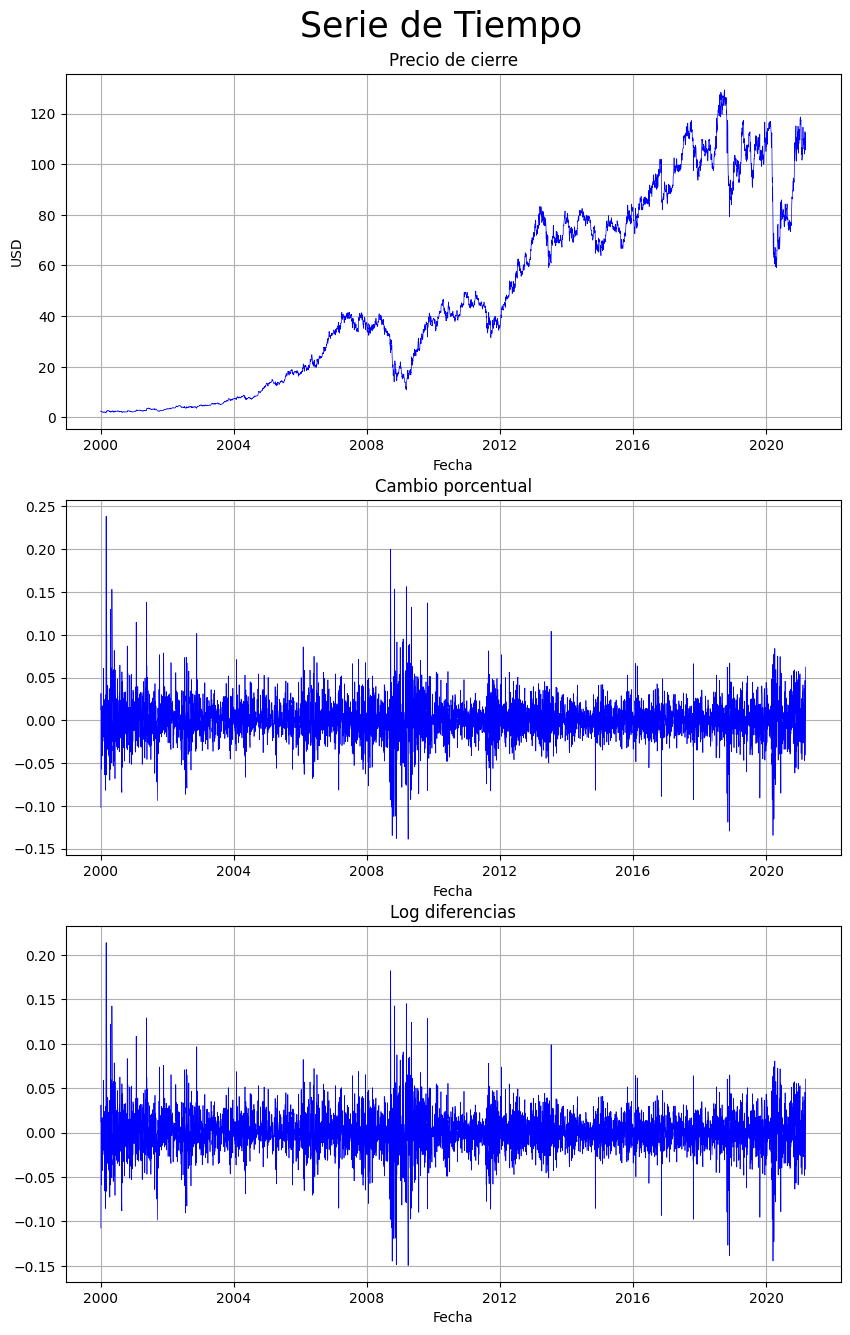

In [ ]:
ts = df.Close

pct_ret = ts.pct_change().dropna()
log_ret = np.log(ts).diff().dropna()

plt.figure(figsize=(10, 16), dpi = 100)

plt.subplot(3, 1, 1)
plt.plot(ts, lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(pct_ret, lw = 0.5, color = "blue")
plt.title("Cambio porcentual")
plt.xlabel("Fecha")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(log_ret, lw = 0.5, color = "blue")
plt.title("Log diferencias")
plt.xlabel("Fecha")
plt.grid()

plt.suptitle("Serie de Tiempo", fontsize = 25, y = 0.92)
plt.show()

Podemos ver que a principios del 2000 los valores de la empresa tuvieron una alta volatilidad, esto se debe principalmente a que empezó a aumentar su precio. Luego hay otra región de alta volatilidad que corresponde a finales del 2008. También hay otra zona de alta volatilidad a principios del 2020.

Veamos los correlogramas de los retornos y de los retornos elevados al cuadrado.

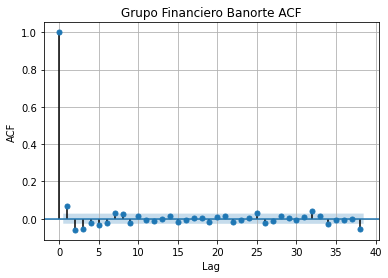

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret)
plt.title("Grupo Financiero Banorte ACF")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

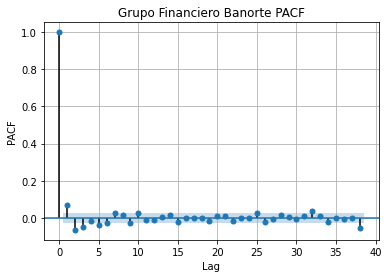

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret)
plt.title("Grupo Financiero Banorte PACF")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

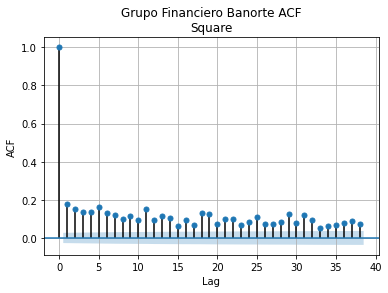

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret**2)
plt.title("Grupo Financiero Banorte ACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

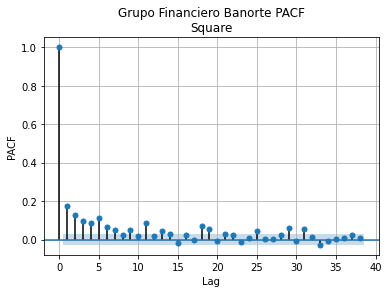

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret**2)
plt.title("Grupo Financiero Banorte PACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

Podemos observar en el PACF de los retornos al cuadrado que los primeros 5 lags son significativos y que algunos más tambien lo son. Dada la experiencia adquirida al modelar los retornos de las empresas anteriores pudimos ver que los modelos que mejor se ajustan a los valores de los retornos son los modelos ARCH. Empecemos entonces con un modelo ARCH(2)

Comencemos reescalando las series:

In [ ]:
log_ret = 100 * log_ret
pct_ret = 100 * pct_ret

Ahora sí, ajustamos un modelo ARCH(2).

In [ ]:
mod_1 = arch_model(pct_ret, mean = "constant", vol = "GARCH", p = 2, q = 0, dist = "t")
fit_1 = mod_1.fit(disp= "off")
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - ARCH Model Results                         
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -11341.3
Distribution:      Standardized Student's t   AIC:                           22692.5
Method:                  Maximum Likelihood   BIC:                           22725.4
                                              No. Observations:                 5310
Date:                      Tue, Mar 09 2021   Df Residuals:                     5309
Time:                              02:39:29   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0819  2.342e-02      3.497  4.705e-04 [3.600e-02,  0.128]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.9169      0.151     19.377  1.212e-83 [  2.622,  3.212]
alpha[1]       0.2877  3.455e-02      8.326  8.397e-17 [  0.220,  0.355]
alpha[2]       0.2605  3.401e-02      7.659  1.877e-14 [  0.194,  0.327]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.2698      0.263     16.217  3.835e-59 [  3.754,  4.786]
========================================================================

Covariance estimator: robust
"""

Veamos los p-values:

In [ ]:
fit_1.pvalues < 0.05

mu          True
omega       True
alpha[1]    True
alpha[2]    True
nu          True
Name: pvalues, dtype: bool

¡Todos nuestros coeficientes son significativos!

A partir de este modelo veamos como predice los 365 días anteriores.

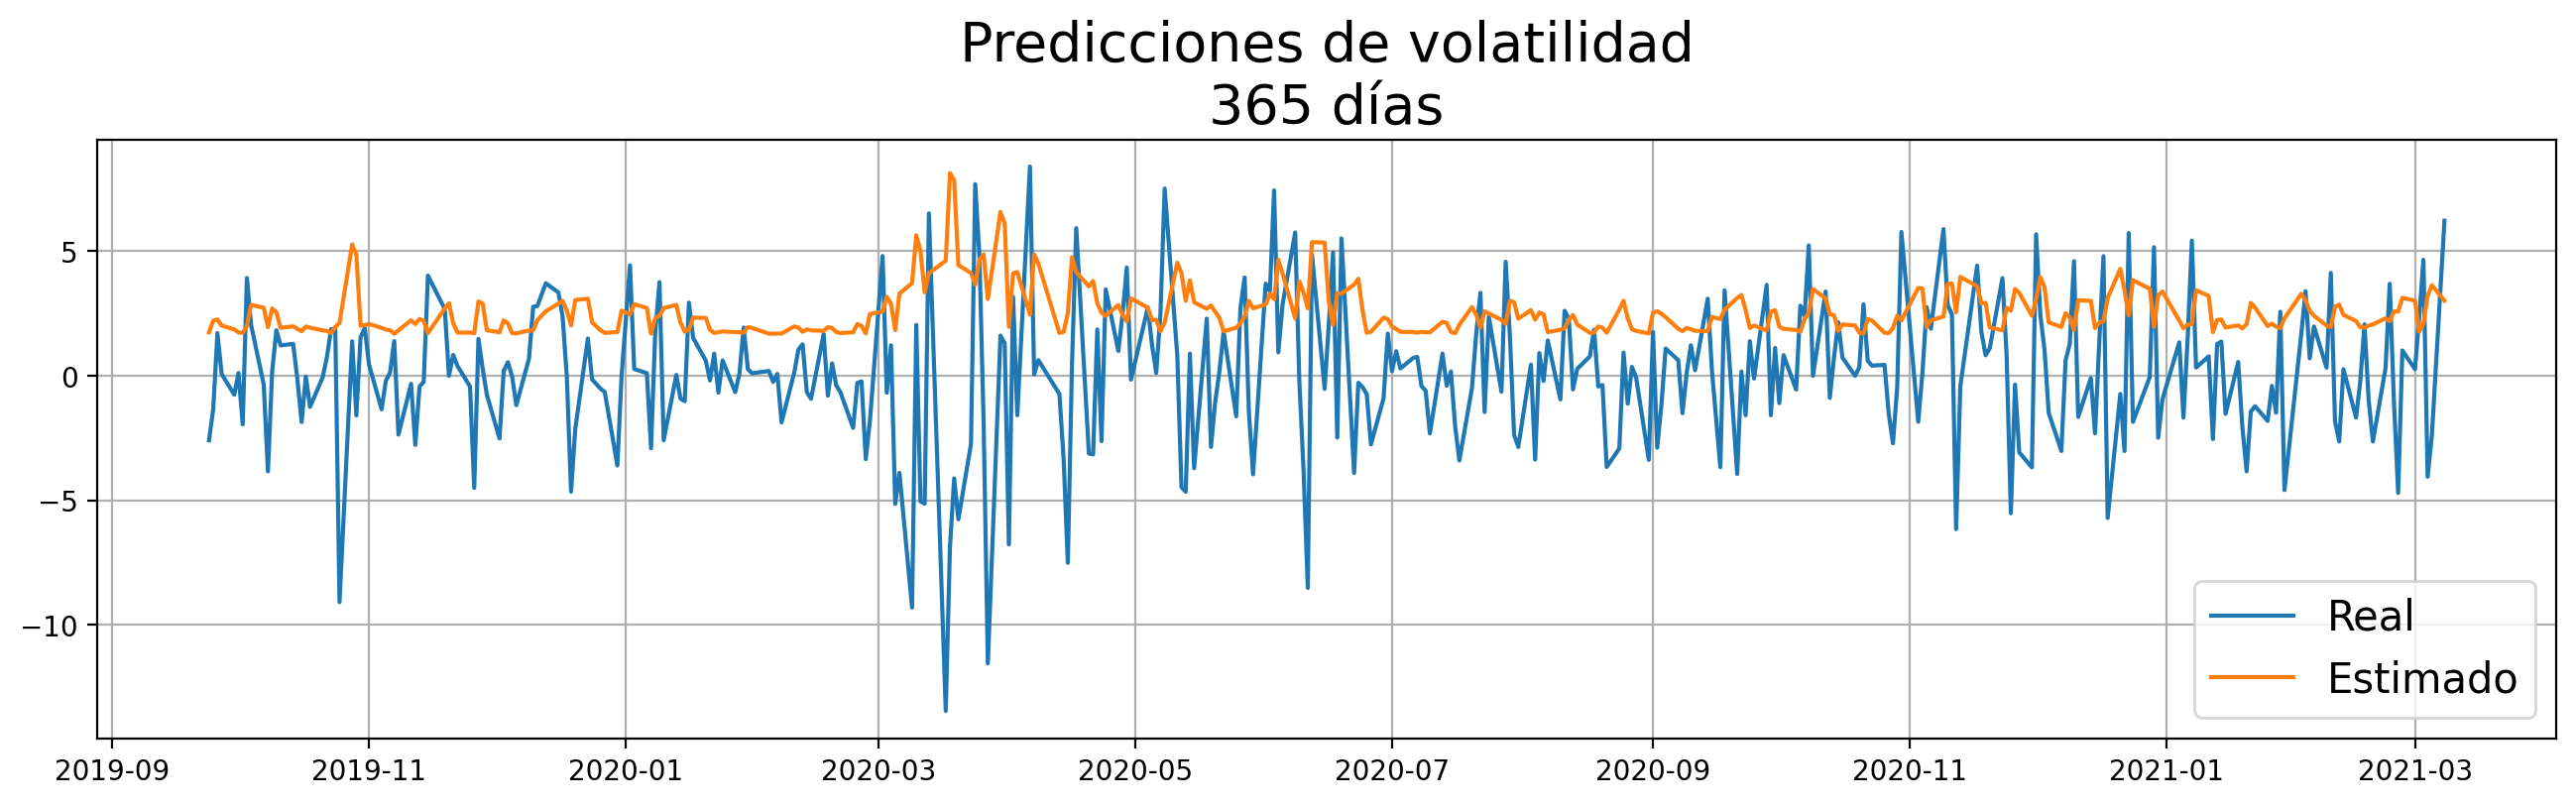

In [ ]:
roll_preds = []
test_size = 365

for i in range(test_size):
    train = pct_ret[:-(test_size - i)]
    mod = arch_model(train, vol = "GARCH", p = 2, q = 0, dist = "t")
    fit = mod.fit(disp = "off")
    pred = fit.forecast(horizon = 1)
    roll_preds.append(np.sqrt(pred.variance.values[-1:][0]))
    
roll_preds = pd.Series(roll_preds, index = pct_ret.index[-365:])

plt.figure(figsize = (16, 4), dpi = 200)
real, = plt.plot(pct_ret[-365:])
preds, = plt.plot(roll_preds)
plt.title("Predicciones de volatilidad\n365 días", fontsize = 20)
plt.legend(["Real", "Estimado"], fontsize = 15)
plt.grid()

Se puede observar que el modelo detecta las fluctuaciones de los retornos muy bien.

Veamos ahora la predicción para los siguientes 7 días.

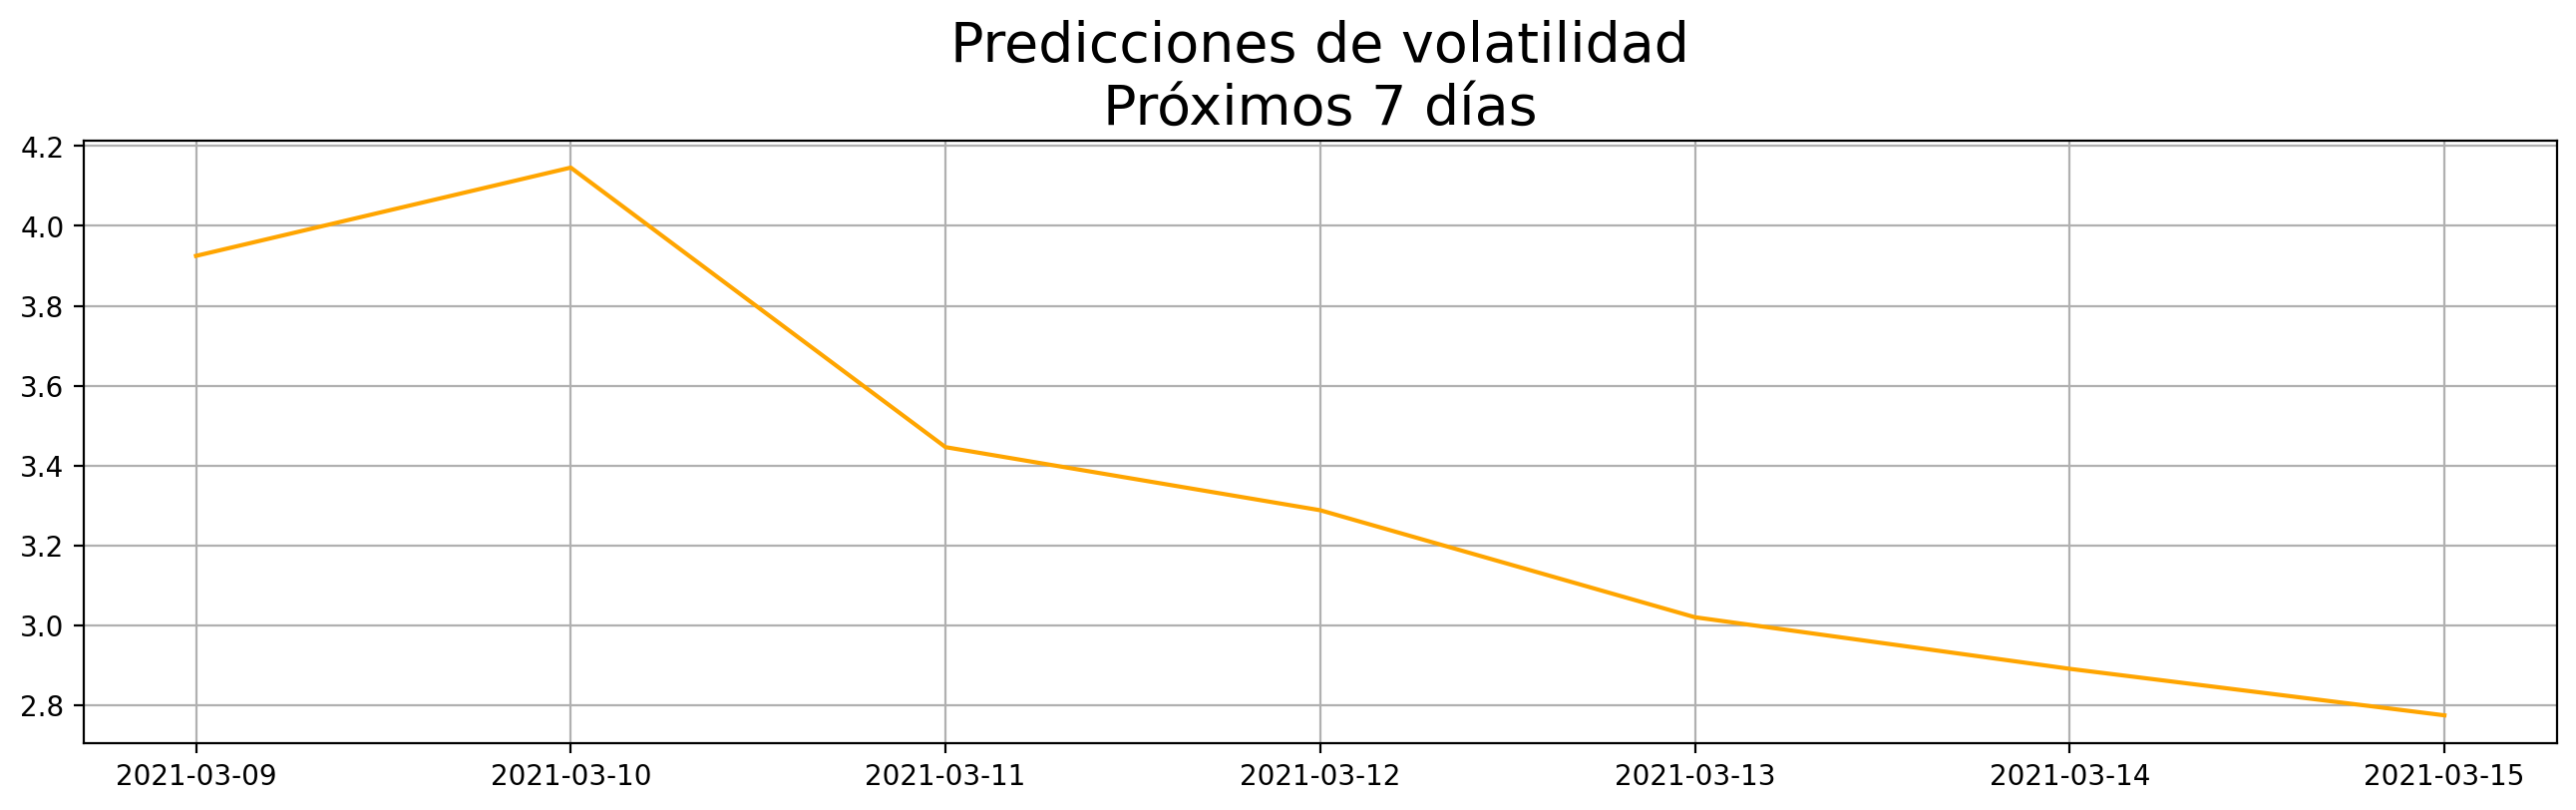

In [ ]:
train = pct_ret
model = arch_model(train, p = 2, q = 0, dist = "t")
fit = model.fit(disp = "off")

pred = fit.forecast(horizon = 7)
futuro = [pct_ret.index[-1] + timedelta(days = i) for i in range(1,8)]
pred5 = pd.Series(np.sqrt(pred.variance.values[-1,:]), index = futuro)

plt.figure(figsize = (16, 4), dpi = 200)
plt.plot(pred5, color = "orange")
plt.title("Predicciones de volatilidad\nPróximos 7 días", fontsize = 20)
plt.grid()

---
### América Móvil.

La siguiente empresa a  analizar es **América Móvil**. Comencemos pidiendo a la API la información sobre los precios de esta empresa y conviertiendolos a dataframe.

In [ ]:
amovil = yf.Ticker("AMXL.MX")
df = amovil.history(period = "max")

Ya con la información lista echemos un chequeo rápido de algunas estadísticas de este dataframe.

In [ ]:
df

Open       High        Low  ...    Volume  Dividends  Stock Splits
Date                                         ...                                   
2000-03-13   1.513513   1.513513   1.513513  ...         0        0.0           0.0
2000-03-14   1.513513   1.513513   1.513513  ...         0        0.0           0.0
2000-03-15   1.513513   1.513513   1.513513  ...         0        0.0           0.0
2000-03-16   1.513513   1.513513   1.513513  ...         0        0.0           0.0
2000-03-17   1.513513   1.513513   1.513513  ...         0        0.0           0.0
...               ...        ...        ...  ...       ...        ...           ...
2021-03-02  13.420000  13.640000  13.290000  ...  46237802        0.0           0.0
2021-03-03  13.640000  13.780000  13.540000  ...  52385208        0.0           0.0
2021-03-04  13.750000  13.950000  13.710000  ...  52299569        0.0           0.0
2021-03-05  13.910000  14.080000  13.890000  ...  44822187        0.0           0.0
2021-03-08  14.050000  14.140000  13.880000  ...  47661086        0.0           0.0

[5334 rows x 7 columns]

In [ ]:
df.describe()

Open         High  ...    Dividends  Stock Splits
count  5334.000000  5334.000000  ...  5334.000000   5334.000000
mean      9.243621     9.328414  ...     0.000926      0.000937
std       4.763637     4.821014  ...     0.013624      0.049364
min       0.765770     0.765770  ...     0.000000      0.000000
25%       3.793616     3.793616  ...     0.000000      0.000000
50%      10.953887    11.105798  ...     0.000000      0.000000
75%      13.110982    13.243567  ...     0.000000      0.000000
max      16.675901    16.712633  ...     0.500000      3.000000

[8 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5334 entries, 2000-03-13 to 2021-03-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5334 non-null   float64
 1   High          5334 non-null   float64
 2   Low           5334 non-null   float64
 3   Close         5334 non-null   float64
 4   Volume        5334 non-null   int64  
 5   Dividends     5334 non-null   float64
 6   Stock Splits  5334 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 333.4 KB


Este dataframe corresponde a mas de 5300 observaciones en 7 columnas sin datos nulos y tipos de datos adecuados.

Nuevamente solo estamos interesados en la evolución de los precios de la empresa. 

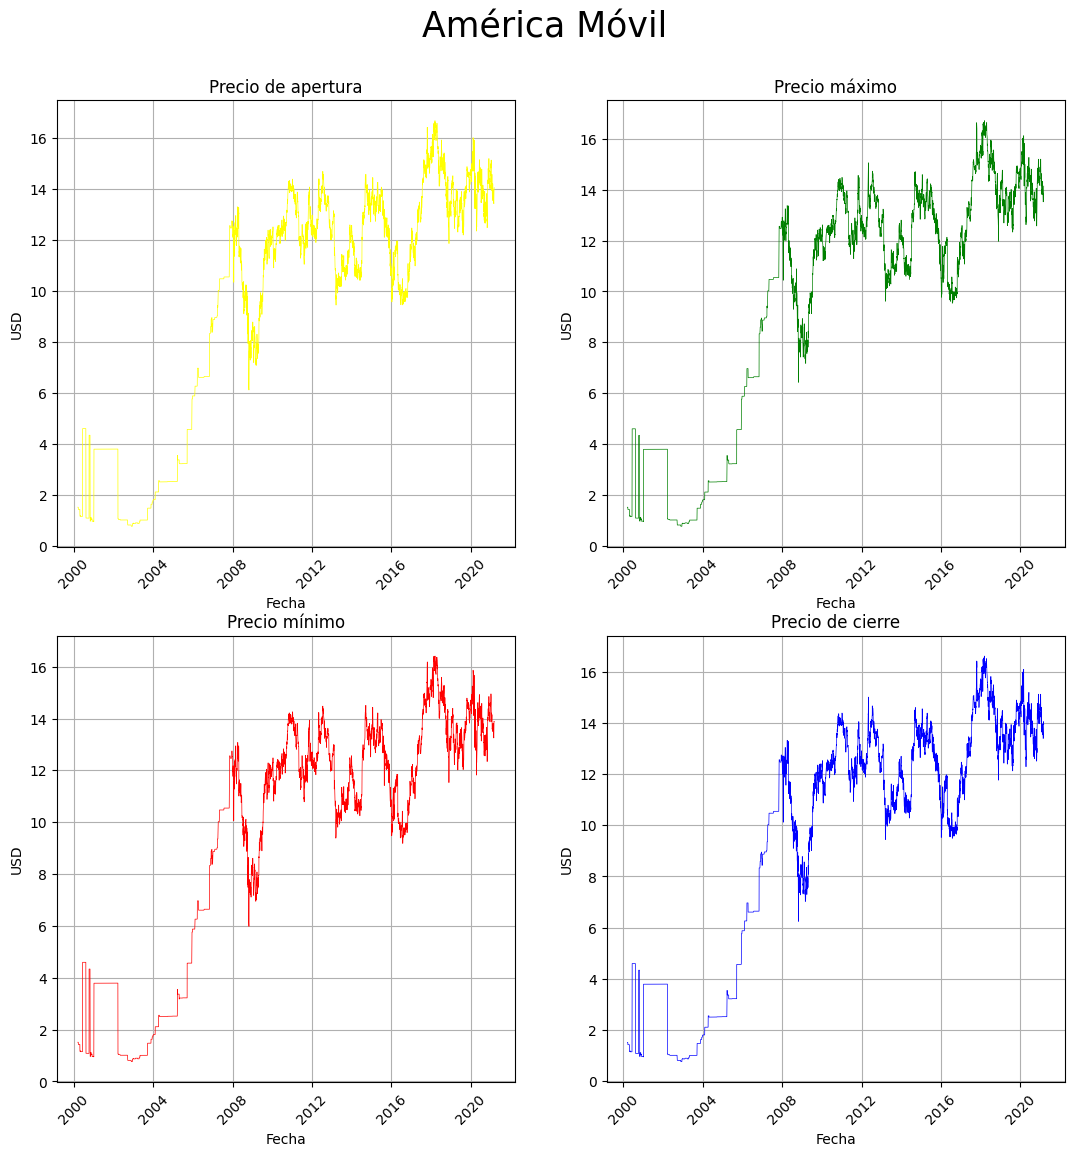

In [ ]:
plt.figure(figsize=(13, 13), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open, label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High, label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low, label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close, label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("América Móvil", fontsize = 25, y = 0.95)
plt.show()

Se puede observar en la serie un comportamiento extraño antes del 2008, ya que el precio de las acciones de la empresa se mantuvieron constantes durante semanas.

Para evitar que eso perjudique el análisis tomaremos solamente los valores de la serie que se obtuvieron del 2008 en adelante:

In [ ]:
df = df.loc["2008-01-01":]

Veamos la serie nuevamente

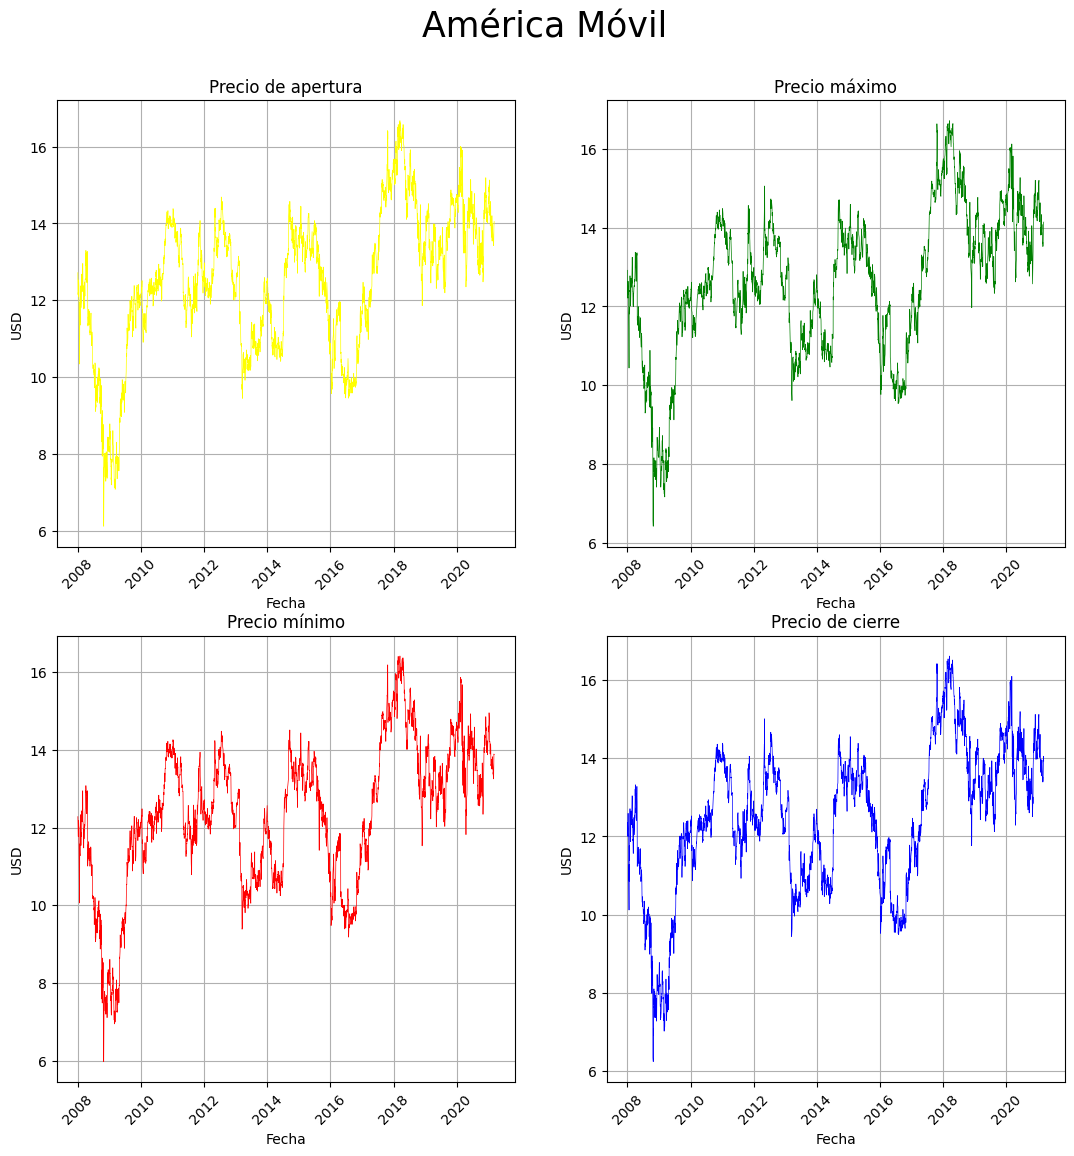

In [ ]:
plt.figure(figsize=(13, 13), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open, label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High, label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low, label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close, label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("América Móvil", fontsize = 25, y = 0.95)
plt.show()

¡Mucho mejor!

Veamos ahora los retornos calculados a partir de los precios de cierre.

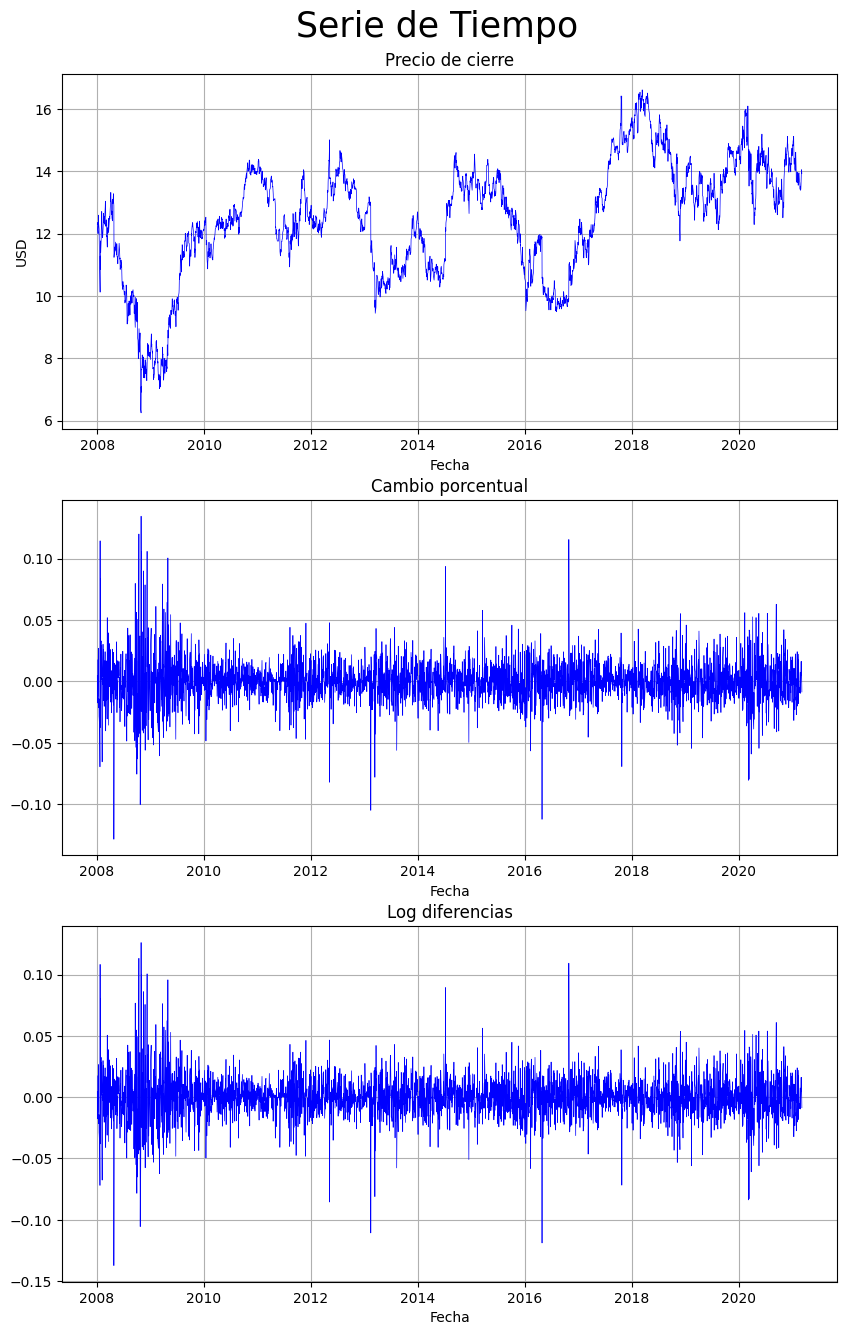

In [ ]:
ts = df.Close

pct_ret = ts.pct_change().dropna()
log_ret = np.log(ts).diff().dropna()

plt.figure(figsize=(10, 16), dpi = 100)

plt.subplot(3, 1, 1)
plt.plot(ts, lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(pct_ret, lw = 0.5, color = "blue")
plt.title("Cambio porcentual")
plt.xlabel("Fecha")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(log_ret, lw = 0.5, color = "blue")
plt.title("Log diferencias")
plt.xlabel("Fecha")
plt.grid()

plt.suptitle("Serie de Tiempo", fontsize = 25, y = 0.92)
plt.show()

Podemos observar que esta empresa presenta un alza de volatilidad entre 2008 y 2010 mientras que los demás no son tan considerables como este.

Veamos los correlogramas de los retornos y de los retornos al cuadrado.

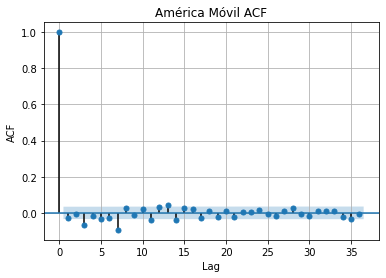

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret)
plt.title("América Móvil ACF")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

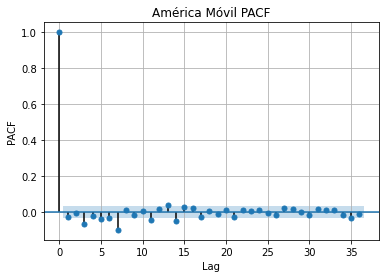

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret)
plt.title("América Móvil PACF")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

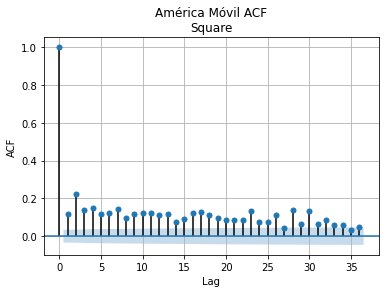

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret**2)
plt.title("América Móvil ACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

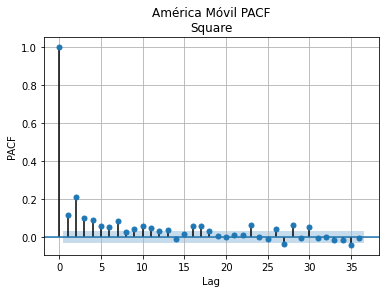

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret**2)
plt.title("América Móvil PACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

Se puede observar en la función PACF de los retornos al cuadrado que el lag 2 es el más alto, por lo que podemos partir de ahí y proponer un modelo ARCH(2). Comencemos reescalando la serie:

In [ ]:
log_ret = 100 * log_ret
pct_ret = 100 * pct_ret

Ahora sí, el modelo.

In [ ]:
mod_1 = arch_model(pct_ret, mean = "zero", vol = "GARCH", p = 2, q = 0, dist = "t")
fit_1 = mod_1.fit(disp= "off")
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Zero Mean - ARCH Model Results                           
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -6180.34
Distribution:      Standardized Student's t   AIC:                           12368.7
Method:                  Maximum Likelihood   BIC:                           12393.1
                                              No. Observations:                 3305
Date:                      Tue, Mar 09 2021   Df Residuals:                     3305
Time:                              02:40:04   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.9942      0.134     14.830  9.403e-50 [  1.731,  2.258]
alpha[1]       0.2117  3.916e-02      5.407  6.403e-08 [  0.135,  0.288]
alpha[2]       0.1890  3.515e-02      5.378  7.543e-08 [  0.120,  0.258]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.1669      0.327     12.725  4.270e-37 [  3.525,  4.809]
========================================================================

Covariance estimator: robust
"""

Veamos los pvalues.

In [ ]:
fit_1.pvalues < 0.05

omega       True
alpha[1]    True
alpha[2]    True
nu          True
Name: pvalues, dtype: bool

Todos los coeficientes resultan ser significativos.

Veamos ahora que tan bien predice el modelo los últimos 365 días de la serie.

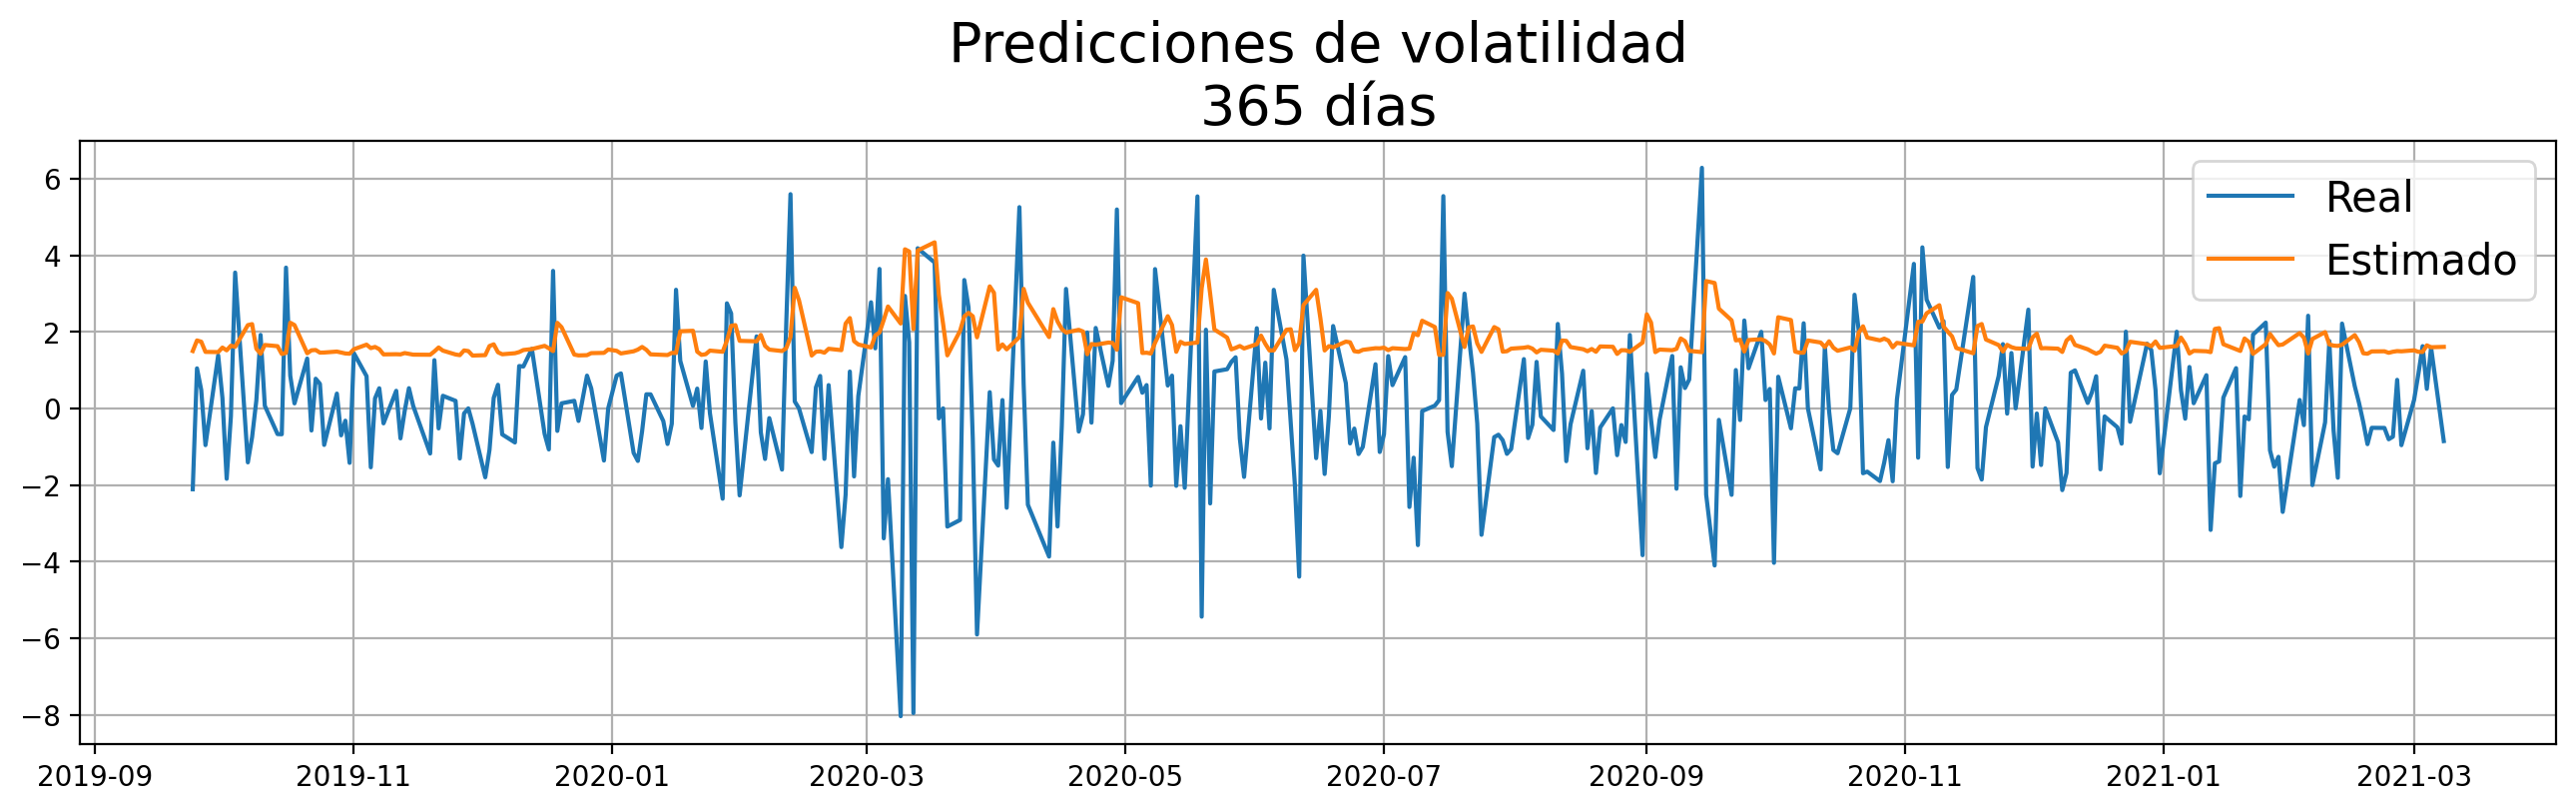

In [ ]:
roll_preds = []
test_size = 365

for i in range(test_size):
    train = pct_ret[:-(test_size - i)]
    mod = arch_model(train, mean = "zero", vol = "GARCH", p = 2, q = 0, dist = "t")
    fit = mod.fit(disp = "off")
    pred = fit.forecast(horizon = 1)
    roll_preds.append(np.sqrt(pred.variance.values[-1:][0]))
    
roll_preds = pd.Series(roll_preds, index = pct_ret.index[-365:])

plt.figure(figsize = (16, 4), dpi = 200)
real, = plt.plot(pct_ret[-365:])
preds, = plt.plot(roll_preds)
plt.title("Predicciones de volatilidad\n365 días", fontsize = 20)
plt.legend(["Real", "Estimado"], fontsize = 15)
plt.grid()

Podemos ver que el modelo predice bastante bien los picos de subidas de volatilidad.

Veamos las predicciones a 7 días posteriores.

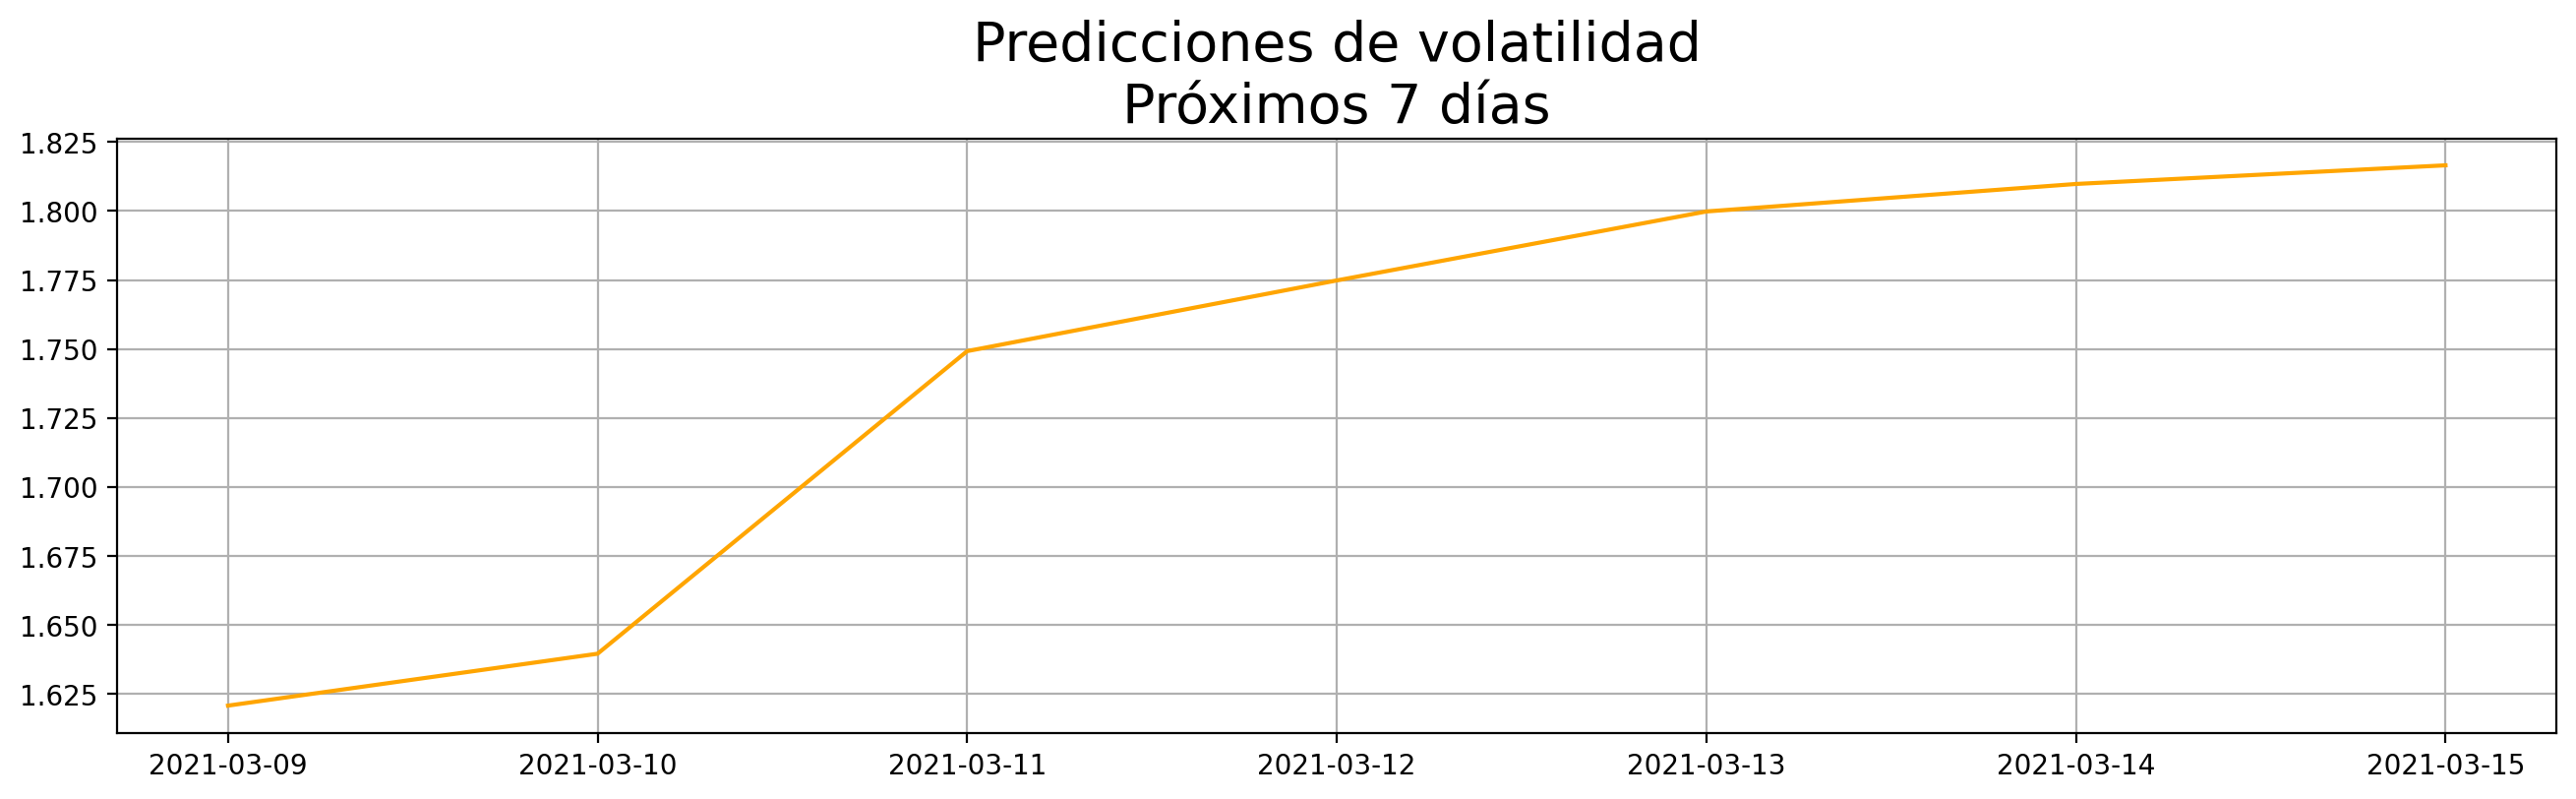

In [ ]:
train = pct_ret
model = arch_model(train, mean = "zero", vol = "GARCH",  p = 2, q = 0, dist = "t")
fit = model.fit(disp = "off")

pred = fit.forecast(horizon = 7)
futuro = [pct_ret.index[-1] + timedelta(days = i) for i in range(1,8)]
pred6 = pd.Series(np.sqrt(pred.variance.values[-1,:]), index = futuro)

plt.figure(figsize = (16, 4), dpi = 200)
plt.plot(pred6, color = "orange")
plt.title("Predicciones de volatilidad\nPróximos 7 días", fontsize = 20)
plt.grid()

---
### Grupo Elektra.

Nuestra última empresa corresponde a **Grupo Elektra**. Veamos el dataframe de los precios de esta empresa, para eso solicitamos la información a la API y la transformamos en dataframe:

In [ ]:
elektra = yf.Ticker("ELEKTRA.MX")
df = elektra.history(period = "max")

Veamos algunas características de los datos en el datframe:

In [ ]:
df

Open         High  ...  Dividends  Stock Splits
Date                                  ...                         
2000-12-25    34.026077    34.026077  ...        0.0             0
2001-01-02    34.026082    34.026082  ...        0.0             0
2001-01-03    32.550456    34.546883  ...        0.0             0
2001-01-04    35.154497    37.758534  ...        0.0             0
2001-01-05    37.324525    37.324525  ...        0.0             0
...                 ...          ...  ...        ...           ...
2021-03-02  1380.109985  1387.760010  ...        0.0             0
2021-03-03  1386.000000  1386.000000  ...        0.0             0
2021-03-04  1384.199951  1386.800049  ...        0.0             0
2021-03-05  1385.099976  1387.400024  ...        0.0             0
2021-03-08  1379.229980  1389.390015  ...        0.0             0

[5116 rows x 7 columns]

In [ ]:
df.describe()

Open         High  ...    Dividends  Stock Splits
count  5116.000000  5116.000000  ...  5116.000000        5116.0
mean    440.039074   447.390201  ...     0.007664           0.0
std     389.288280   395.668534  ...     0.144772           0.0
min      17.620643    17.967850  ...     0.000000           0.0
25%      90.591158    91.356358  ...     0.000000           0.0
50%     362.606286   368.731482  ...     0.000000           0.0
75%     578.063094   592.134537  ...     0.000000           0.0
max    1451.834234  1589.843590  ...     4.810000           0.0

[8 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5116 entries, 2000-12-25 to 2021-03-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5116 non-null   float64
 1   High          5116 non-null   float64
 2   Low           5116 non-null   float64
 3   Close         5116 non-null   float64
 4   Volume        5116 non-null   int64  
 5   Dividends     5116 non-null   float64
 6   Stock Splits  5116 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 319.8 KB


Podemos ver que el dataframe contiene un poco más de 5100 observaciones de 7 variables, sin datos nulos y con tipos de datos adecuados.

Ya con los datos veamos las gráficas de los precios.

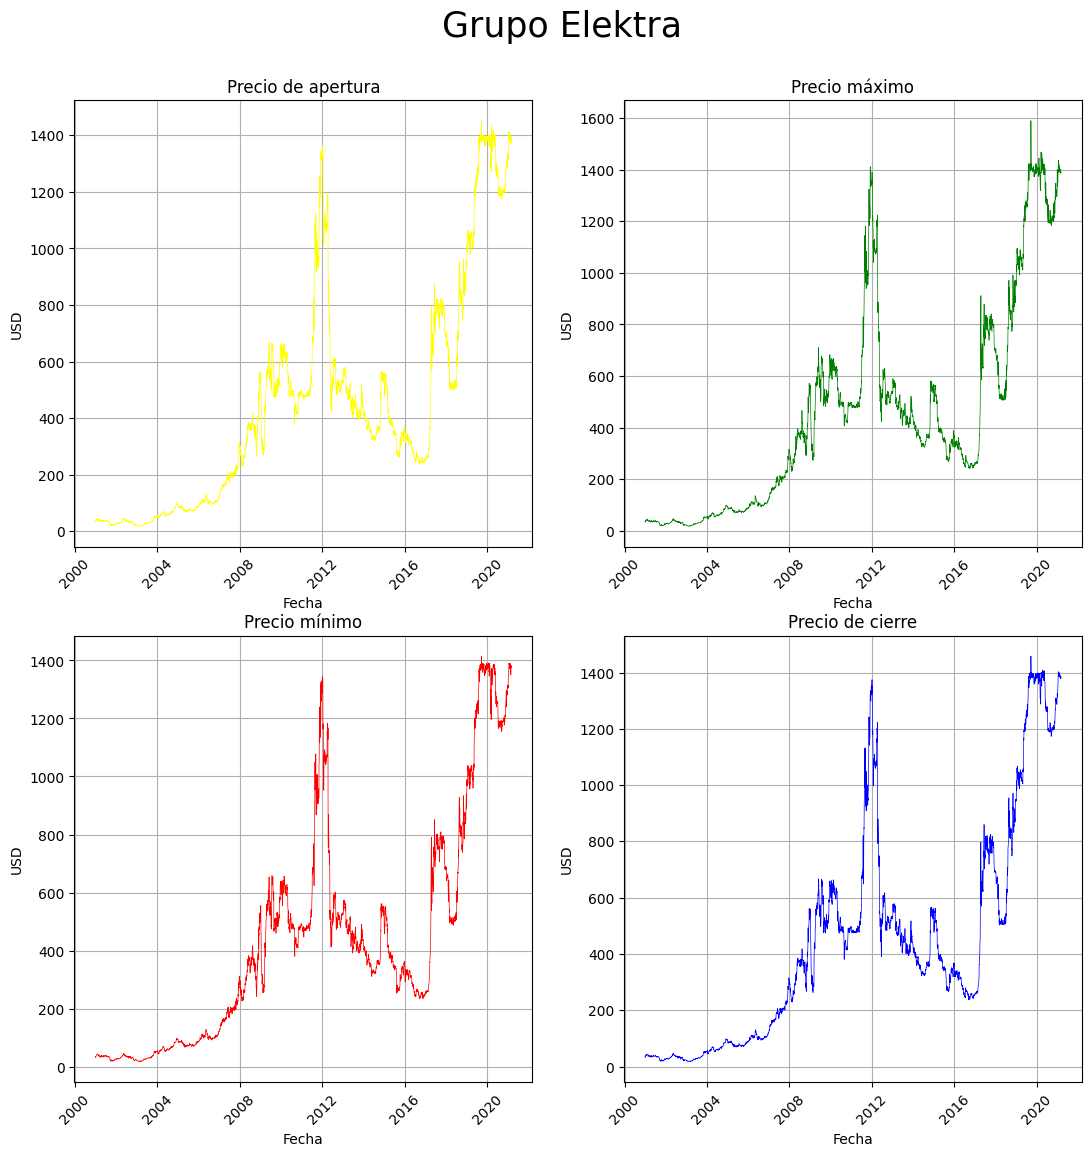

In [ ]:
plt.figure(figsize=(13, 13), dpi = 100)

plt.subplot(2, 2, 1)
plt.plot(df.Open, label = "Precio de apertura", lw = 0.5, color = "yellow")
plt.title("Precio de apertura")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df.High, label = "Precio máximo", lw = 0.5, color = "green")
plt.title("Precio máximo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df.Low, label = "Precio mínimo", lw = 0.5, color = "red")
plt.title("Precio mínimo")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df.Close, label = "Precio de cierre", lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.xticks(rotation = 45)
plt.ylabel("USD")
plt.grid()

plt.suptitle("Grupo Elektra", fontsize = 25, y = 0.95)
plt.show()

Podemos ver que los precios no presentan regiones anómalas o valores atípicos que se distingan a simple vista, por lo que podemos calcular los retornos a partir de los precios de cierre.

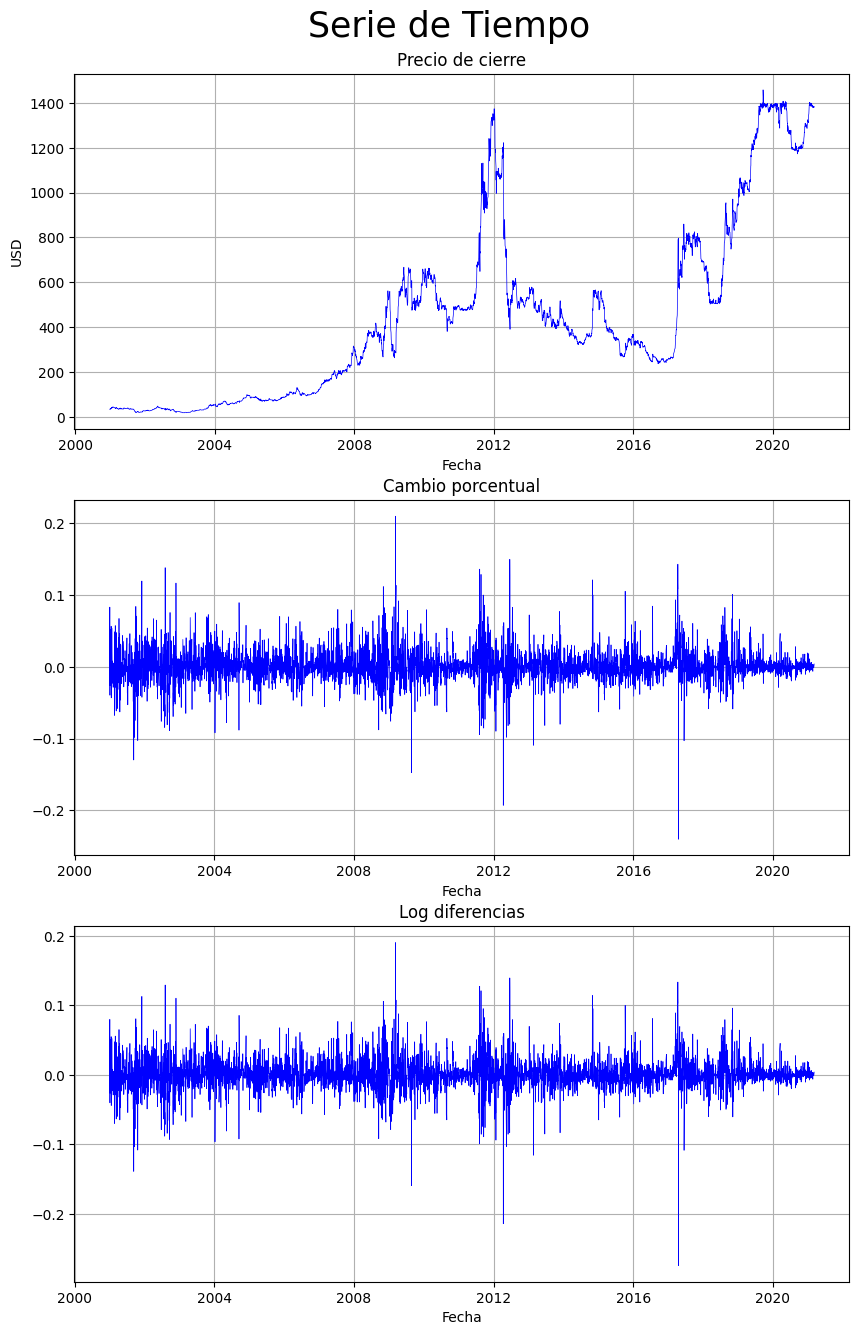

In [ ]:
ts = df.Close

pct_ret = ts.pct_change().dropna()
log_ret = np.log(ts).diff().dropna()

plt.figure(figsize=(10, 16), dpi = 100)

plt.subplot(3, 1, 1)
plt.plot(ts, lw = 0.5, color = "blue")
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(pct_ret, lw = 0.5, color = "blue")
plt.title("Cambio porcentual")
plt.xlabel("Fecha")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(log_ret, lw = 0.5, color = "blue")
plt.title("Log diferencias")
plt.xlabel("Fecha")
plt.grid()

plt.suptitle("Serie de Tiempo", fontsize = 25, y = 0.92)
plt.show()

Podemos observar una región de alta volatilidad en 2008, otras dos a finales de 2011 y a principios de 2012 y una cercana al 2018.

Veamos los correlogramas de los retornos y los retornos al cuadrado para encontrar un indicio de un modelo a ajustar.

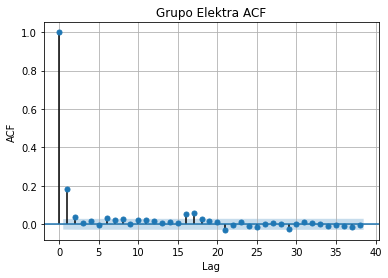

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret)
plt.title("Grupo Elektra ACF")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

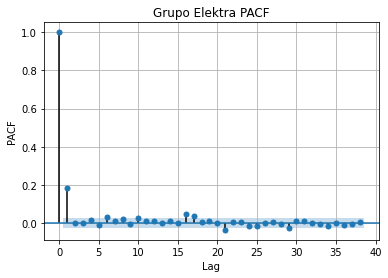

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret)
plt.title("Grupo Elektra PACF")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

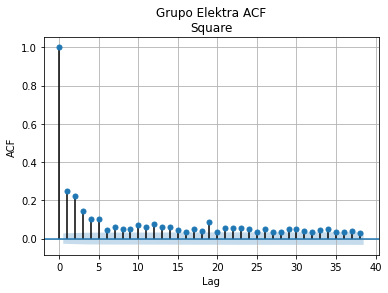

In [ ]:
sm.graphics.tsa.plot_acf(pct_ret**2)
plt.title("Grupo Elektra ACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid()
plt.show()

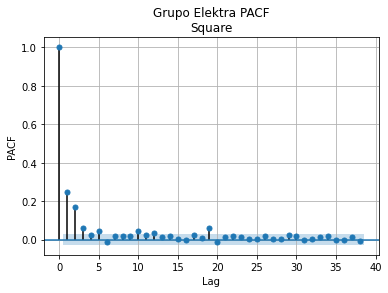

In [ ]:
sm.graphics.tsa.plot_pacf(pct_ret**2)
plt.title("Grupo Elektra PACF\nSquare")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.grid()
plt.show()

El PACF de los retornos al cuadrado nos sugiere empezar con un modelo ARCH(2) o GARCH(2,2). Por la experiencia adquirida hasta aquí empecemos proponiendo un modelo ARCH(2).

Reescalando la serie.

In [ ]:
log_ret = 100 * log_ret
pct_ret = 100 * pct_ret

Armamos el modelo ARCH(2).

In [ ]:
mod_1 = arch_model(pct_ret, mean = "zero", vol = "GARCH", p = 2, q = 0, dist = "t")
fit_1 = mod_1.fit(disp= "off")
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Zero Mean - ARCH Model Results                           
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -10238.8
Distribution:      Standardized Student's t   AIC:                           20485.6
Method:                  Maximum Likelihood   BIC:                           20511.8
                                              No. Observations:                 5115
Date:                      Tue, Mar 09 2021   Df Residuals:                     5115
Time:                              02:40:24   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.9686      0.159     12.348  5.019e-35 [  1.656,  2.281]
alpha[1]       0.6365  5.829e-02     10.920  9.288e-28 [  0.522,  0.751]
alpha[2]       0.3635  4.409e-02      8.244  1.668e-16 [  0.277,  0.450]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.0785      0.106     29.088 5.114e-186 [  2.871,  3.286]
========================================================================

Covariance estimator: robust
"""

In [ ]:
fit_1.pvalues < 0.05

omega       True
alpha[1]    True
alpha[2]    True
nu          True
Name: pvalues, dtype: bool

Todos los términos son significativos. Vale la pena aclarar aquí que los t-values arrojan valores altos, por lo que se podría seguir proponiendo modelos ARCH con parámetros más altos, sin embargo es muy raro que en la practica los parámetros sean muy altos. Por esta razón nos quedaremos con nuestro modelo ARCH(2).

Veamos las predicciones de los 365 días anteriores.

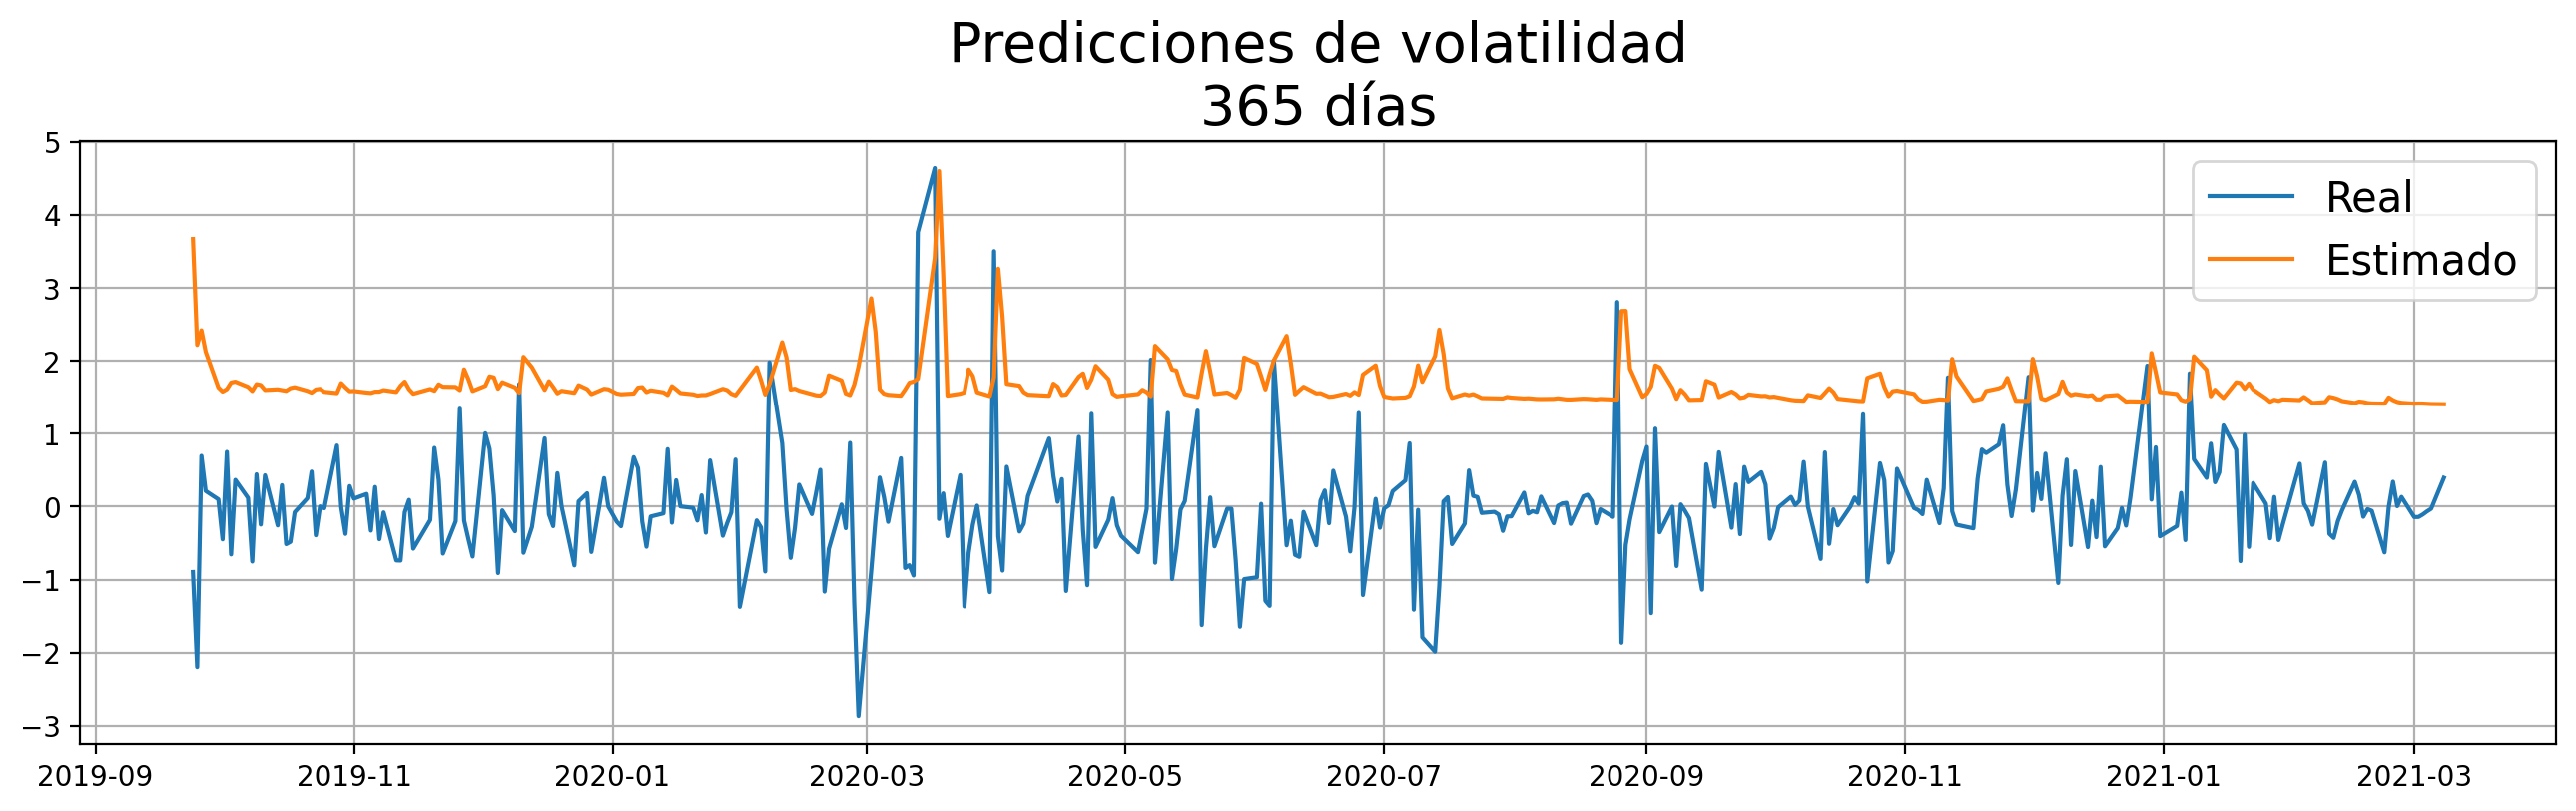

In [ ]:
roll_preds = []
test_size = 365

for i in range(test_size):
    train = pct_ret[:-(test_size - i)]
    mod = arch_model(train, mean = "zero", vol = "GARCH", p = 2, q = 0, dist = "t")
    fit = mod.fit(disp = "off")
    pred = fit.forecast(horizon = 1)
    roll_preds.append(np.sqrt(pred.variance.values[-1:][0]))
    
roll_preds = pd.Series(roll_preds, index = pct_ret.index[-365:])

plt.figure(figsize = (16, 4), dpi = 200)
real, = plt.plot(pct_ret[-365:])
preds, = plt.plot(roll_preds)
plt.title("Predicciones de volatilidad\n365 días", fontsize = 20)
plt.legend(["Real", "Estimado"], fontsize = 15)
plt.grid()

¡Vemos que el modelo predice bastante bien los picos de volatilidad!

Veamos finalmente las siguiente 7 predicciones.

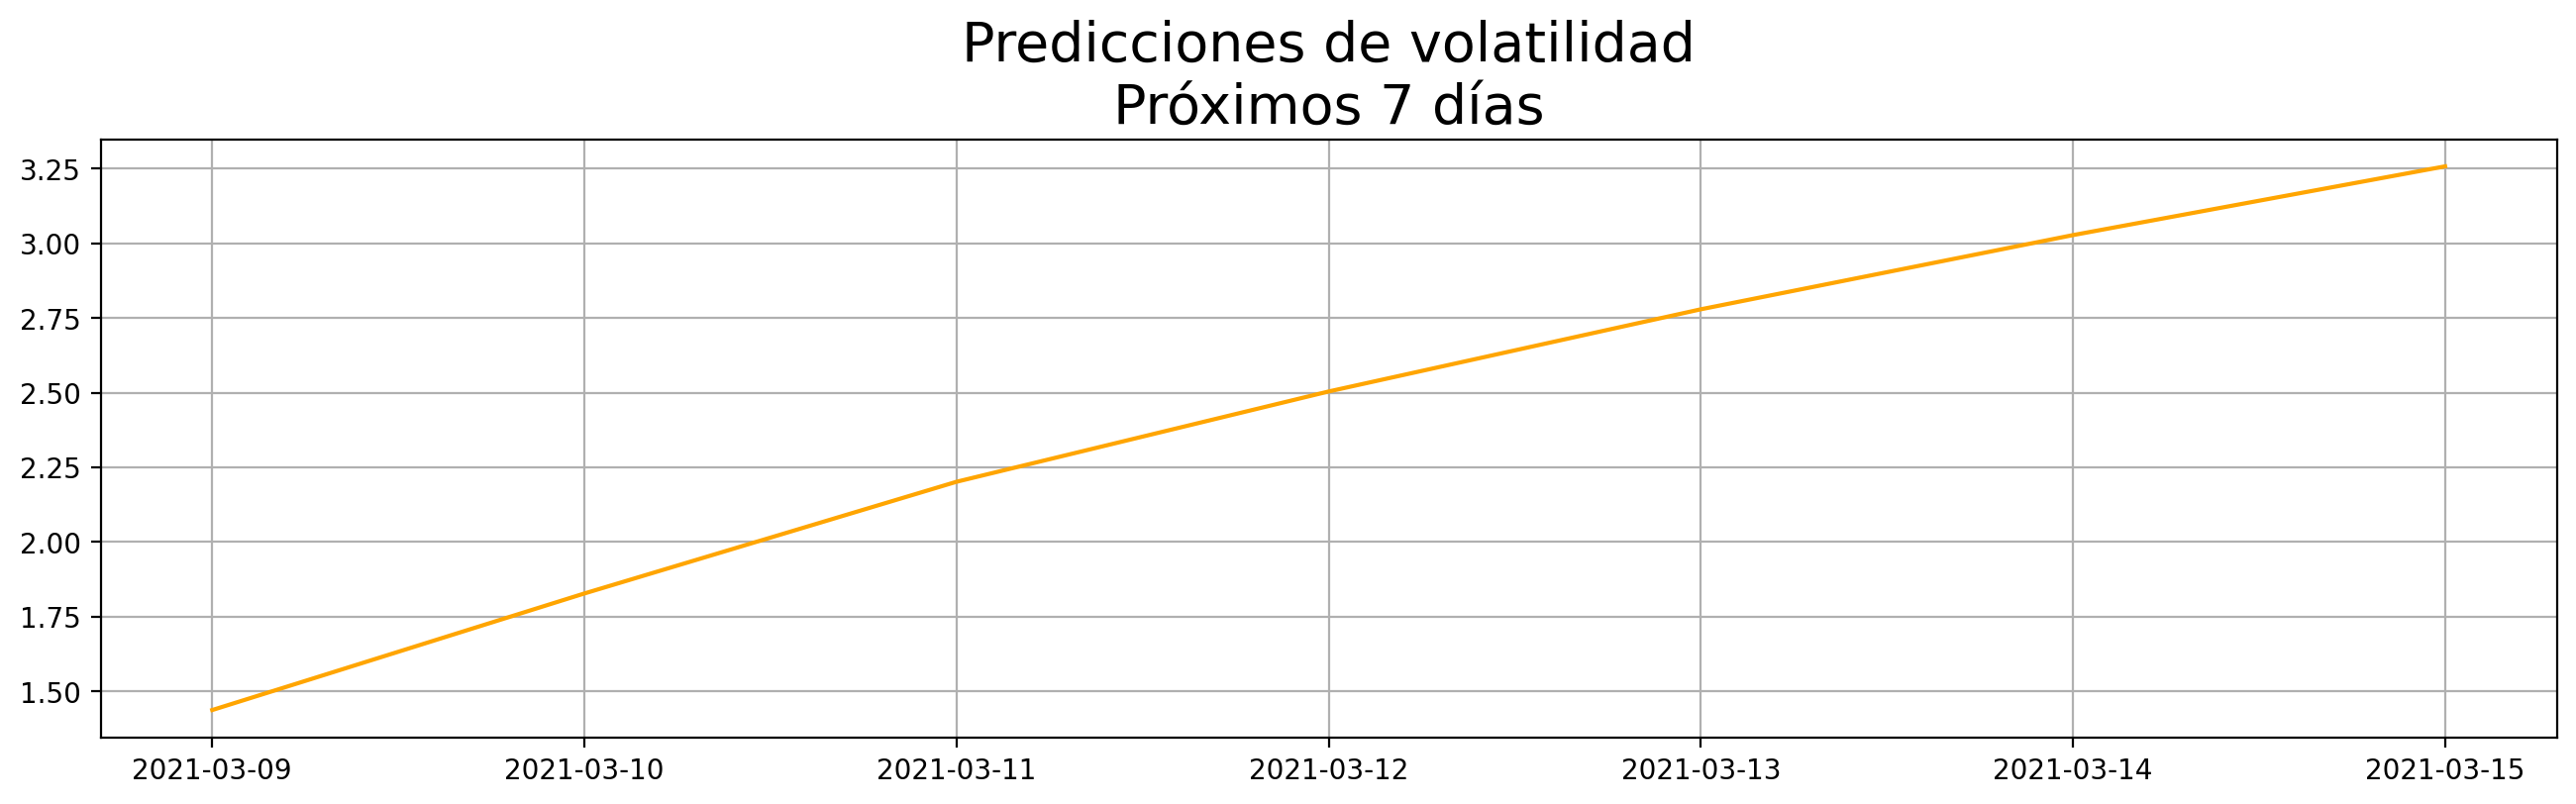

In [ ]:
train = pct_ret
model = arch_model(train, mean = "zero", vol = "GARCH",  p = 2, q = 0, dist = "t")
fit = model.fit(disp = "off")

pred = fit.forecast(horizon = 7)
futuro = [pct_ret.index[-1] + timedelta(days = i) for i in range(1,8)]
pred7 = pd.Series(np.sqrt(pred.variance.values[-1,:]), index = futuro)

plt.figure(figsize = (16, 4), dpi = 200)
plt.plot(pred7, color = "orange")
plt.title("Predicciones de volatilidad\nPróximos 7 días", fontsize = 20)
plt.grid()

### Resumen.

Podemos resumir todos las características de los modelos ajustados y los problemas obtenidos en cada una de las series en la siguiente tabla.

| **Sector** | **Empresa** | **Modelo Ajustado** | **Observaciones** |
|------------|-------------|---------------------|-------------------|
| Industriales |Grupo Aeroportuario del Pacífico | ARCH(1) | Ninguna. |
| Materiales | Cemex | ARCH(2) | Outlier en los precios de apertura, mínimo y máximo. Se atribuye a un error en la API o a un suceso en dicha empresa.|
| Productos de consumo| Walmart | ARCH(2) | Se encontró una zona anómala entre 2011 y 2012 que se atribuye a un error en la actualización de los precios en la API. Se seleccionó un subconjunto de la serie posterior a esa anomalía.|
| Salud | Corporativo Fragua | ARCH(1) | Se observó una zona en la que los precios de la empresa permanecieron constantes y después dieron un salto abrupto, esto causó que los retornos estuvieran sesgados por este comportamiento. Se decidió eliminar esas zonas de precio constante y ese salto abrupto. |
| Financieros | Grupo Financiero Banorte | ARCH(2) | Ninguna. |
| Telecomunicaciones | América Móvil | ARCH(2) | Nuevamente se observan zonas de precios constantes y saltos abruptos que alteran el cálculo de los retornos. Se decidió quitar esa zona. |
| Productos de consumo no básicos | Grupo Elektra | ARCH(2) | Ninguna. |

Finalmente veamos las predicciones de volatilidad juntas:

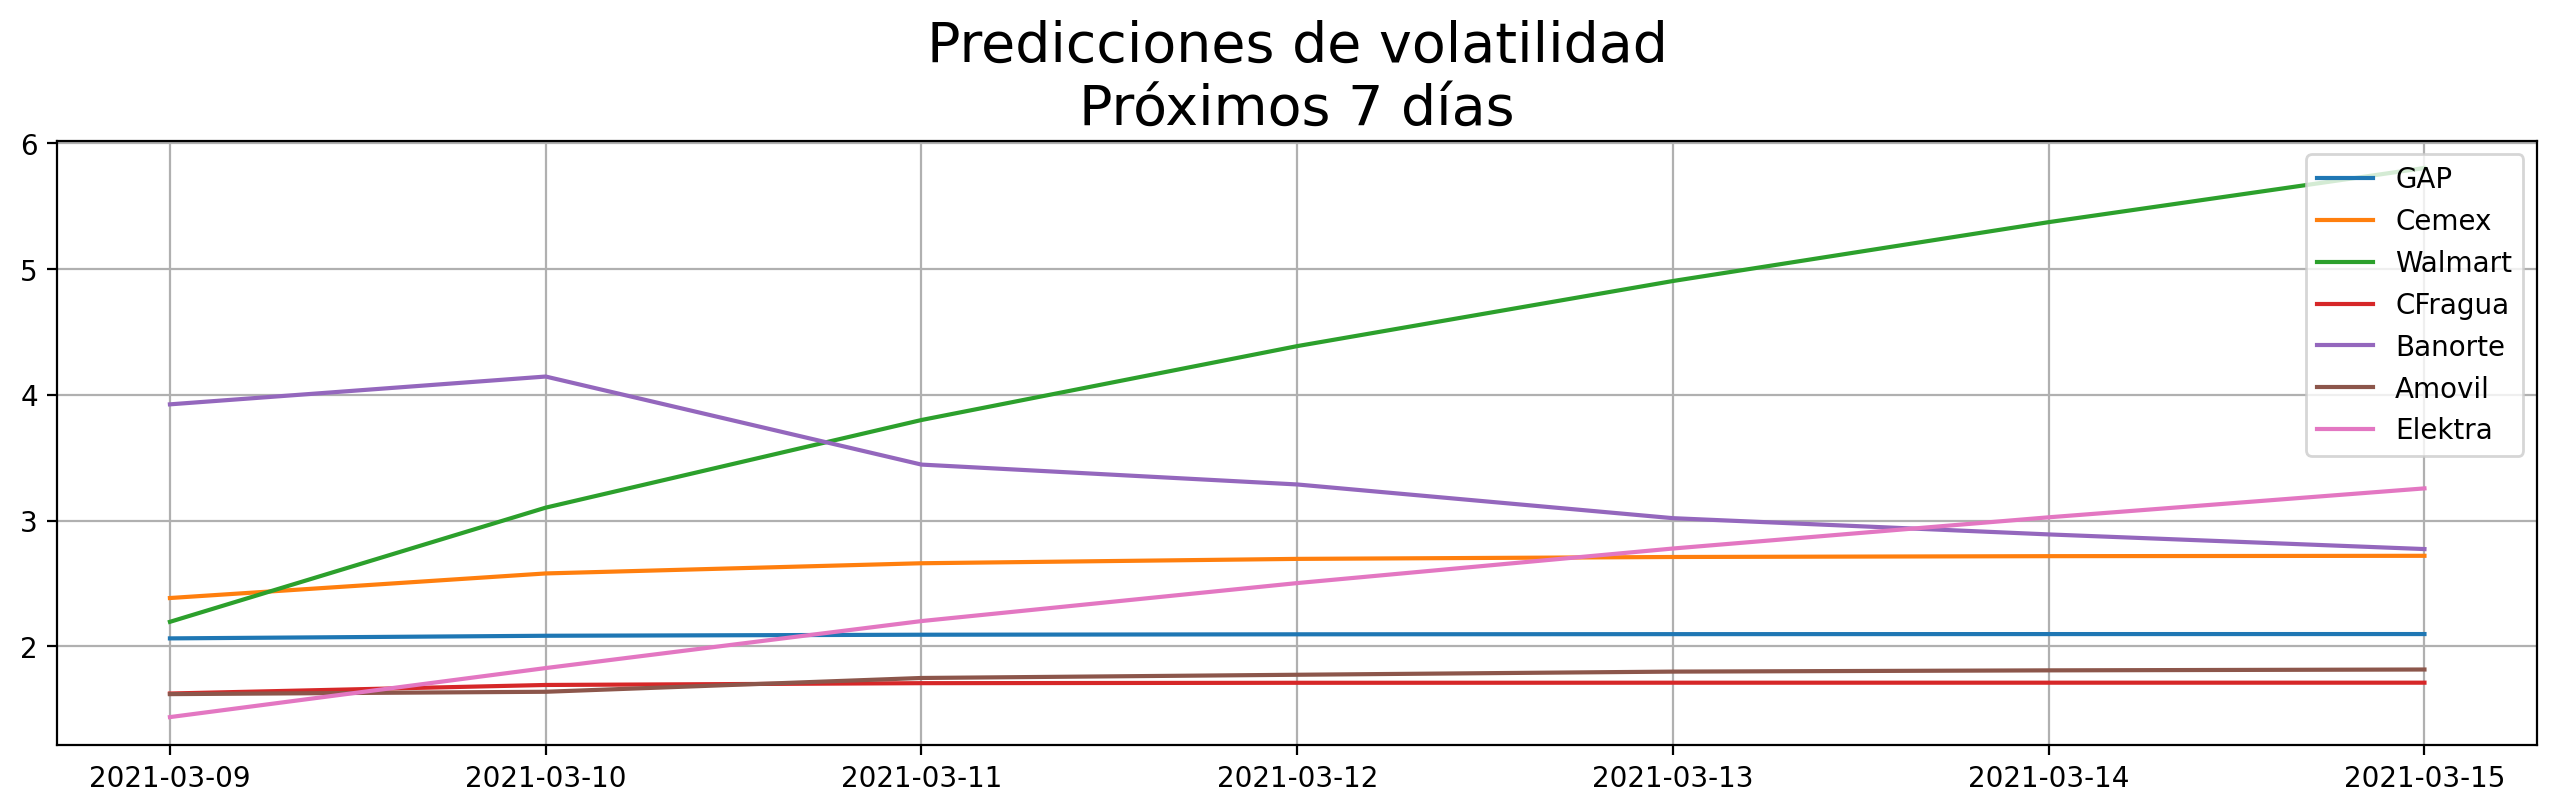

In [ ]:
plt.figure(figsize = (16, 4), dpi = 200)
plt.plot(pred1, label = "GAP")
plt.plot(pred2, label = "Cemex")
plt.plot(pred3, label = "Walmart")
plt.plot(pred4, label = "CFragua")
plt.plot(pred5, label = "Banorte")
plt.plot(pred6, label = "Amovil")
plt.plot(pred7, label = "Elektra")
plt.title("Predicciones de volatilidad\nPróximos 7 días", fontsize = 20)
plt.legend()
plt.grid()